## Directory Structure
PLEASE make sure your directory looks like this:
- root_dir
    - pixel-nerf (clone/pull from github)
    - adaptive-volume-rendering (clone/pull from github)
        - 6S980_Project.ipynb
    - scene-representation-networks (clone/pull from github)
    - data
    - checkpoints
    - ......
    
Then set your pwd to root_dir

## Relevant Repos

- PixelNeRF repo: https://github.com/sxyu/pixel-nerf

- SRN repo: https://github.com/vsitzmann/scene-representation-networks

- SRN raymarcher algorithm: https://github.com/vsitzmann/scene-representation-networks/blob/master/custom_layers.py

## Data

- Currently using cars dataset from SRN

## What we did

- Now the pixelnerf with pretrained weights are running!


## Questions
- PixelNeRF currently does: evenly coarse sampling - fine sampling via importance weights - fine sampling around expected depth. With adaptive procedure, what is a fair comparison?

## TODOs
- First attempt: let LSTM interact with the features, do 10 steps, then directly output a color
- Second attempt: sample points around the final location and do volume integral

- Use view 64 to render out videos

In [1]:
# root_dir = "/Users/yankesong/Documents/YankeSong/Harvard Textbook/MIT 6.S980/Project/"       # This is the only thing you need to change.
# %cd "/Users/yankesong/Documents/YankeSong/Harvard Textbook/MIT 6.S980/Project/"

# root_dir = "/Users/jameszli/desktop/MIT/6.S980/"       # This is the only thing you need to change.
# %cd "/Users/jameszli/desktop/MIT/6.S980/"

root_dir = "/home/ysong/project/"       # This is the only thing you need to change.
%cd "/home/ysong/project/" 

# # Install everything
# %pip install -r adaptive-volume-rendering/requirements.txt

# Import everything
import sys

sys.path.insert(0, f"{root_dir}/pixel-nerf/src/")
sys.path.insert(0, f"{root_dir}/adaptive-volume-rendering/")

from model import make_model, loss
from dataset import *
from models import *
from renderers import *
from trains import *
from utils import *


print(f"Installed Torch version: {torch.__version__}")

if torch.cuda.is_available():
    device = torch.device("cuda:0")
    torch.cuda.set_device(device)
else:
    device = torch.device("cpu")

print(device)

/home/ysong/project
Installed Torch version: 1.13.0
cuda:0


## Setup & Load Test Data

In [2]:
# # Download data and weights

# # Make a new directory
# !mkdir data
# !mkdir checkpoints

# # Download Test Dataset
# if not os.path.exists(f"{root_dir}data/cars_train.hdf5"):
#     # Download SRNs-cars dataset
#     gdown.download("https://drive.google.com/uc?id={}".format("1SBjlsizq0sFNkCZxMQh-pNRi0HyFozKb"),f"{root_dir}data/cars_train.hdf5")


# ## Download pretrained weights from PixelNeRF
# if not os.path.exists(f"{root_dir}checkpoints/pixel_nerf_weights.zip"):
#   gdown.download("https://drive.google.com/uc?id={}".format("1UO_rL201guN6euoWkCOn-XpqR2e8o6ju"),f"{root_dir}checkpoints/pixel_nerf_weights.zip")
#   !unzip checkpoints/pixel_nerf_weights.zip -d checkpoints/

## Volume Renderer

In [3]:
# ############## Original Volume renderer
# # Create a custom conf
# from pyhocon import ConfigFactory
# conf = ConfigFactory.parse_file(f"adaptive-volume-rendering/conf/default_mv.conf")

# # Create a pixelnerf net
# net = make_new_model(conf["model"]).to(device=device)
# net.stop_encoder_grad = True

# # Load pretrianed weights
# # model_path = f"{root_dir}checkpoints/srn_car/pixel_nerf_latest"
# # net.load_weights(model_path)

# # Combine with volumerenderer
# renderer = VolumeRenderer.from_conf(conf["normal_renderer"]).to(
#     device=device
# )
# max_num_instances = 2150
# samples_per_instance = 8

# rf_and_renderer = RadFieldAndRenderer(net, renderer).to(device=device)
# model_path = f"{root_dir}checkpoints/experiment/vr_{max_num_instances}cars_{samples_per_instance}samples_40000steps"
# rf_and_renderer.load_weights(model_path)
# # Test dataset
# sl = 32
# max_num_instances = 2150
# train_dataset = SceneClassDataset(root_dir=f"{root_dir}data/cars_train",
#                                              max_num_instances=10,
#                                              max_observations_per_instance=250,
#                                              img_sidelength=sl,
#                                              specific_observation_idcs=None,
#                                              samples_per_instance=samples_per_instance)


# train_dataloader = DataLoader(train_dataset,
#                                       batch_size=1,
#                                       shuffle=True,
#                                       drop_last=True,
#                                       collate_fn=train_dataset.collate_fn
#                                       )

# # Configurations
# optim = torch.optim.Adam(lr=1e-4, params=rf_and_renderer.parameters())

    
# try:
#     _ = fit(net,
#         rf_and_renderer, 
#         train_dataloader, 
#         loss_fn=mse_loss, 
#         resolution=(sl, sl, 3), 
#         plotting_function=plot_output_ground_truth, 
#         optimizer=optim, 
#         total_steps=100,
#         steps_til_summary=1
#         )
#     model_path = f"{root_dir}checkpoints/experiment/vr_{max_num_instances}cars_{samples_per_instance}samples_40000steps"
#     rf_and_renderer.save_weights(model_path)
# except Exception:
#     print(traceback.format_exc())


### PixelNeRF + Raymarcher only

In [4]:
# # Create a custom conf
# from pyhocon import ConfigFactory
# conf = ConfigFactory.parse_file(f"{root_dir}adaptive-volume-rendering/conf/default_mv.conf")

# # Create a pixelnerf net
# net = make_new_model(conf["model"]).to(device=device)
# net.stop_encoder_grad = True
# # Combine with volumerenderer
# renderer = Raymarcher.from_conf(conf["raymarcher"]).to(
#     device=device
# )

# rf_and_renderer = RadFieldAndRenderer(net, renderer).to(device=device)
# model_path = f"{root_dir}checkpoints/experiment/newraymarcher_2150cars_8samples_50ksteps"
# rf_and_renderer.load_weights(model_path)
# # own_state = rf_and_renderer.state_dict()
# # load_state = torch.load(model_path, map_location=device)
# # for name, param in load_state.items():
# #     if name not in own_state:
# #         continue
# #     if isinstance(param, nn.Parameter):
# #         # backwards compatibility for serialized parameters
# #         param = param.data
# #     own_state[name].copy_(param)

# max_num_instances = 2150
# samples_per_instance = 8

# # Freeze nerf weights
# for param in net.parameters():
#     param.requires_grad = False


# ######## TODO
# # Test dataset
# sl = 32
# max_num_instances = 2150
# train_dataset = SceneClassDataset(root_dir=f"{root_dir}data/cars_train",
#                                              max_num_instances=max_num_instances,
#                                              max_observations_per_instance=250,
#                                              img_sidelength=sl,
#                                              specific_observation_idcs=None,
#                                              samples_per_instance=samples_per_instance)


# train_dataloader = DataLoader(train_dataset,
#                                       batch_size=1,
#                                       shuffle=True,
#                                       drop_last=True,
#                                       collate_fn=train_dataset.collate_fn
#                                       )

# # Configurations
# optim = torch.optim.Adam(lr=1e-4, params=rf_and_renderer.parameters())

# try:
#     _ = fit(net,
#         rf_and_renderer, 
#         train_dataloader, 
#         loss_fn=mse_regularization_loss, 
#         resolution=(sl, sl, 3), 
#         plotting_function=plot_output_ground_truth, 
#         optimizer=optim, 
#         total_steps=50000,
#         steps_til_summary=200
#         )
#     model_path = f"{root_dir}checkpoints/experiment/newraymarcher_{max_num_instances}cars_{samples_per_instance}samples_100ksteps"
#     rf_and_renderer.save_weights(model_path)
# except Exception:
#     print(traceback.format_exc())
    
# try:
#     _ = fit(net,
#         rf_and_renderer, 
#         train_dataloader, 
#         loss_fn=mse_regularization_loss, 
#         resolution=(sl, sl, 3), 
#         plotting_function=plot_output_ground_truth, 
#         optimizer=optim, 
#         total_steps=50000,
#         steps_til_summary=200
#         )
#     model_path = f"{root_dir}checkpoints/experiment/newraymarcher_{max_num_instances}cars_{samples_per_instance}samples_150ksteps"
#     rf_and_renderer.save_weights(model_path)
# except Exception:
#     print(traceback.format_exc())
    

   


### PixelNeRF + Raymarcher, retrained

In [5]:
# # Create a custom conf
# from pyhocon import ConfigFactory
# conf = ConfigFactory.parse_file(f"{root_dir}adaptive-volume-rendering/conf/default_mv.conf")

# # Create a pixelnerf net
# net = make_new_model(conf["model"]).to(device=device)
# net.stop_encoder_grad = True
# # model_path = f"{root_dir}checkpoints/srn_car/pixel_nerf_latest"
# # net.load_weights(model_path)
# # Combine with volumerenderer
# renderer = Raymarcher.from_conf(conf["raymarcher"]).to(
#     device=device
# )

# rf_and_renderer = RadFieldAndRenderer(net, renderer).to(device=device)

# max_num_instances = 2150
# samples_per_instance = 8

# # Load pretrianed weights

# model_path = f"{root_dir}checkpoints/experiment/newraymarcher_{max_num_instances}cars_{samples_per_instance}samples_400ksteps"
# rf_and_renderer.load_weights(model_path)


# # Freeze nerf weights
# # for param in net.parameters():
# #     param.requires_grad = False


# ######## TODO
# # Test dataset
# sl = 32
# max_num_instances = 2150
# train_dataset = SceneClassDataset(root_dir=f"{root_dir}data/cars_train",
#                                              max_num_instances=max_num_instances,
#                                              max_observations_per_instance=250,
#                                              img_sidelength=sl,
#                                              specific_observation_idcs=None,
#                                              samples_per_instance=samples_per_instance)


# train_dataloader = DataLoader(train_dataset,
#                                       batch_size=1,
#                                       shuffle=True,
#                                       drop_last=True,
#                                       collate_fn=train_dataset.collate_fn
#                                       )

# # Configurations
# optim = torch.optim.Adam(lr=1e-4, params=rf_and_renderer.parameters())

# try:
#     _ = fit(net,
#         rf_and_renderer, 
#         train_dataloader, 
#         loss_fn=mse_regularization_loss, 
#         resolution=(sl, sl, 3), 
#         plotting_function=plot_output_ground_truth, 
#         optimizer=optim, 
#         total_steps=50000,
#         steps_til_summary=200
#         )
#     model_path = f"{root_dir}checkpoints/experiment/newraymarcher_{max_num_instances}cars_{samples_per_instance}samples_500ksteps"
#     rf_and_renderer.save_weights(model_path)
# except Exception:
#     print(traceback.format_exc())



### PixelNeRF + Adaptive Volume Renderer

Using torchvision resnet34 encoder


/home/ysong/anaconda3/envs/adaptivevolumerendering/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/ysong/anaconda3/envs/adaptivevolumerendering/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Load /home/ysong/project/checkpoints/experiment/newraymarcher_2150cars_8samples_400ksteps


/home/ysong/anaconda3/envs/adaptivevolumerendering/lib/python3.8/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1666642991888/work/aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Step 0: loss = 0.01383
car number tensor([282], device='cuda:0')


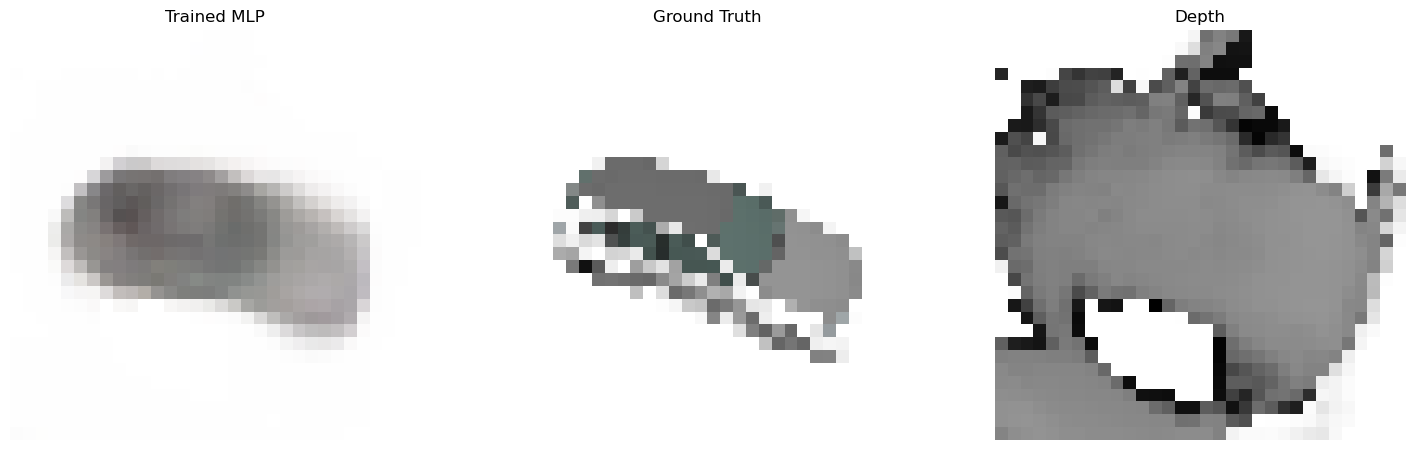

Step 100: loss = 0.01691
car number tensor([9], device='cuda:0')


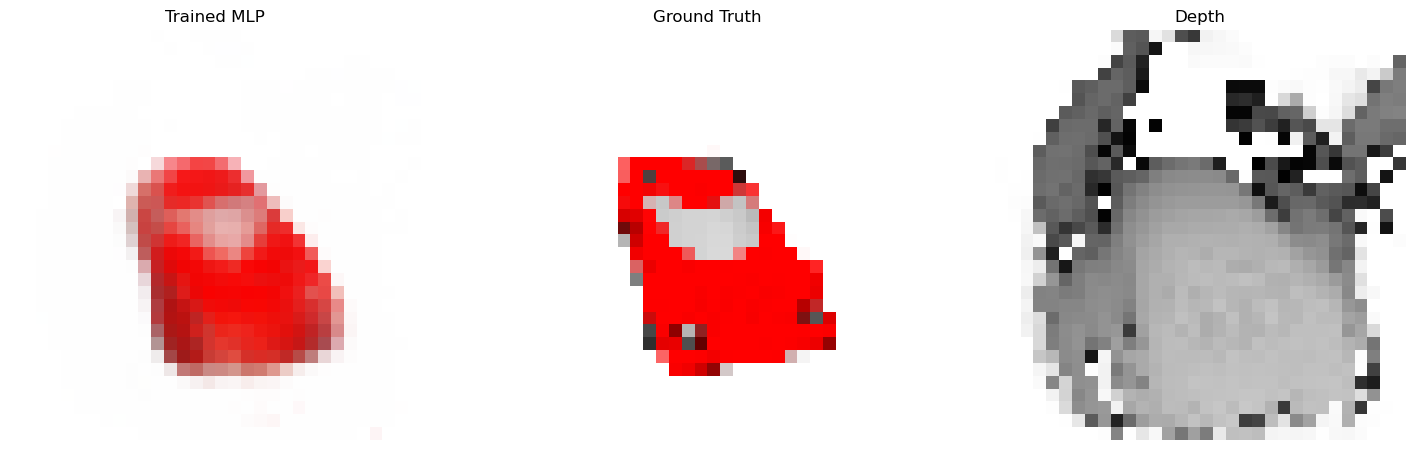

Step 200: loss = 0.00601
car number tensor([809], device='cuda:0')


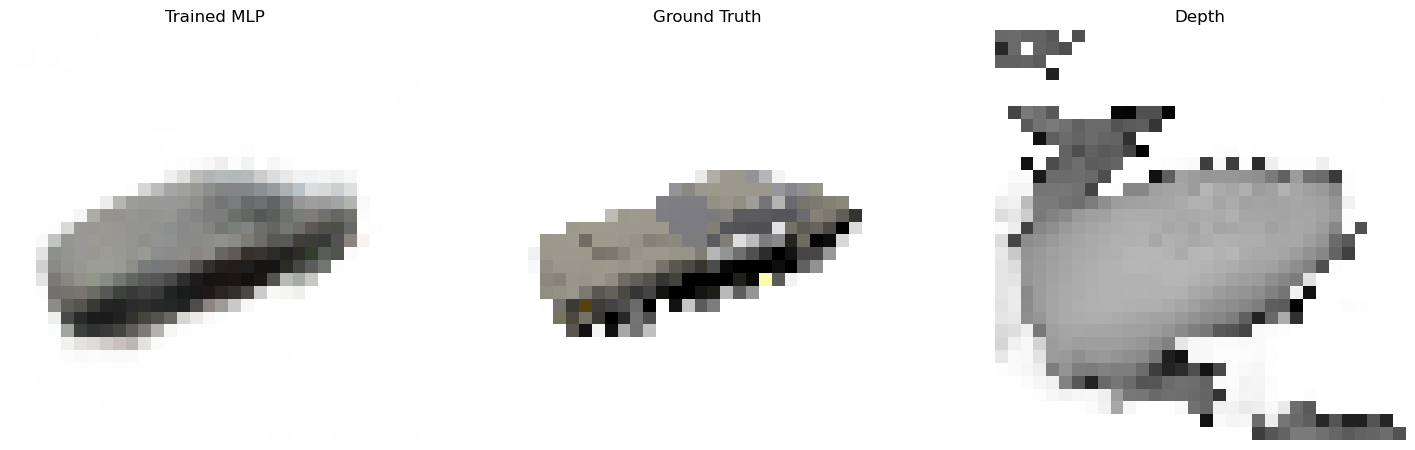

Step 300: loss = 0.00752
car number tensor([2007], device='cuda:0')


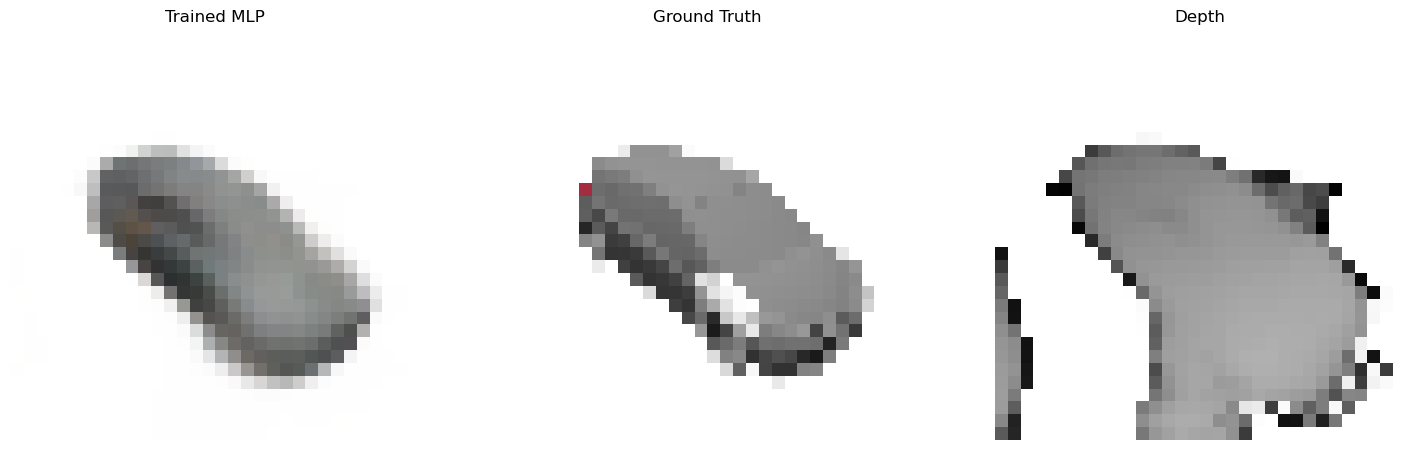

Step 400: loss = 0.02262
car number tensor([180], device='cuda:0')


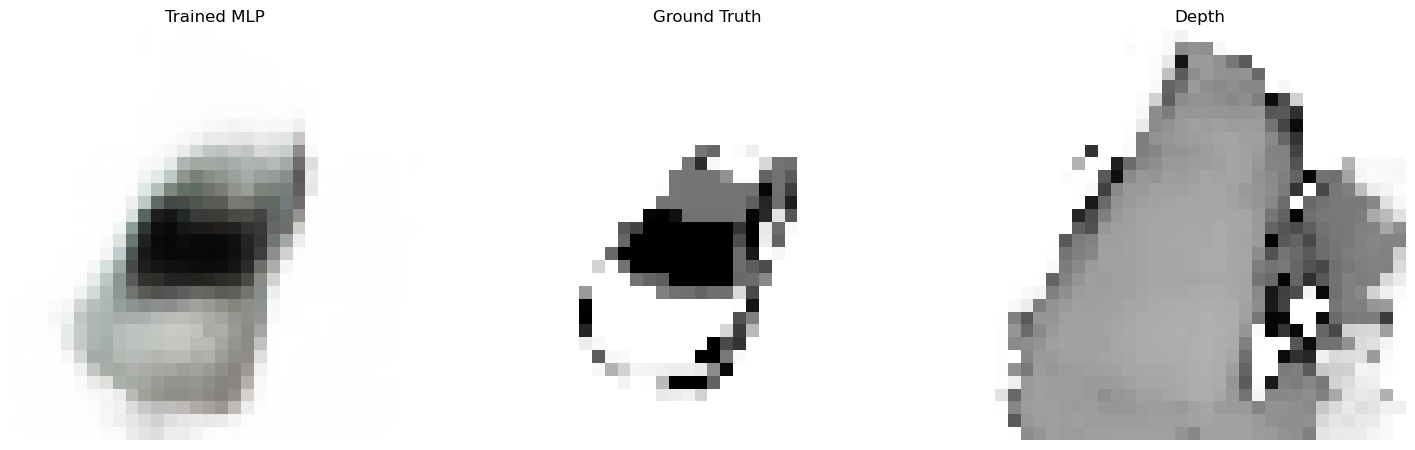

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 500: loss = 0.01778
car number tensor([678], device='cuda:0')


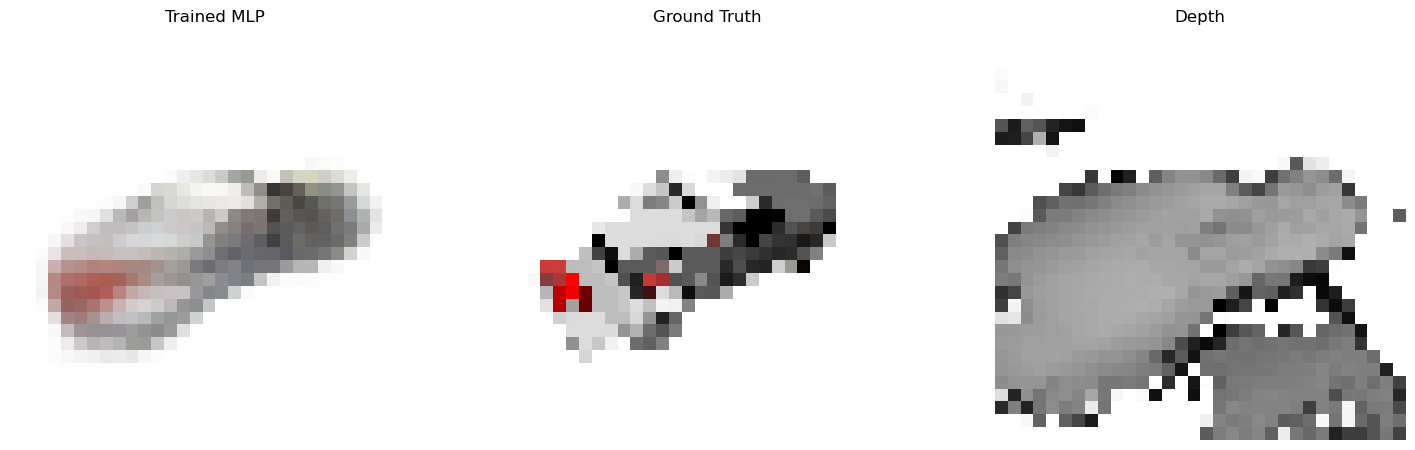

Step 600: loss = 0.00978
car number tensor([256], device='cuda:0')


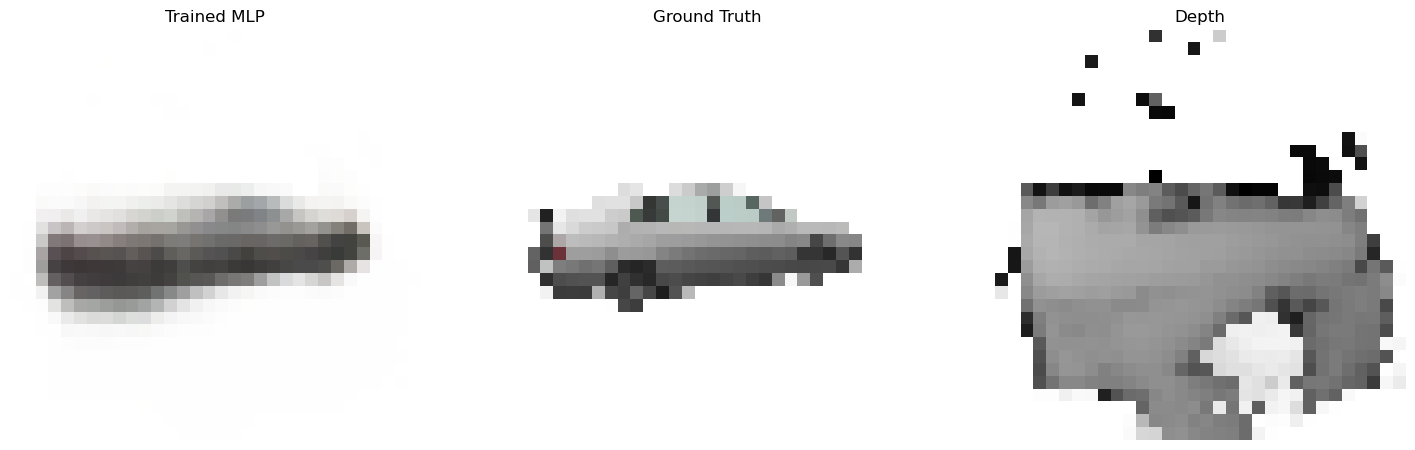

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 700: loss = 0.01451
car number tensor([1239], device='cuda:0')
same view dir as src


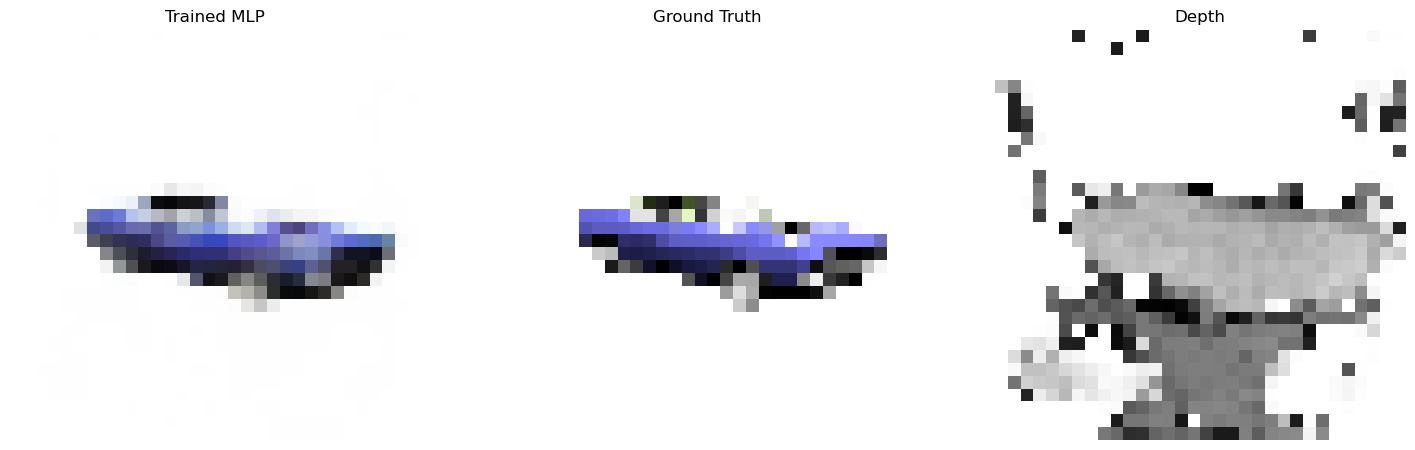

Step 800: loss = 0.00900
car number tensor([507], device='cuda:0')


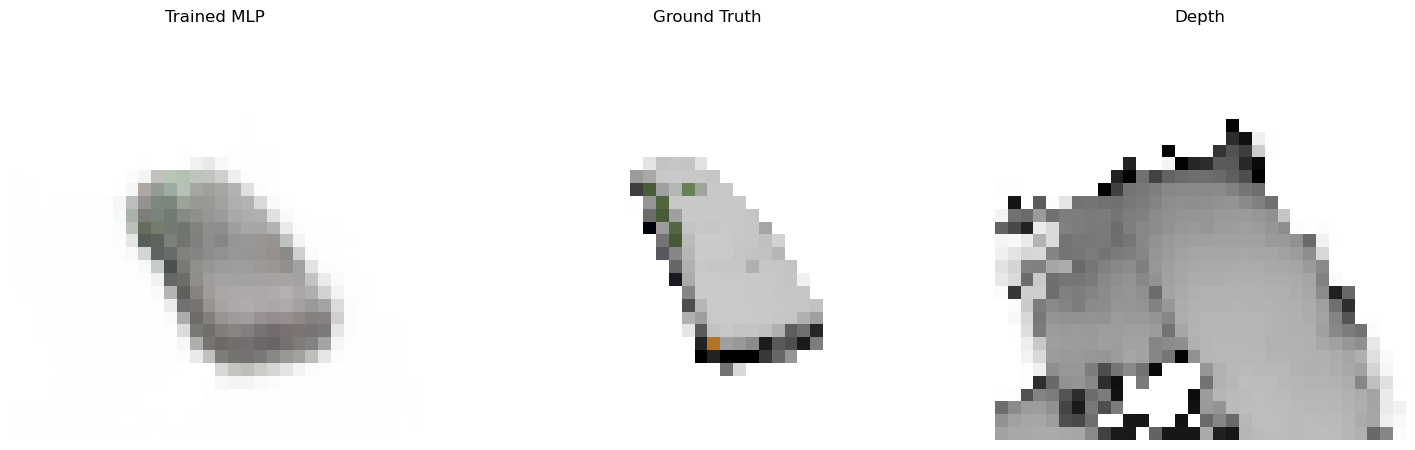

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 900: loss = 0.00609
car number tensor([1461], device='cuda:0')


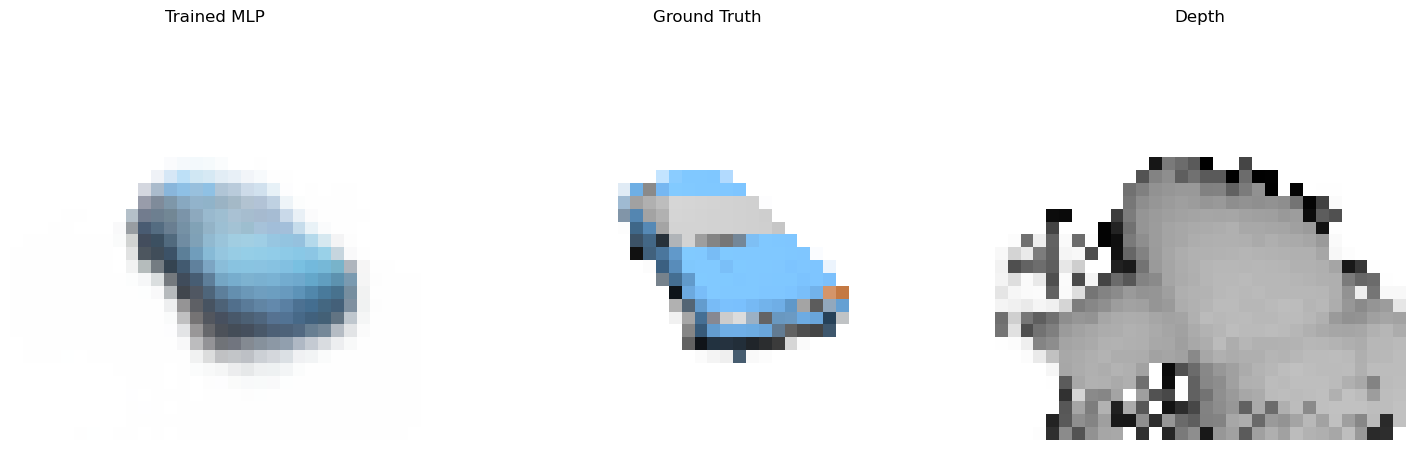

Step 1000: loss = 0.01163
car number tensor([731], device='cuda:0')


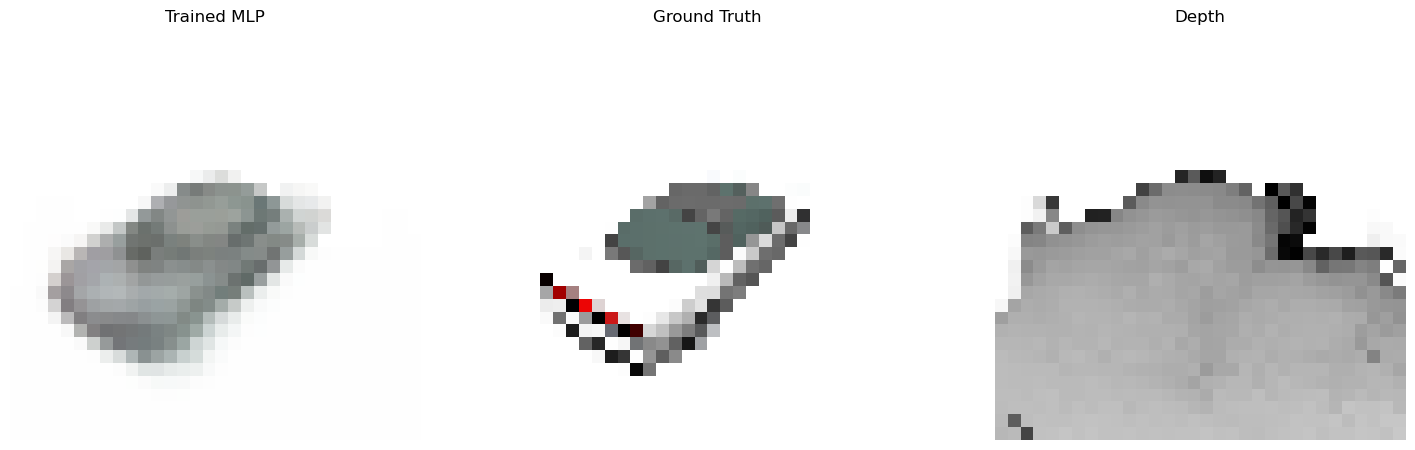

Step 1100: loss = 0.01291
car number tensor([667], device='cuda:0')


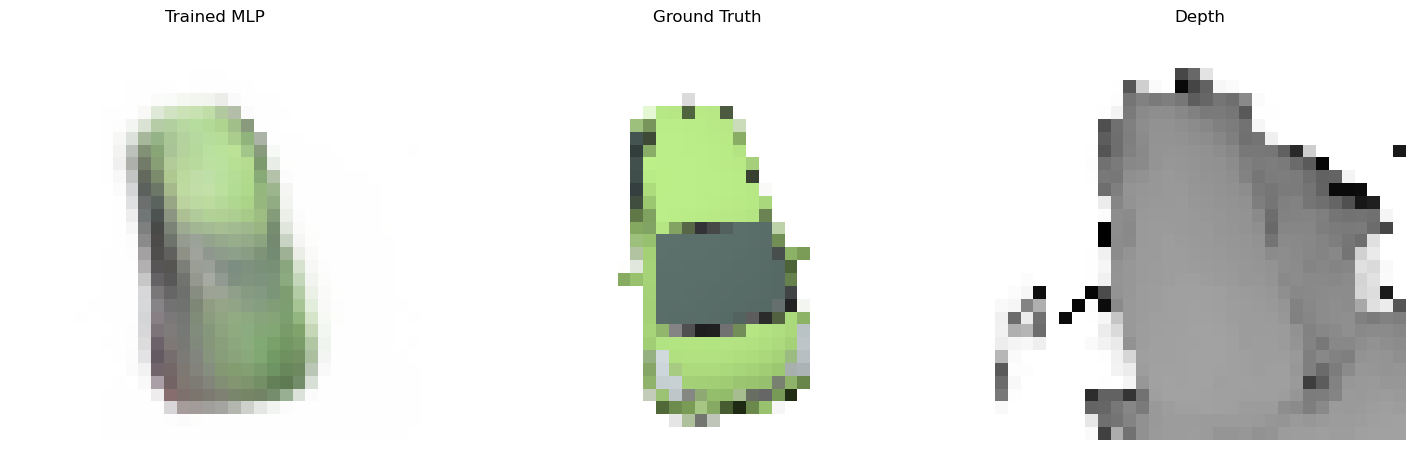

Step 1200: loss = 0.00681
car number tensor([1397], device='cuda:0')
same view dir as src


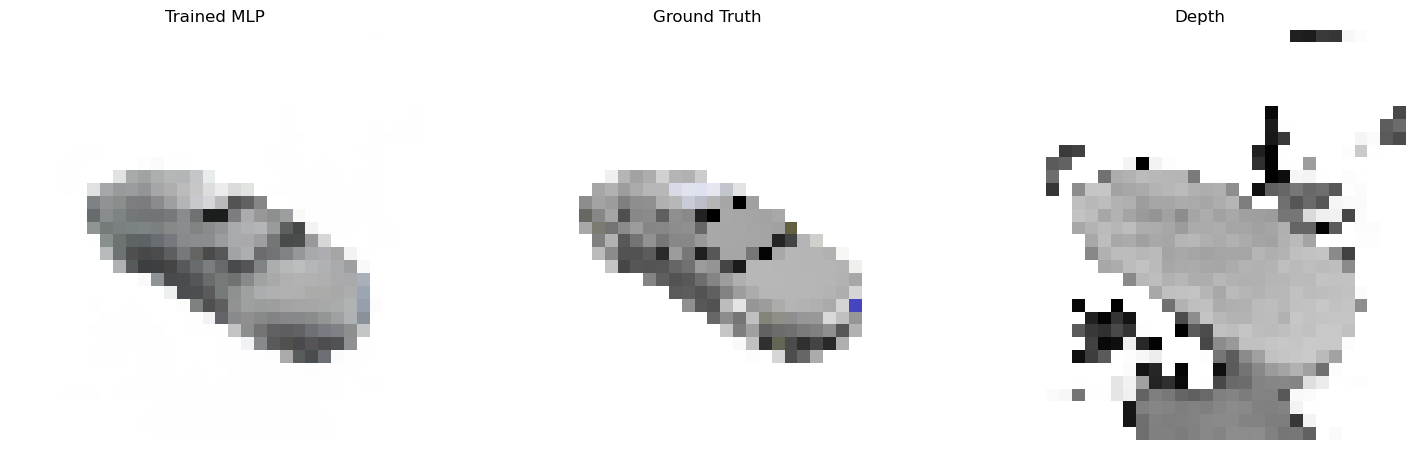

Step 1300: loss = 0.01143
car number tensor([517], device='cuda:0')


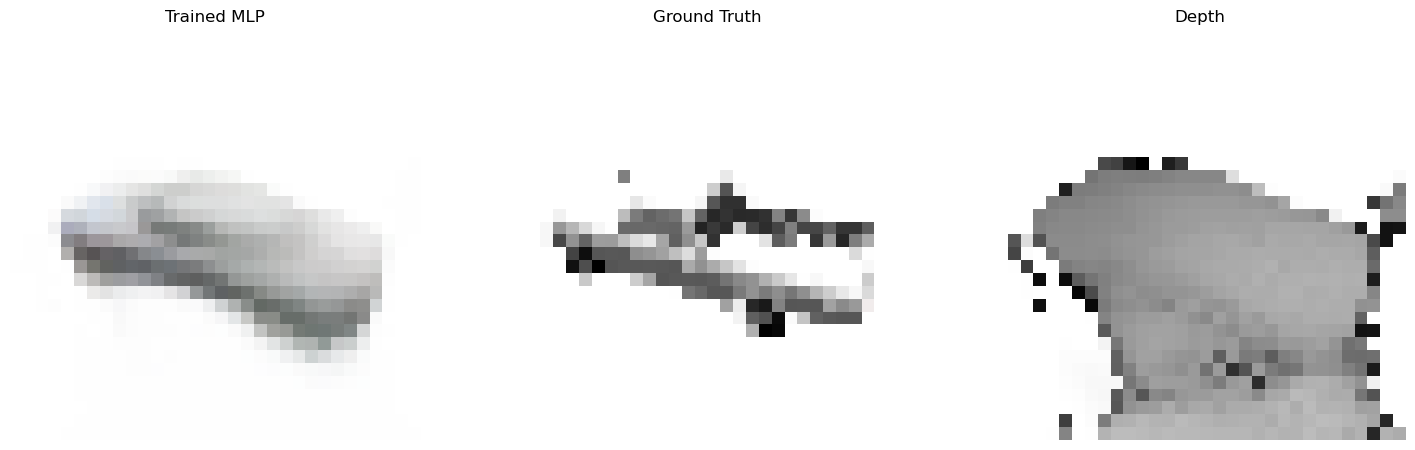

Step 1400: loss = 0.00914
car number tensor([75], device='cuda:0')


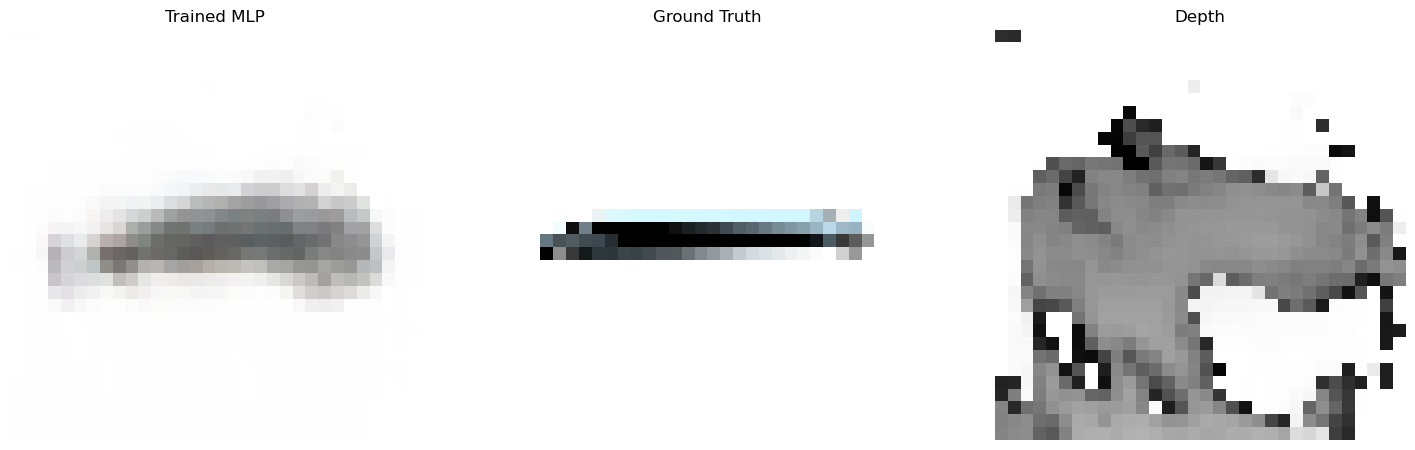

Step 1500: loss = 0.01098
car number tensor([322], device='cuda:0')


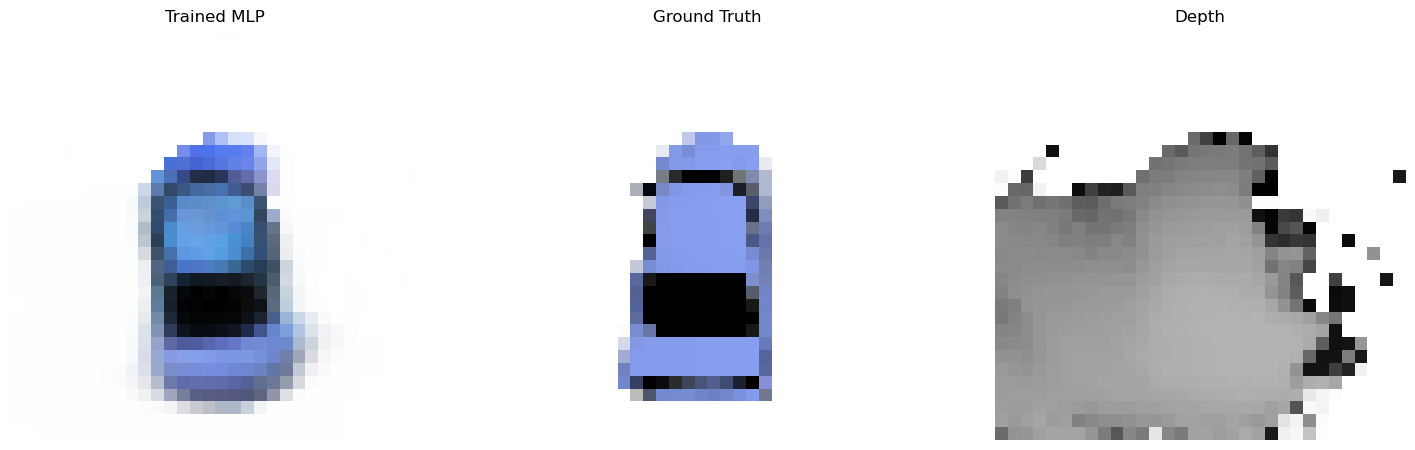

Step 1600: loss = 0.01176
car number tensor([1614], device='cuda:0')


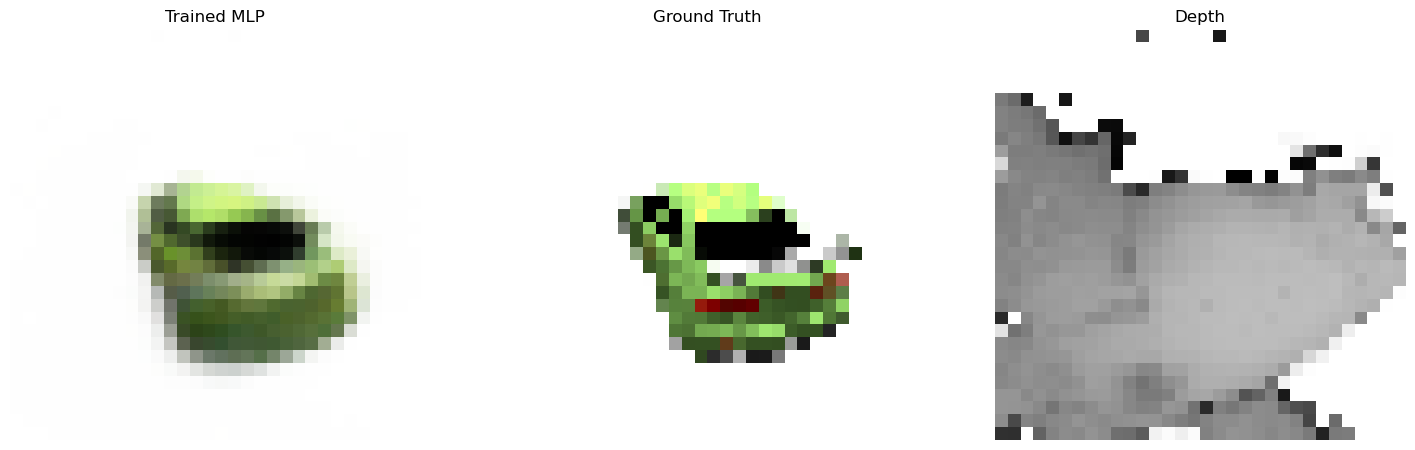

Step 1700: loss = 0.00571
car number tensor([716], device='cuda:0')


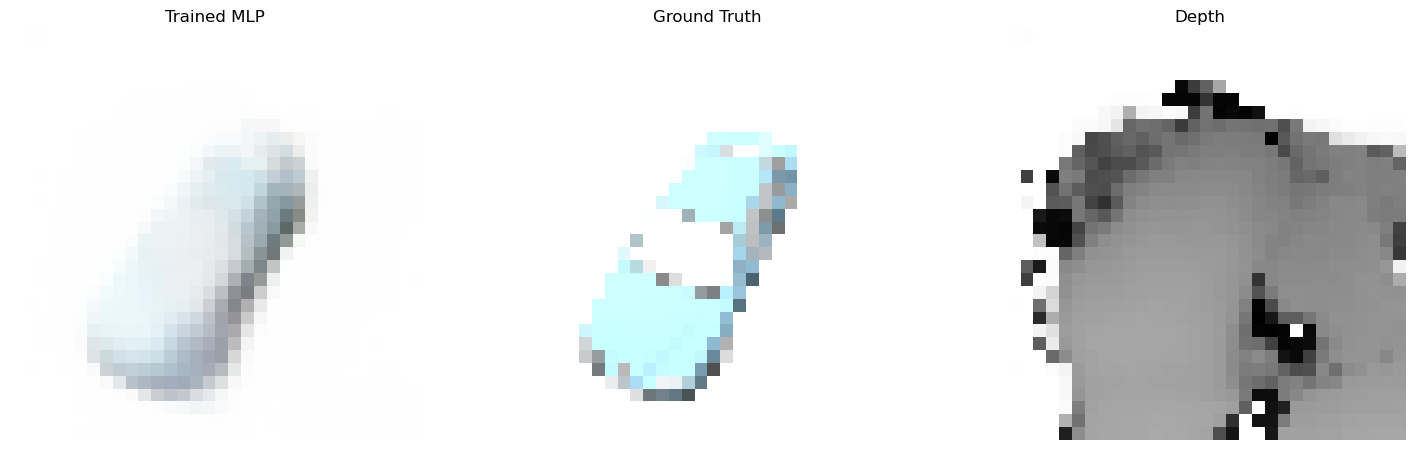

Step 1800: loss = 0.01946
car number tensor([1738], device='cuda:0')
same view dir as src


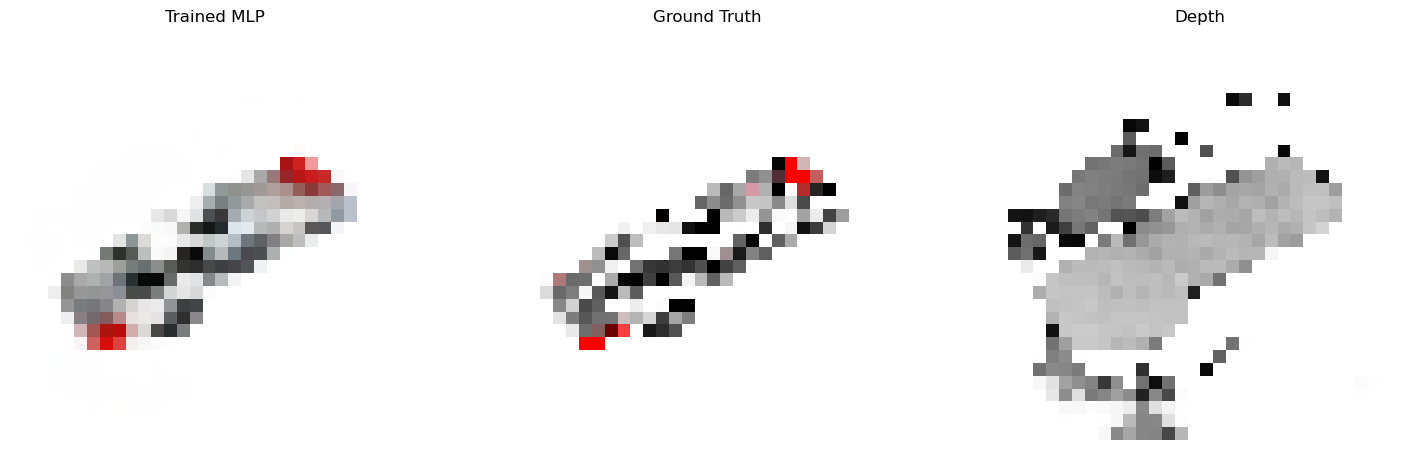

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 1900: loss = 0.01995
car number tensor([1683], device='cuda:0')


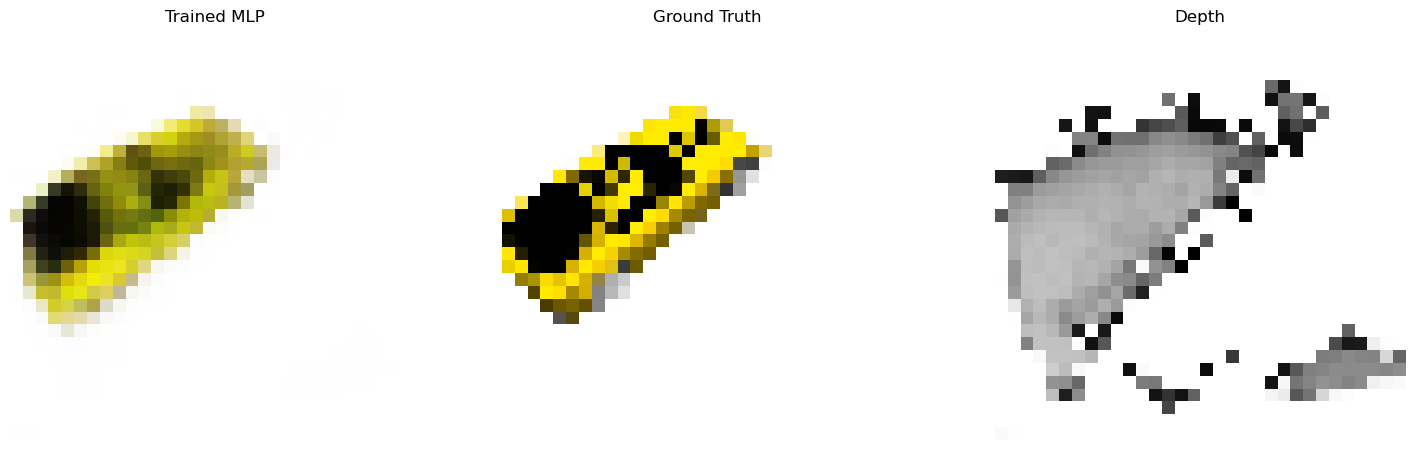

Step 2000: loss = 0.01413
car number tensor([1345], device='cuda:0')


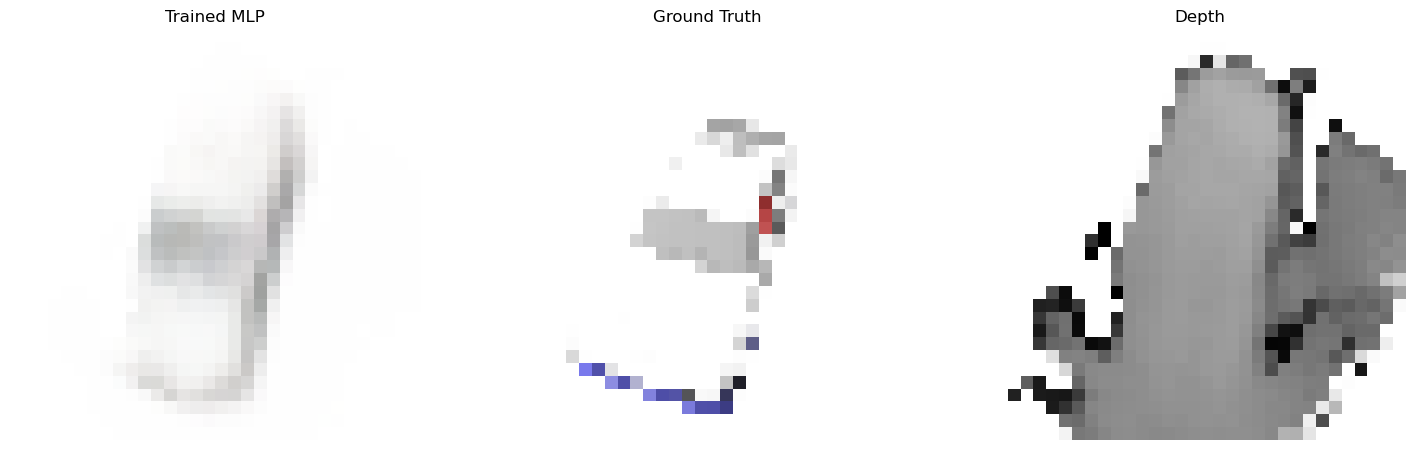

Step 2100: loss = 0.01576
car number tensor([1572], device='cuda:0')


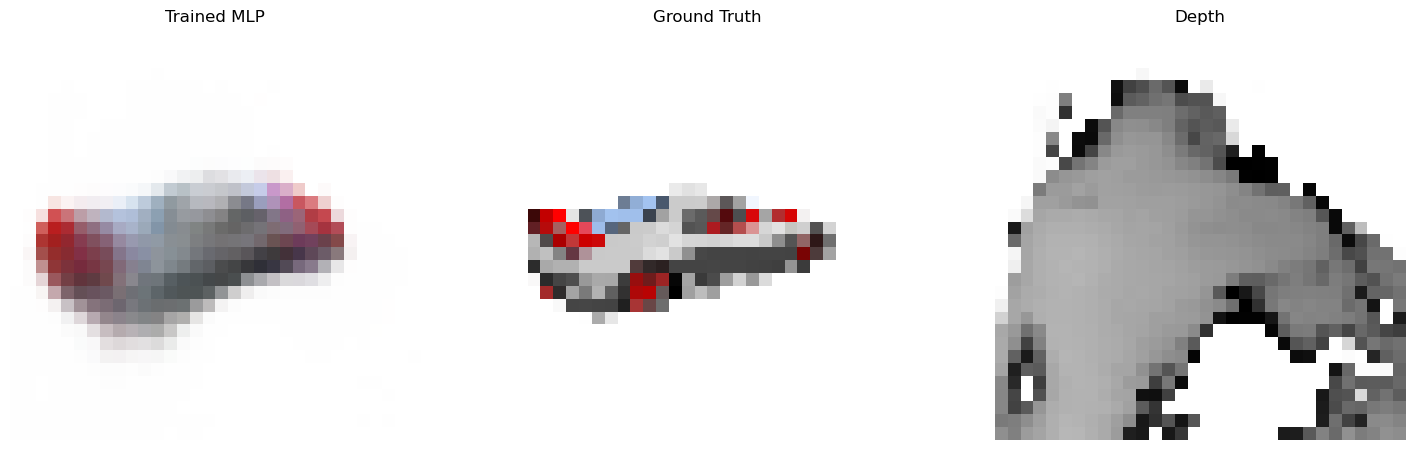

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 2200: loss = 0.00992
car number tensor([460], device='cuda:0')


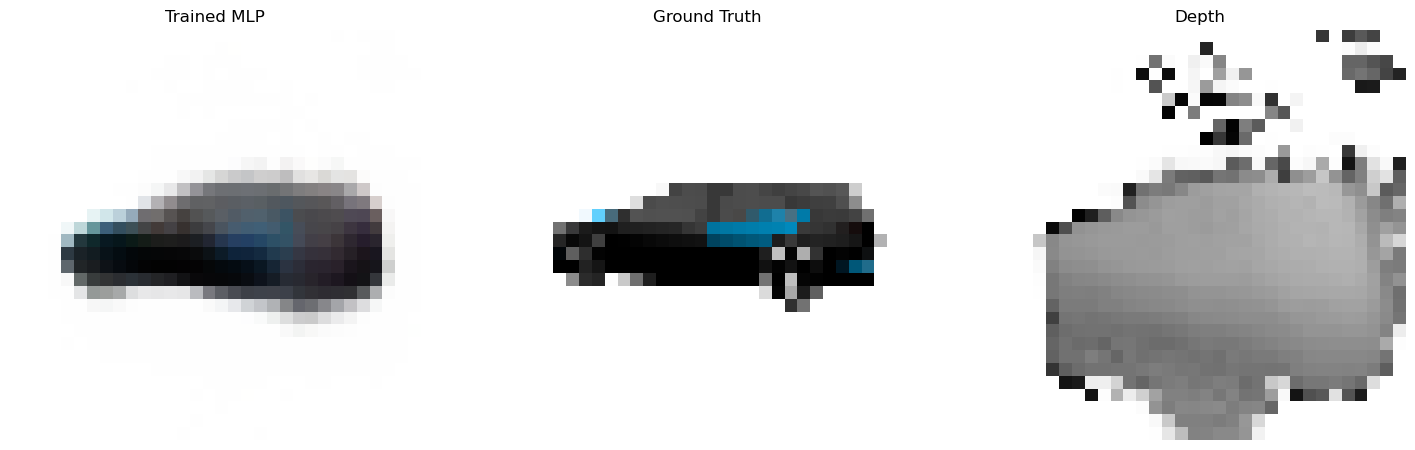

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 2300: loss = 0.00781
car number tensor([1151], device='cuda:0')


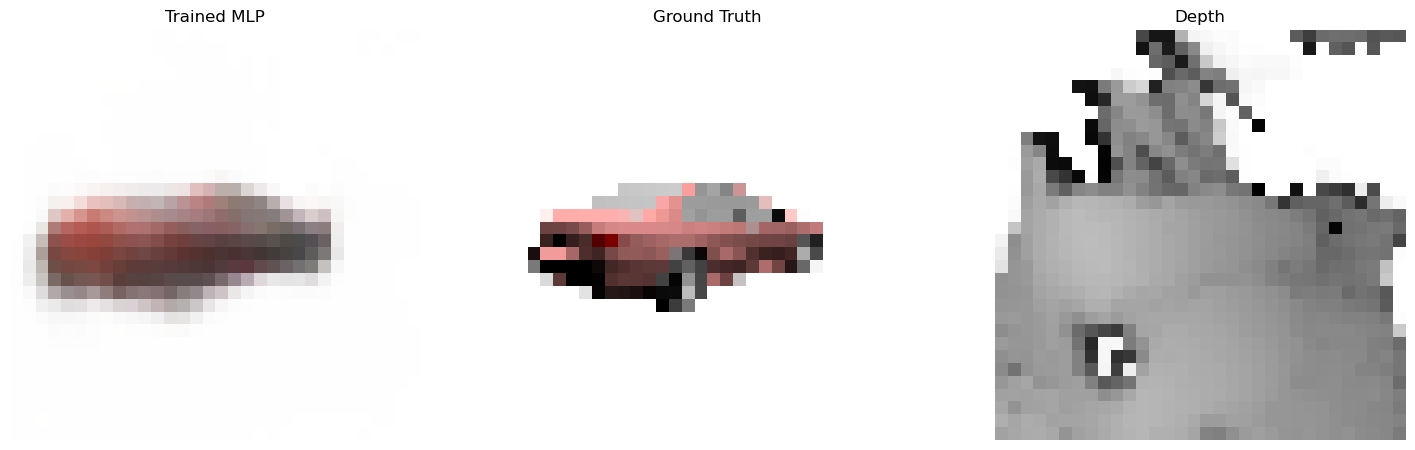

Step 2400: loss = 0.01404
car number tensor([366], device='cuda:0')


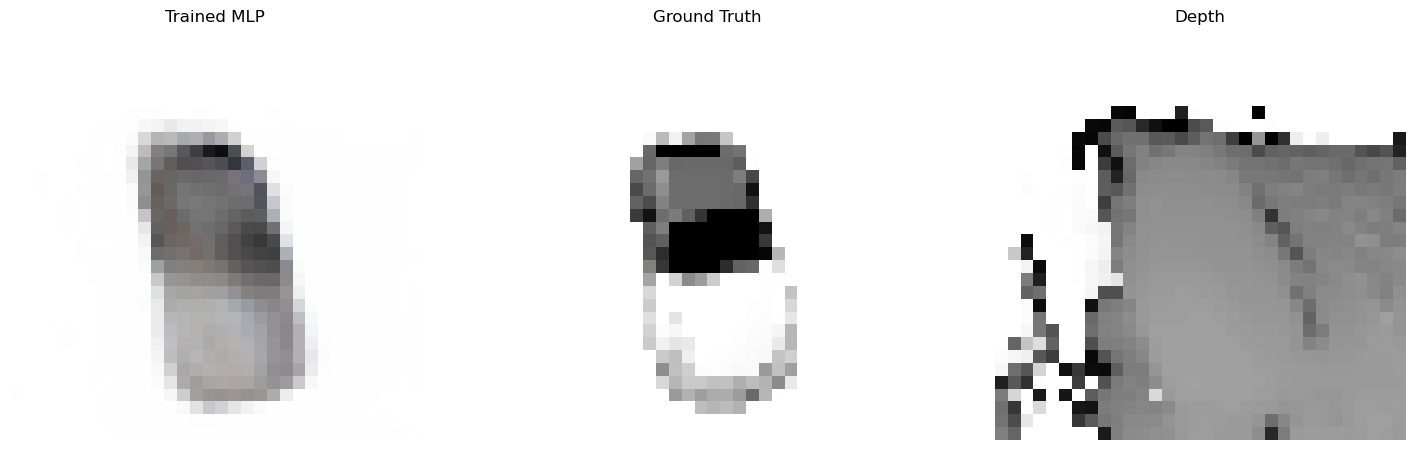

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 2500: loss = 0.01371
car number tensor([326], device='cuda:0')


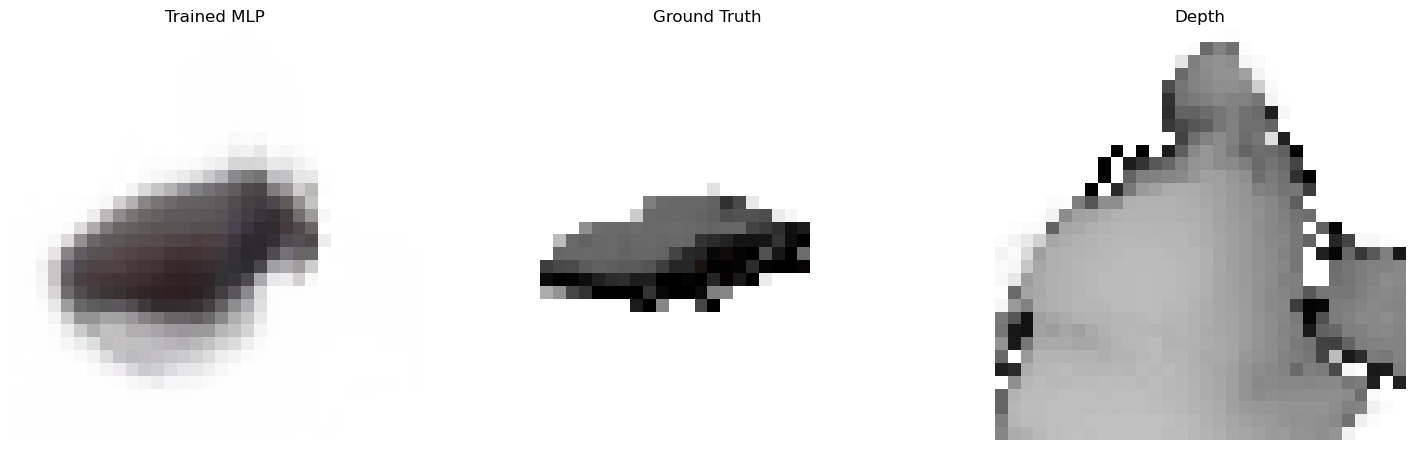

Step 2600: loss = 0.01262
car number tensor([917], device='cuda:0')


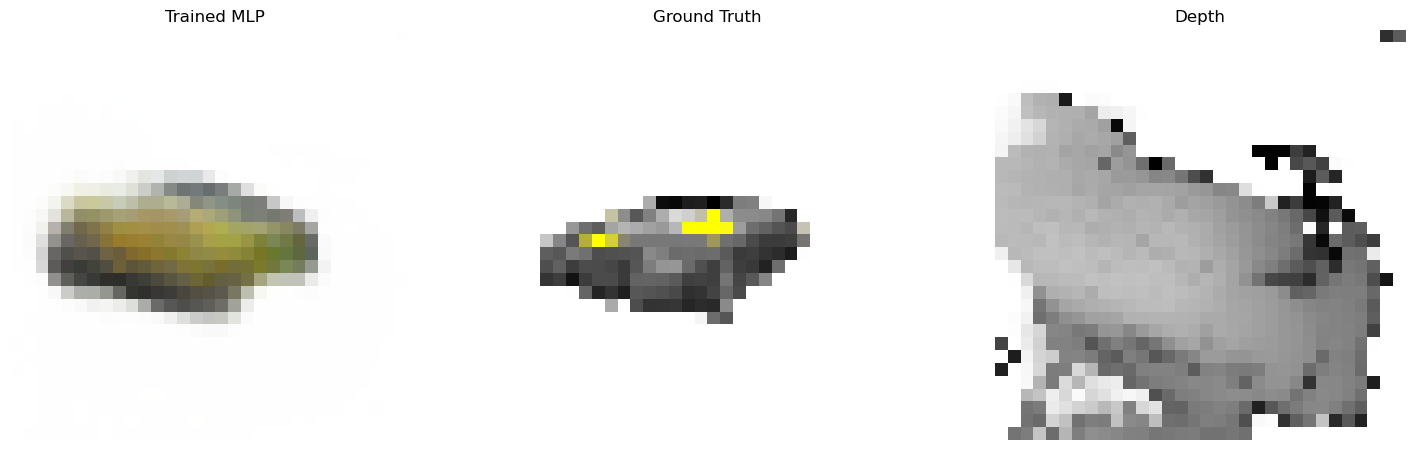

Step 2700: loss = 0.02268
car number tensor([1316], device='cuda:0')


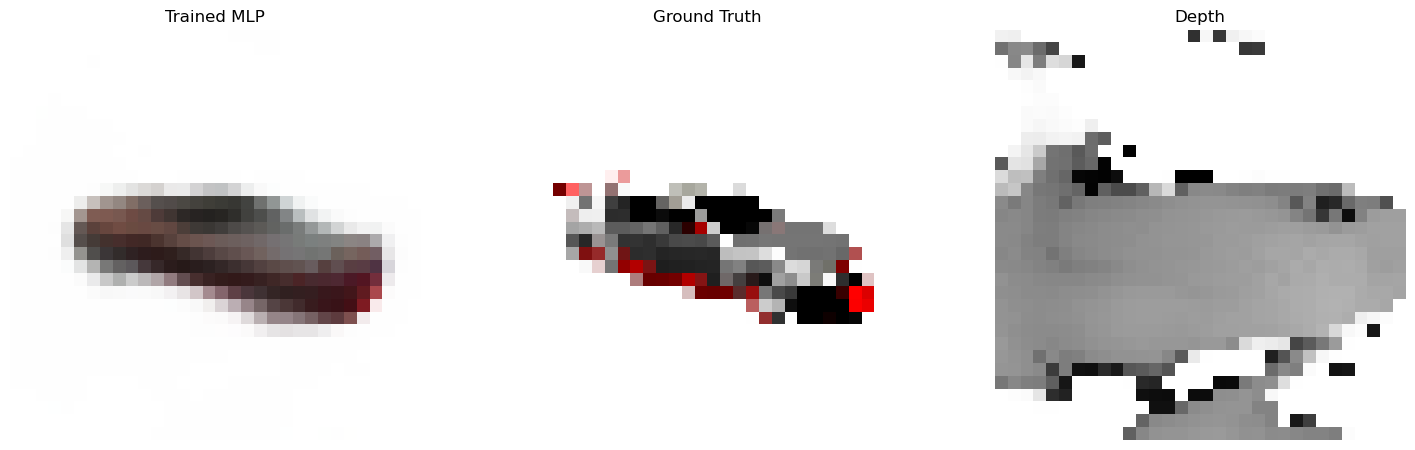

Step 2800: loss = 0.01442
car number tensor([1899], device='cuda:0')


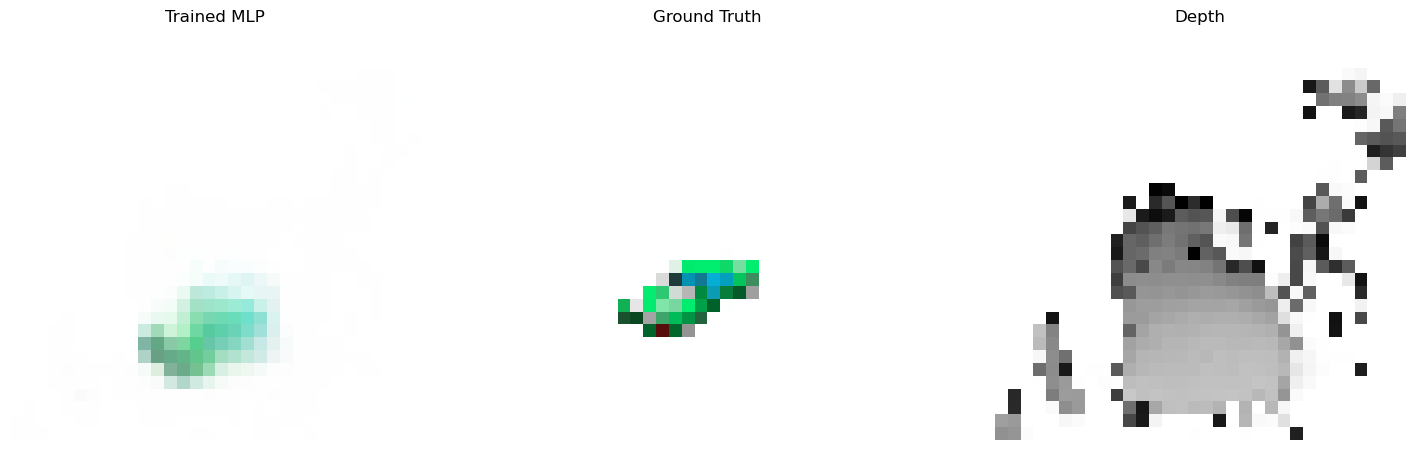

Step 2900: loss = 0.03150
car number tensor([2050], device='cuda:0')


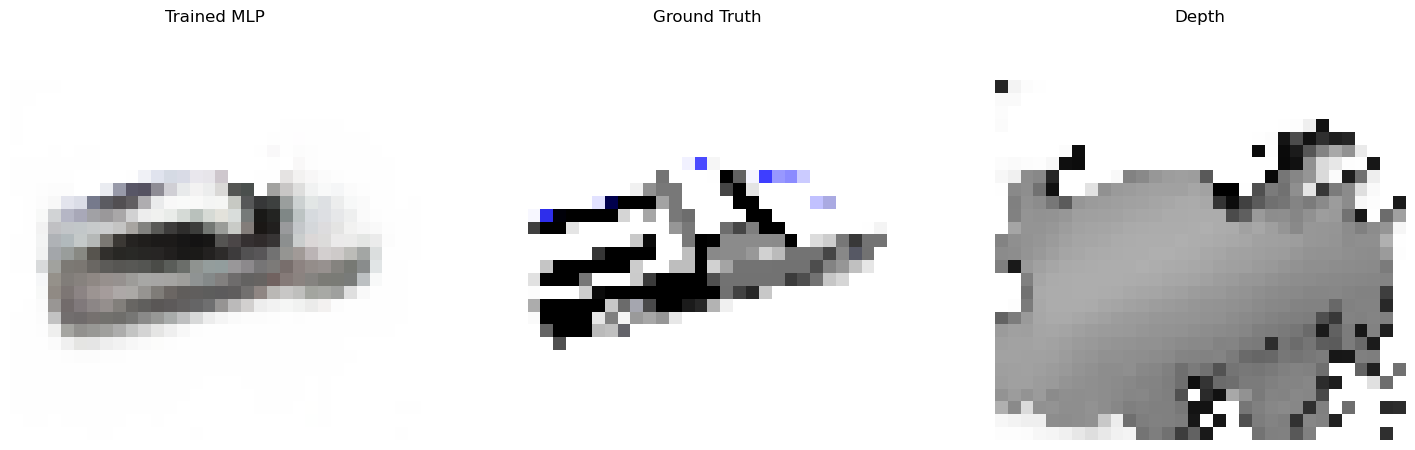

Step 3000: loss = 0.00420
car number tensor([1368], device='cuda:0')


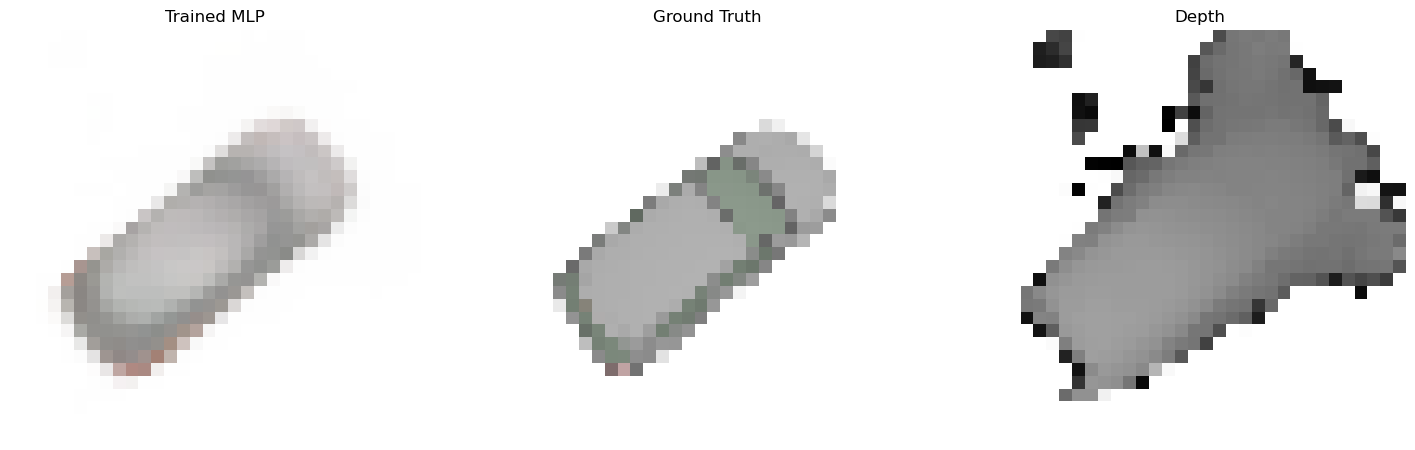

Step 3100: loss = 0.01487
car number tensor([2113], device='cuda:0')


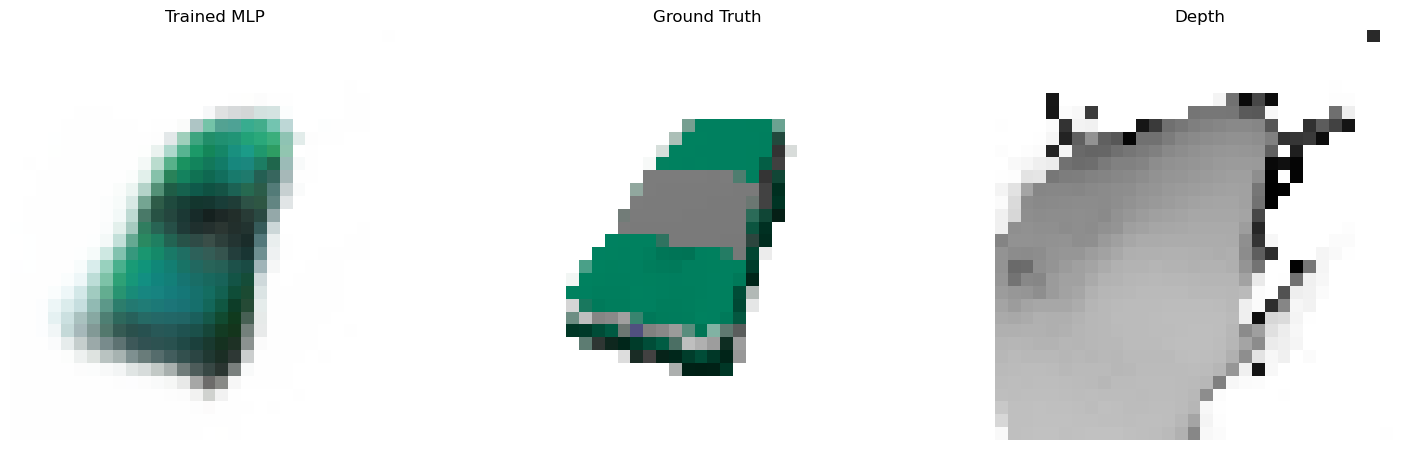

Step 3200: loss = 0.02544
car number tensor([2064], device='cuda:0')


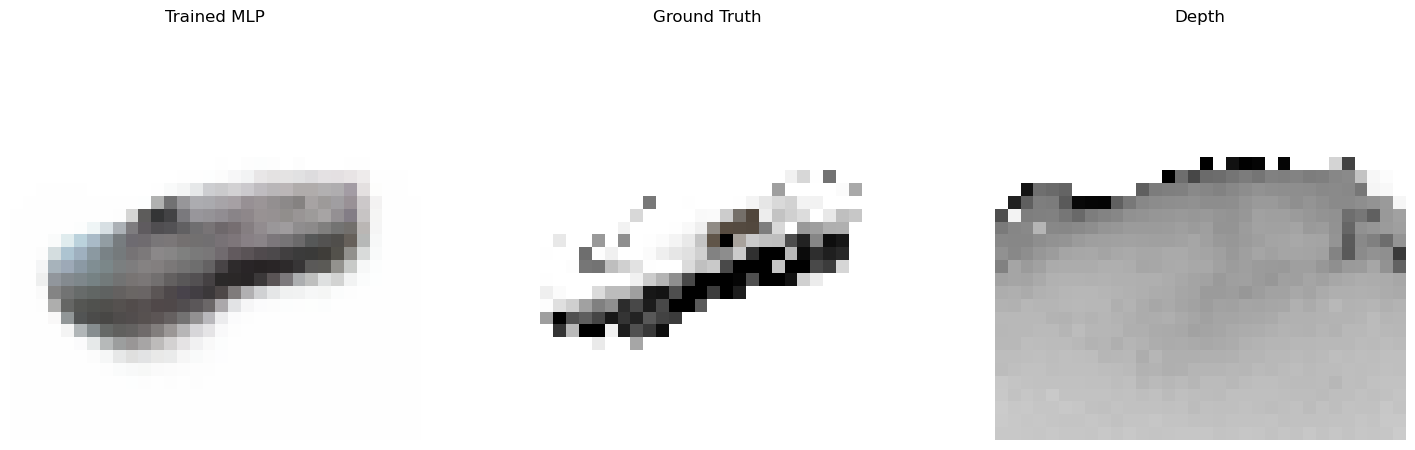

Step 3300: loss = 0.01376
car number tensor([1695], device='cuda:0')


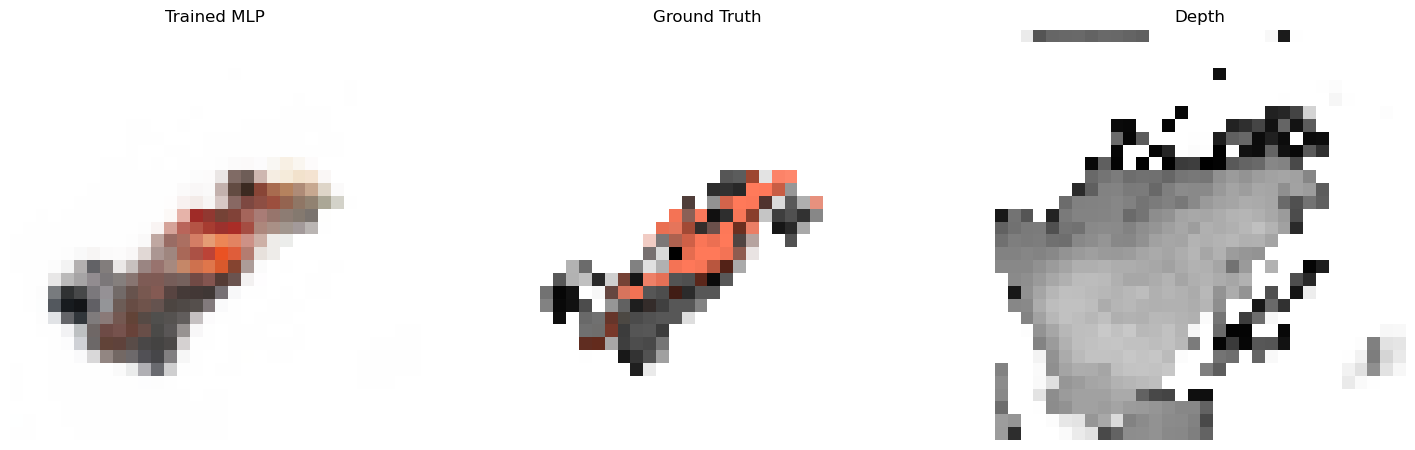

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 3400: loss = 0.00611
car number tensor([392], device='cuda:0')


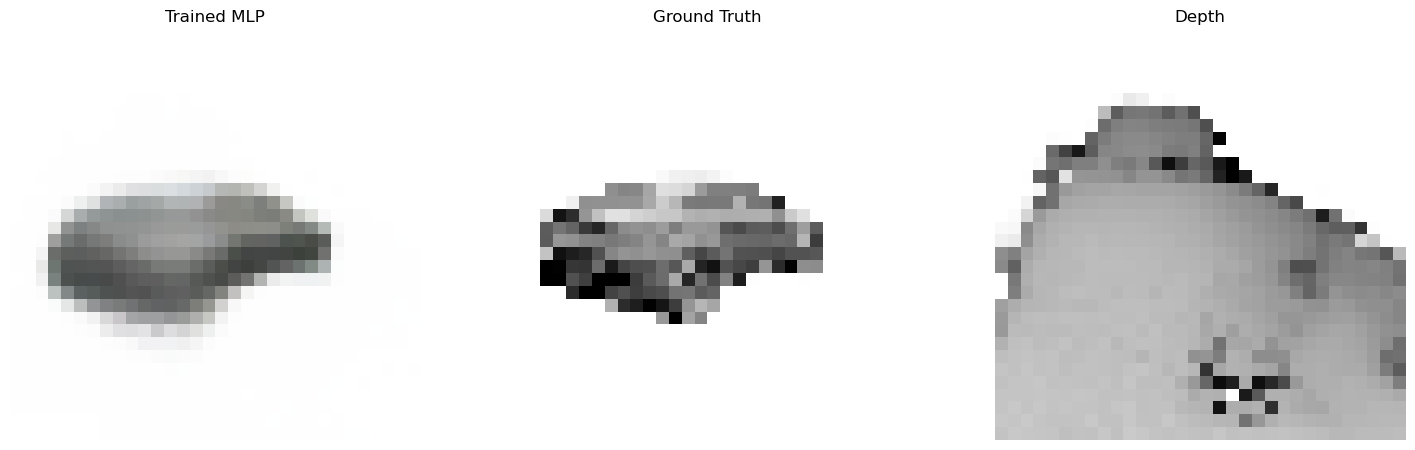

Step 3500: loss = 0.01241
car number tensor([730], device='cuda:0')


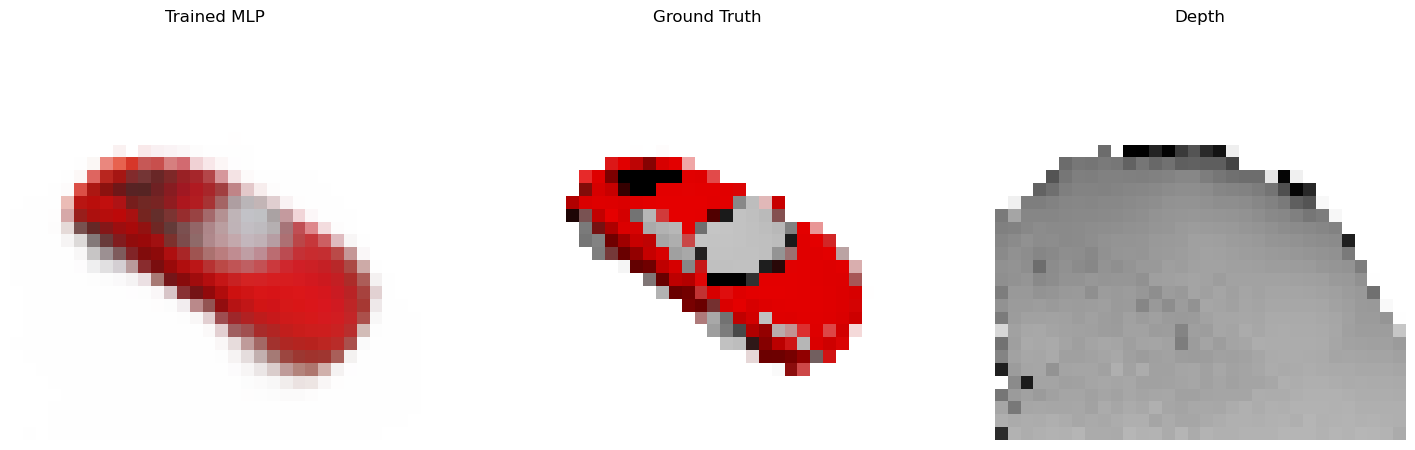

Step 3600: loss = 0.01468
car number tensor([98], device='cuda:0')
same view dir as src


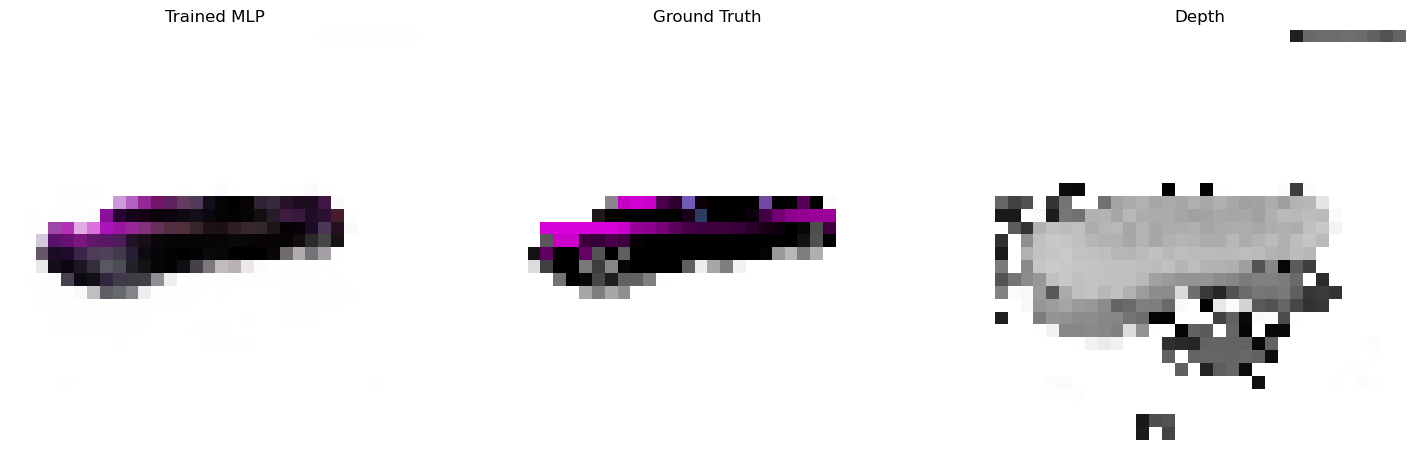

Step 3700: loss = 0.01457
car number tensor([1714], device='cuda:0')


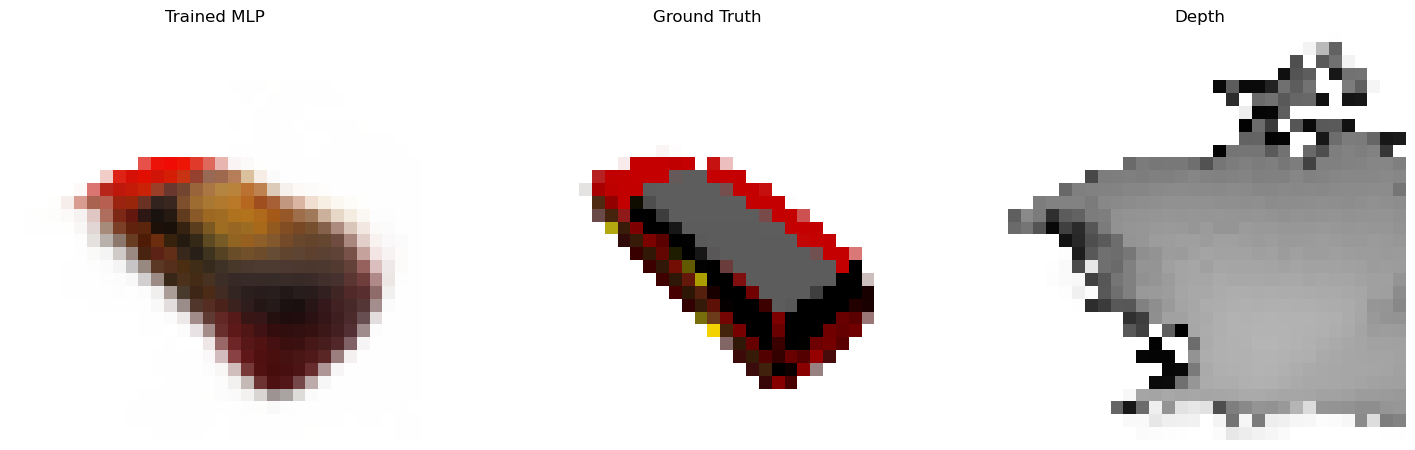

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 3800: loss = 0.02361
car number tensor([787], device='cuda:0')
same view dir as src


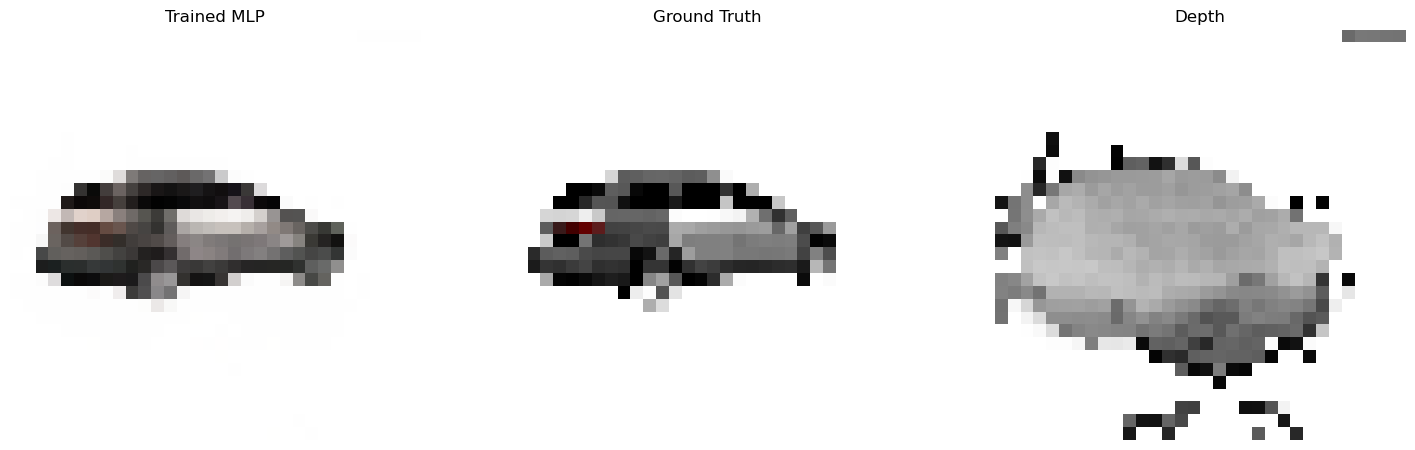

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 3900: loss = 0.01993
car number tensor([1177], device='cuda:0')
same view dir as src


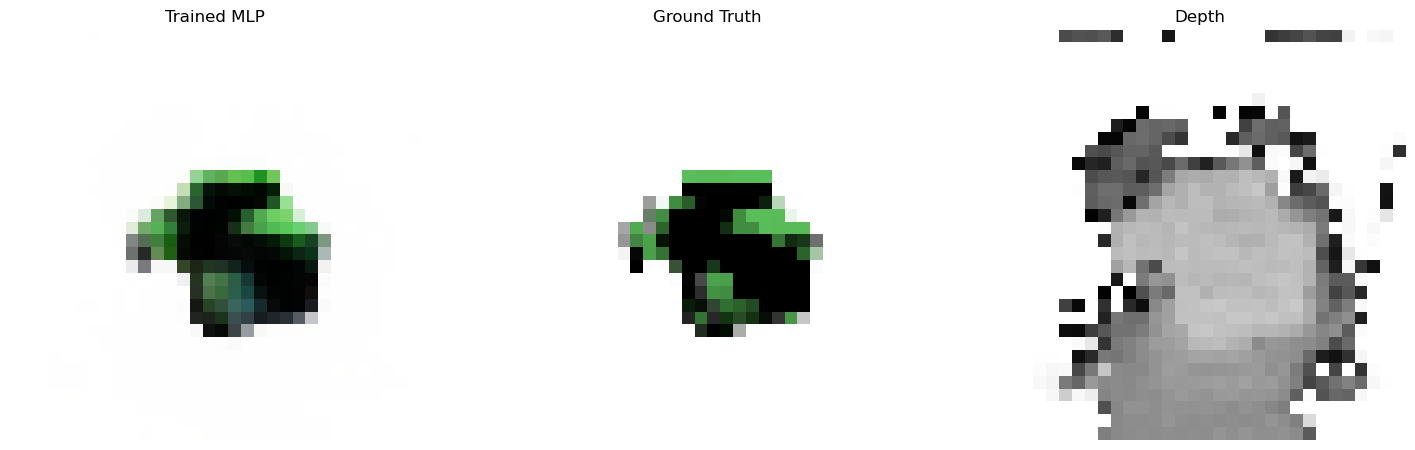

Step 4000: loss = 0.00625
car number tensor([706], device='cuda:0')


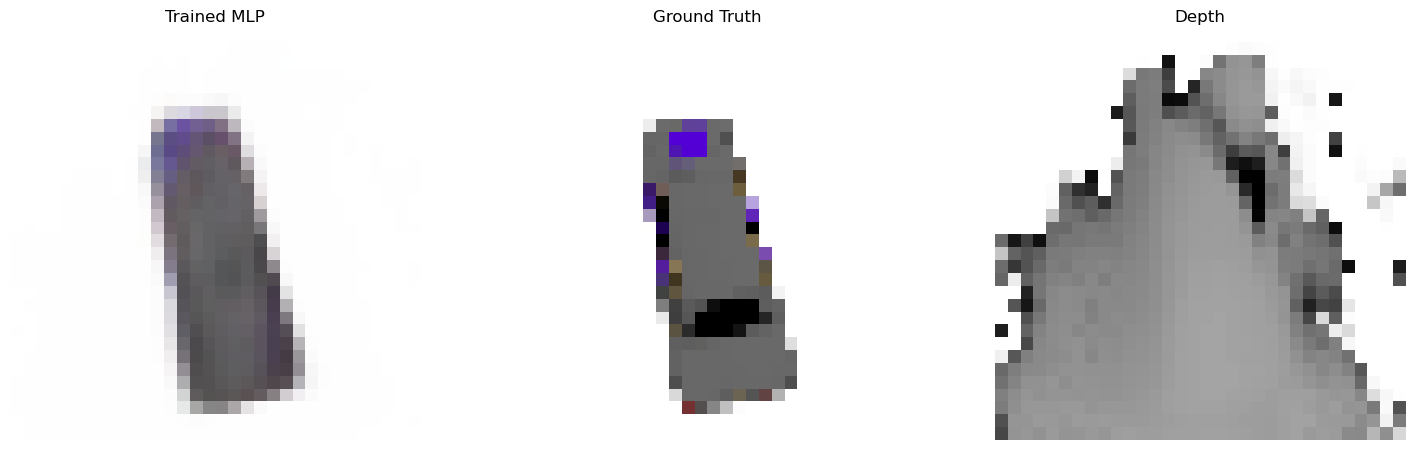

Step 4100: loss = 0.01672
car number tensor([1139], device='cuda:0')


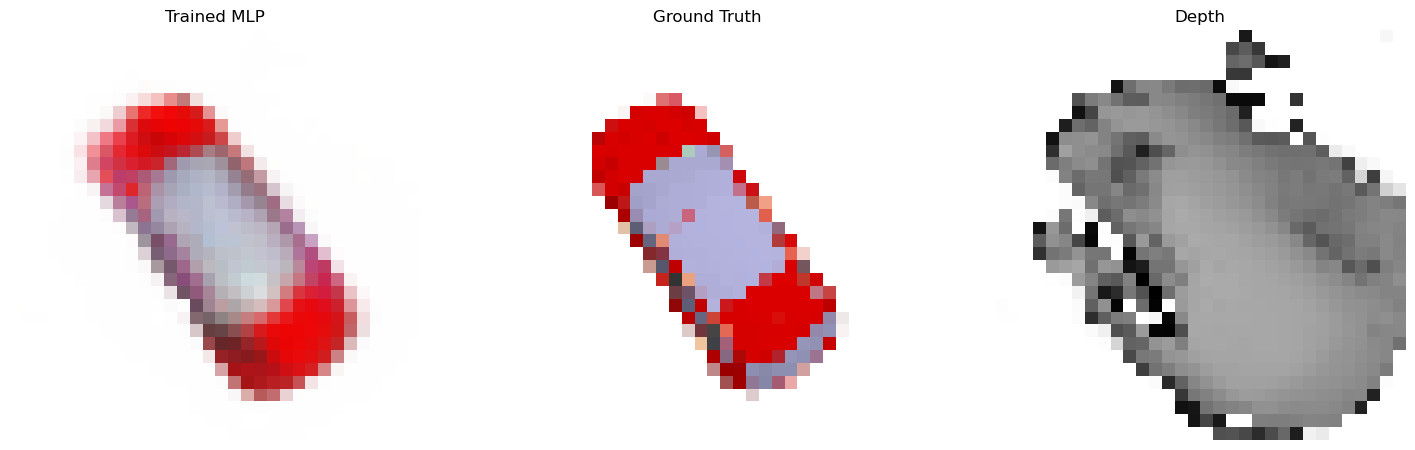

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 4200: loss = 0.00853
car number tensor([719], device='cuda:0')
same view dir as src


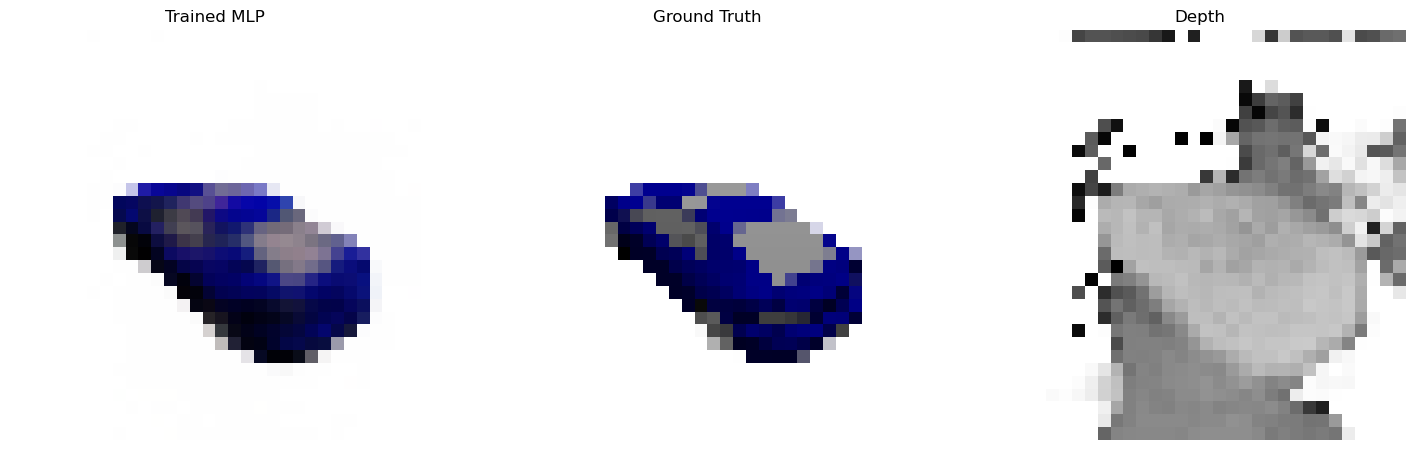

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 4300: loss = 0.01779
car number tensor([1194], device='cuda:0')


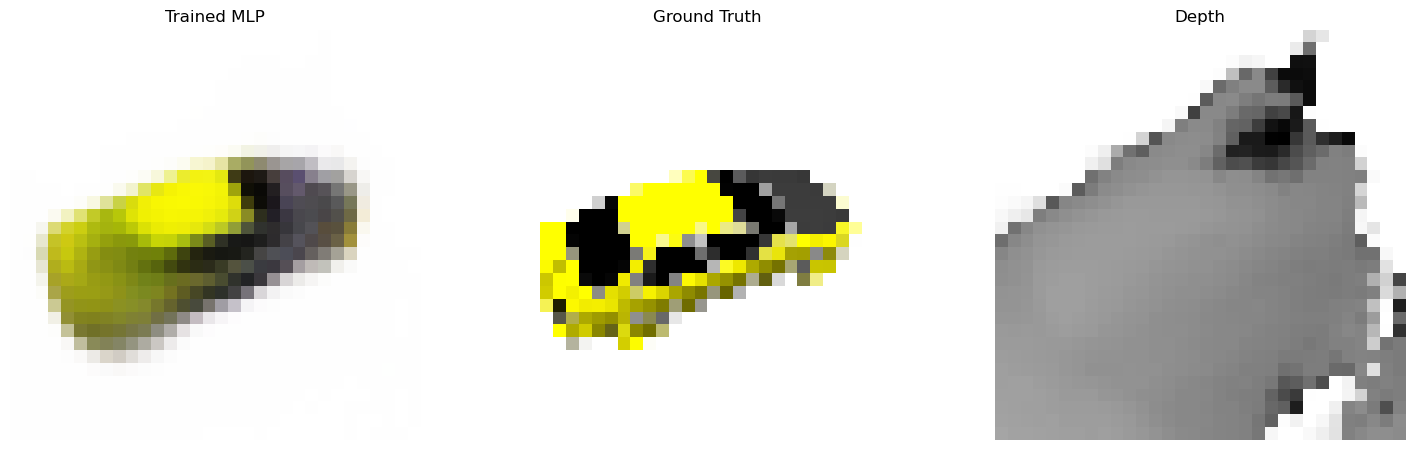

Step 4400: loss = 0.02136
car number tensor([1609], device='cuda:0')
same view dir as src


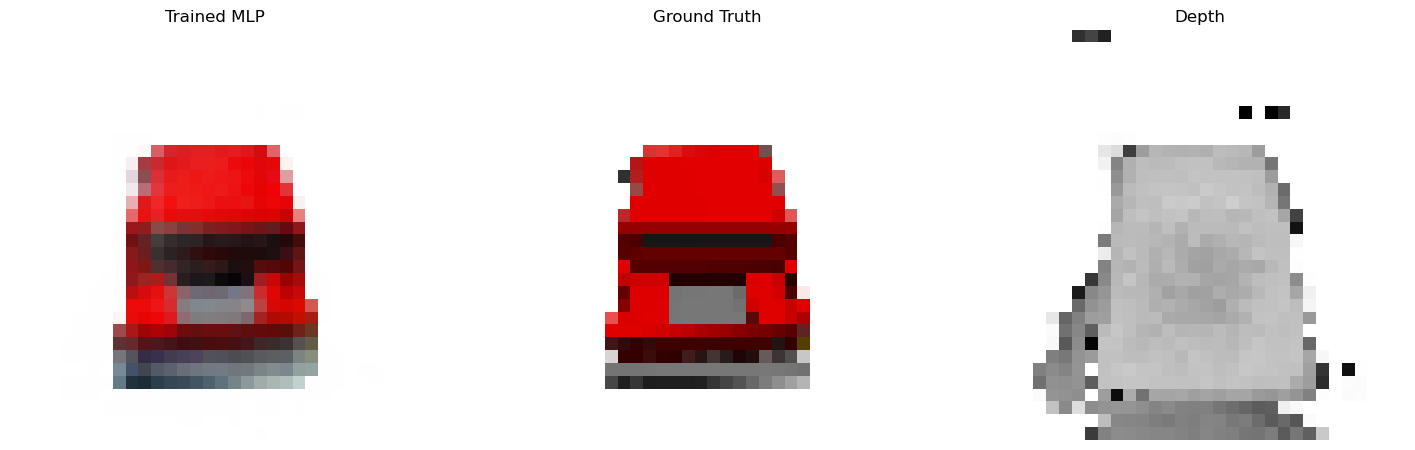

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 4500: loss = 0.00846
car number tensor([528], device='cuda:0')
same view dir as src


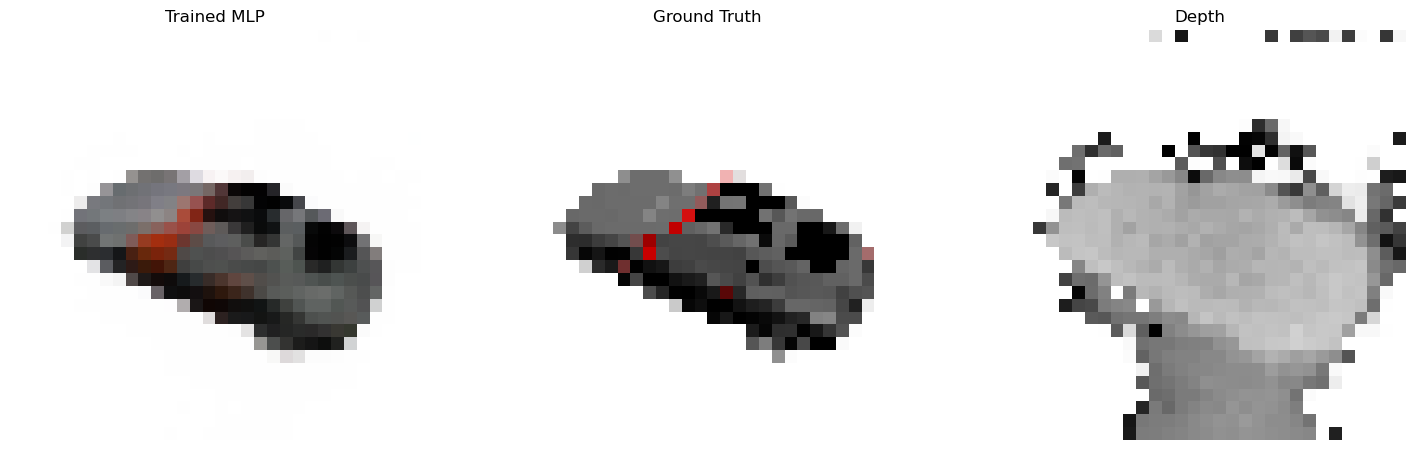

Step 4600: loss = 0.01282
car number tensor([2093], device='cuda:0')


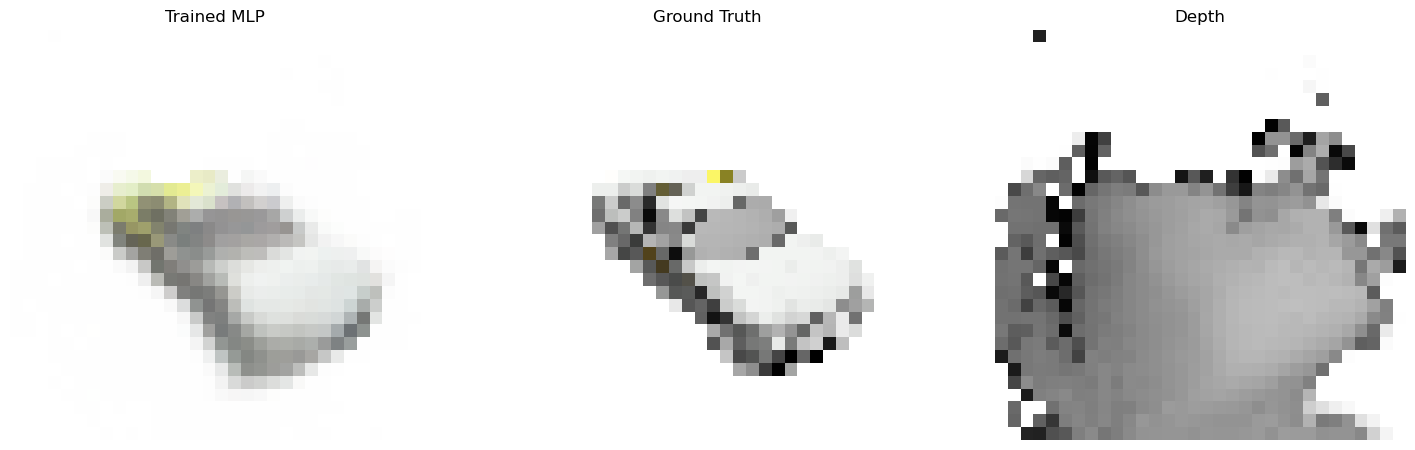

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 4700: loss = 0.01493
car number tensor([1431], device='cuda:0')


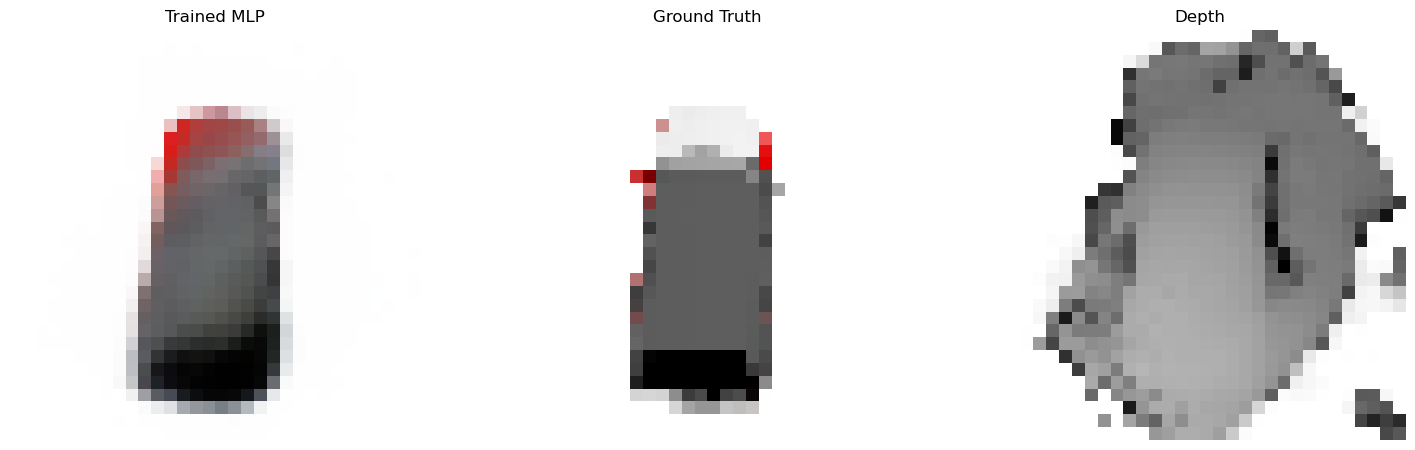

Step 4800: loss = 0.00690
car number tensor([1074], device='cuda:0')


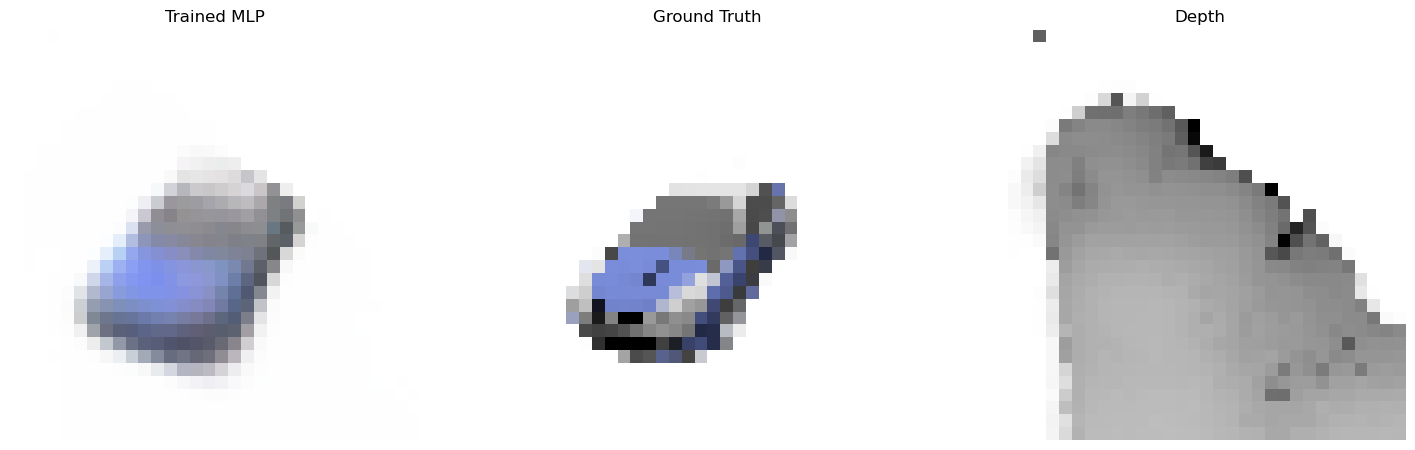

Step 4900: loss = 0.01484
car number tensor([79], device='cuda:0')


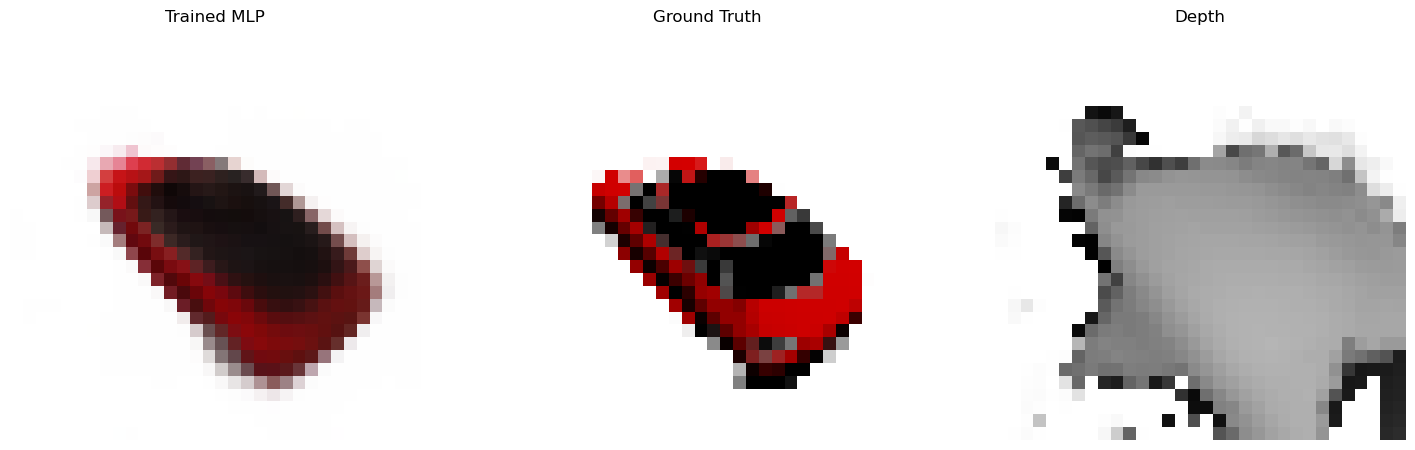

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 5000: loss = 0.01636
car number tensor([398], device='cuda:0')


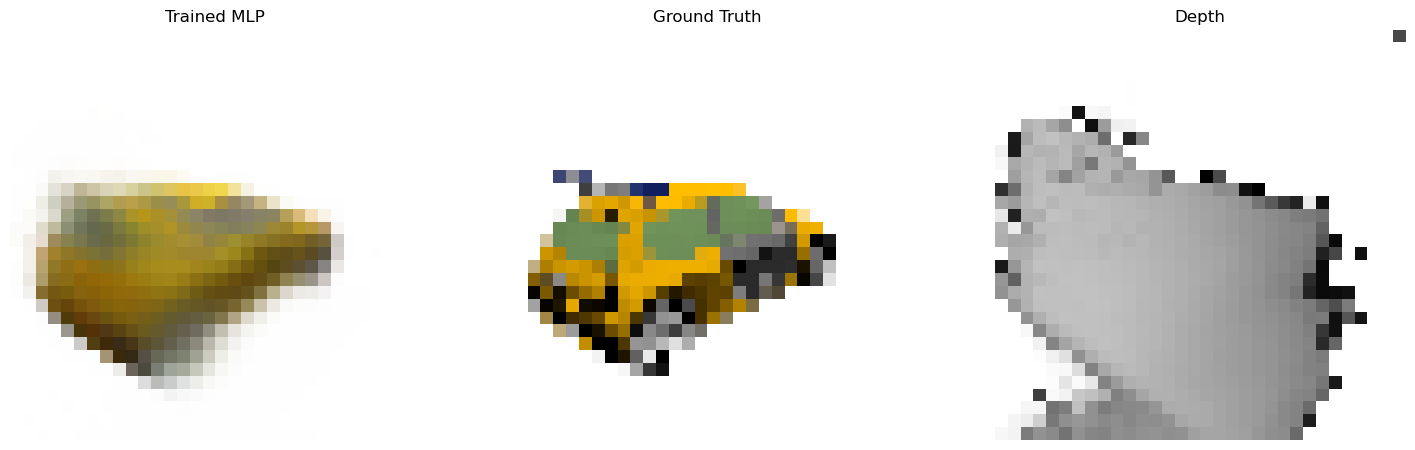

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 5100: loss = 0.01151
car number tensor([37], device='cuda:0')


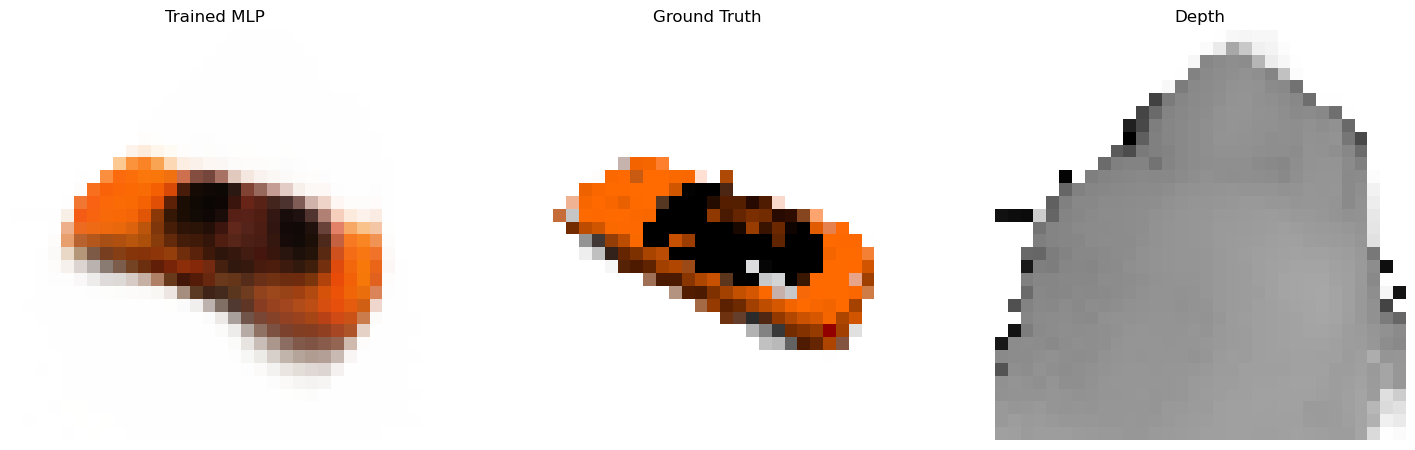

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 5200: loss = 0.01120
car number tensor([828], device='cuda:0')


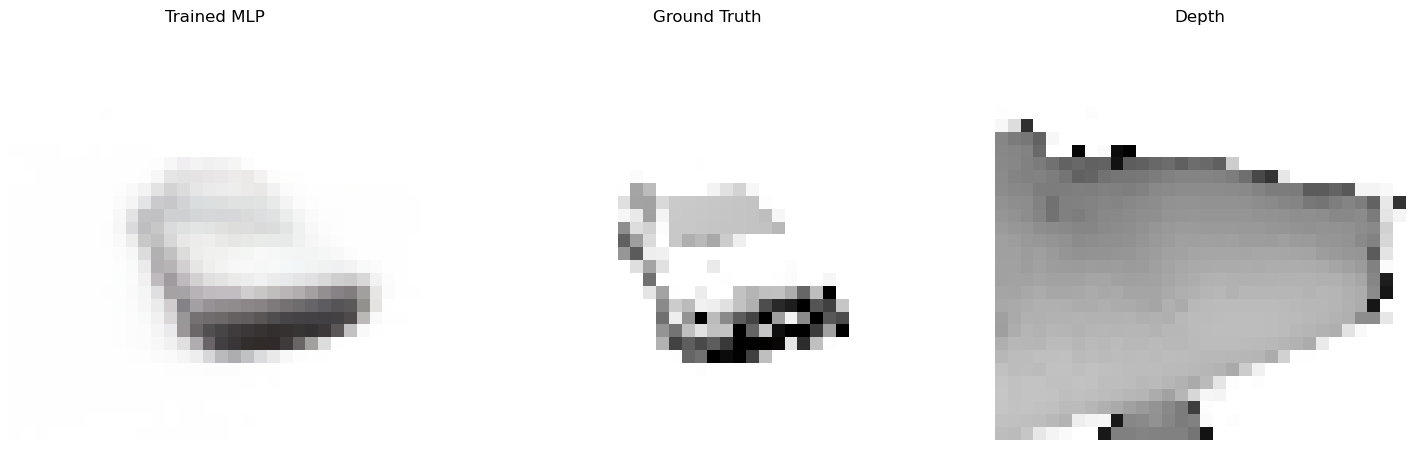

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 5300: loss = 0.01044
car number tensor([255], device='cuda:0')


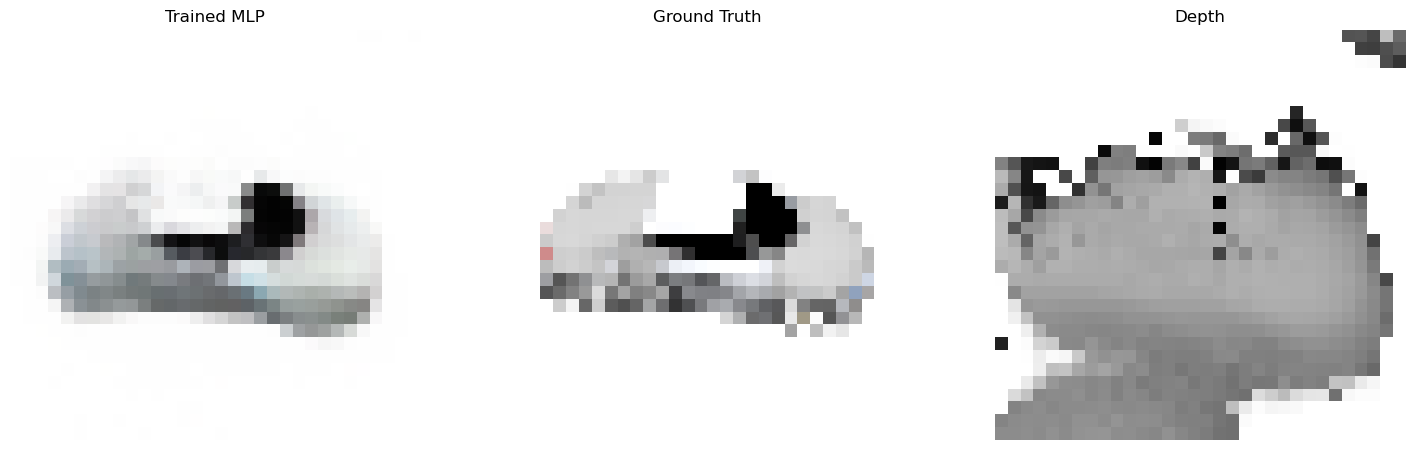

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 5400: loss = 0.01818
car number tensor([1373], device='cuda:0')


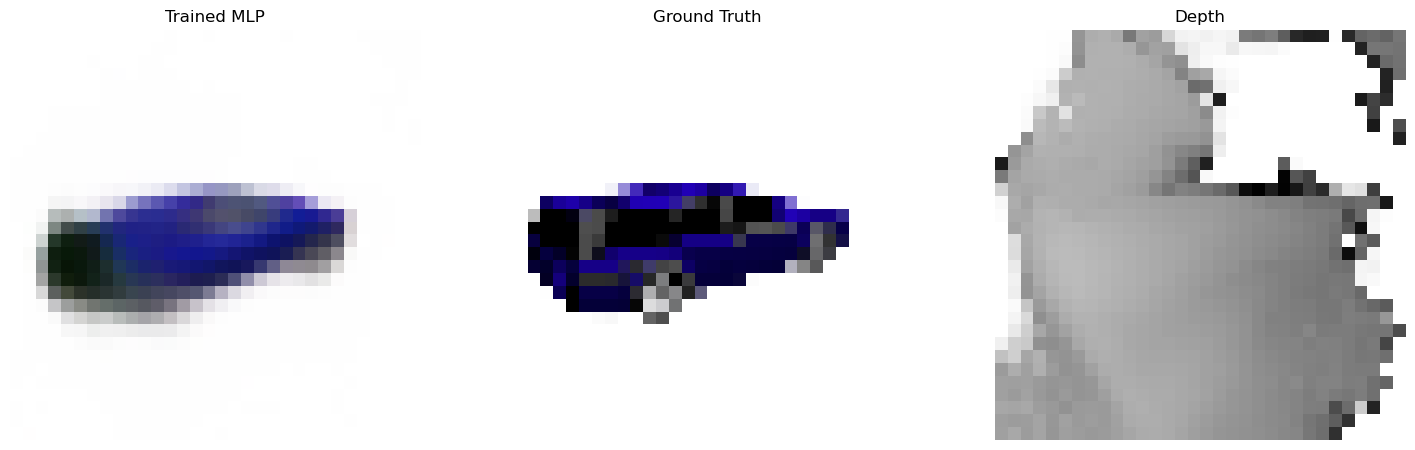

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 5500: loss = 0.01533
car number tensor([1799], device='cuda:0')
same view dir as src


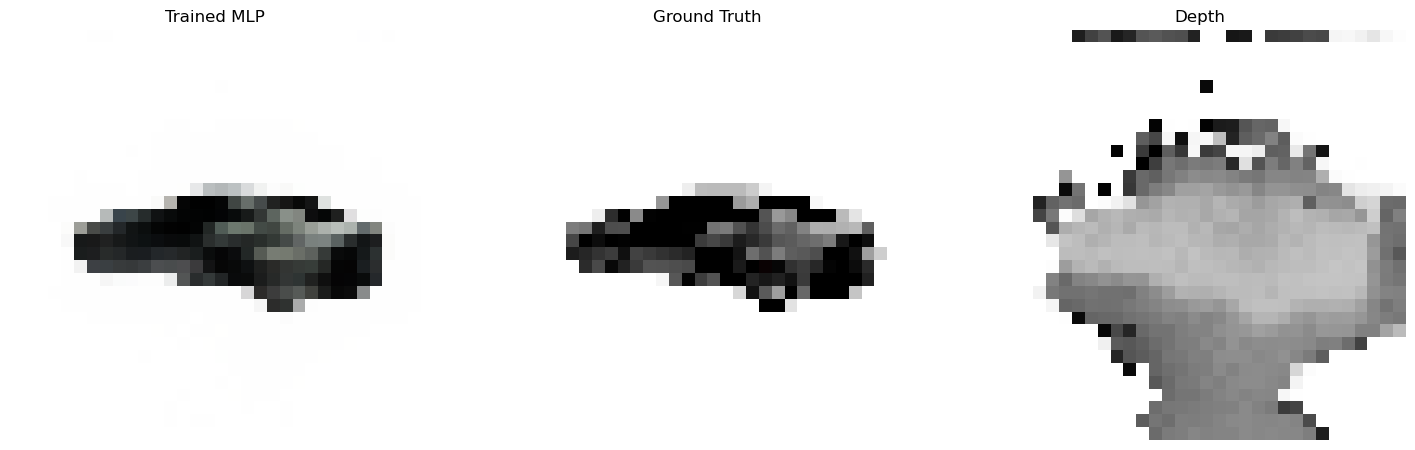

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 5600: loss = 0.01596
car number tensor([770], device='cuda:0')


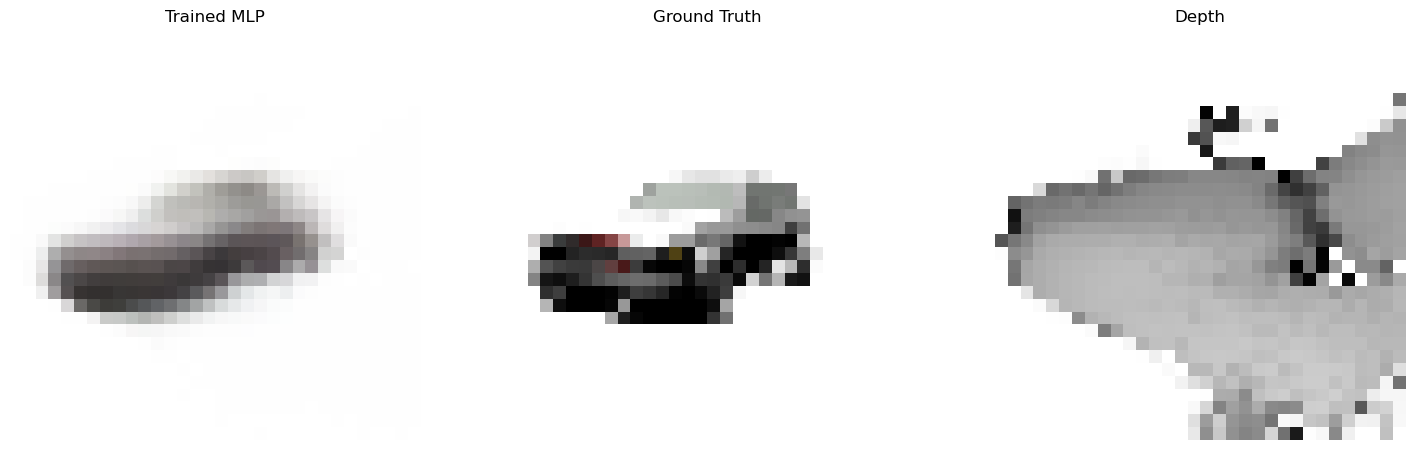

Step 5700: loss = 0.01733
car number tensor([1784], device='cuda:0')


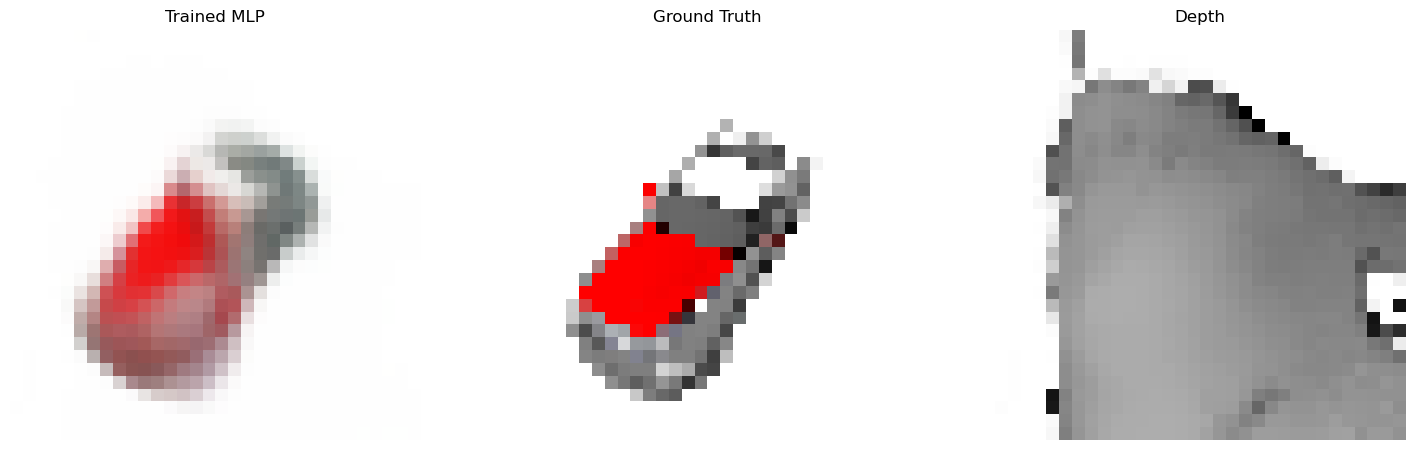

Step 5800: loss = 0.02026
car number tensor([1316], device='cuda:0')


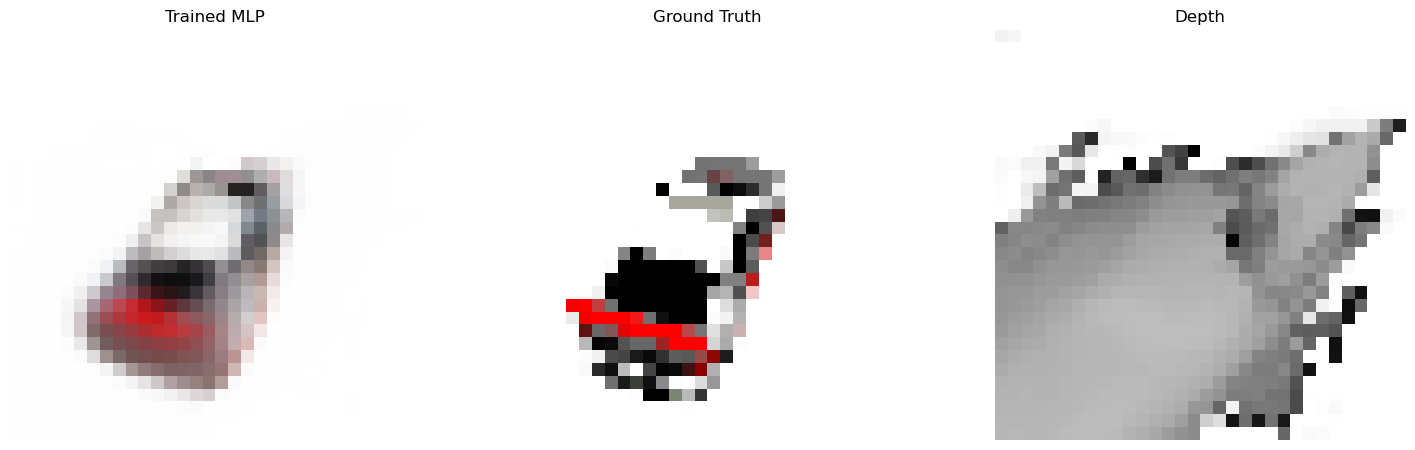

Step 5900: loss = 0.03818
car number tensor([1499], device='cuda:0')


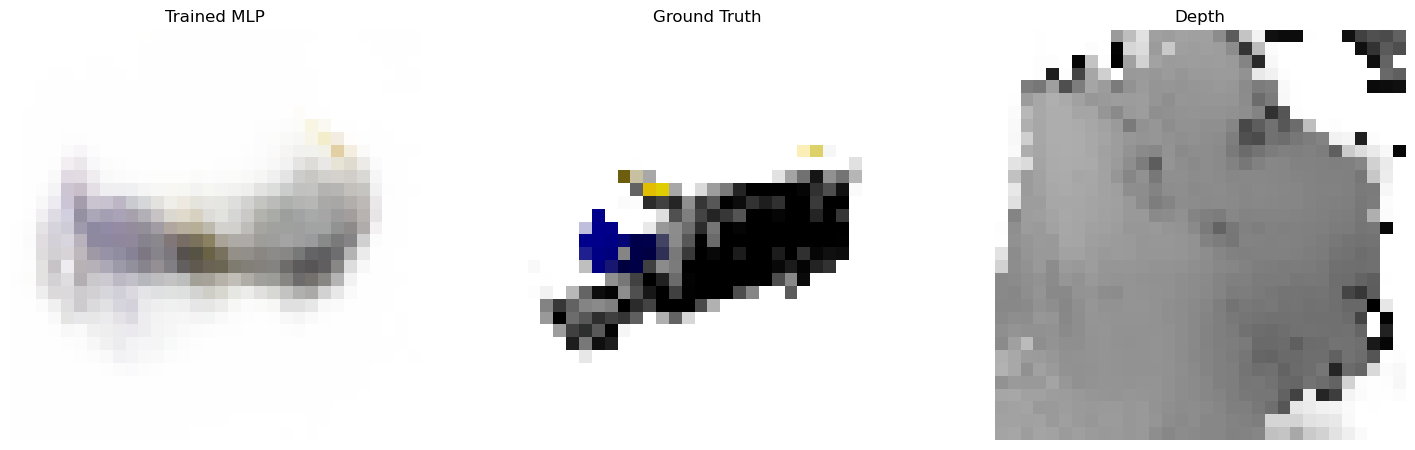

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 6000: loss = 0.01626
car number tensor([1365], device='cuda:0')
same view dir as src


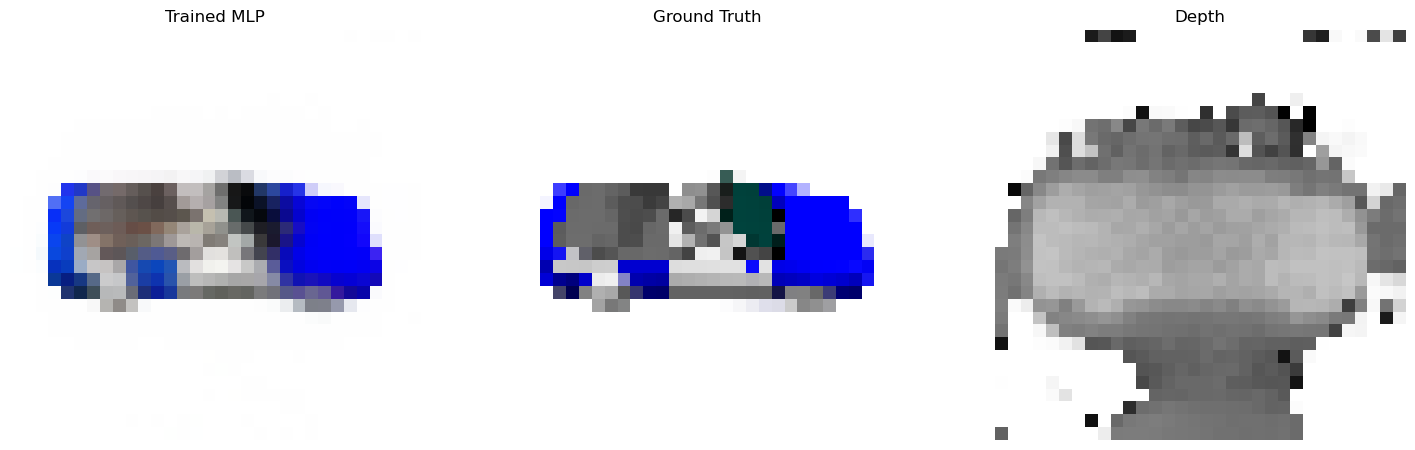

Step 6100: loss = 0.00980
car number tensor([862], device='cuda:0')


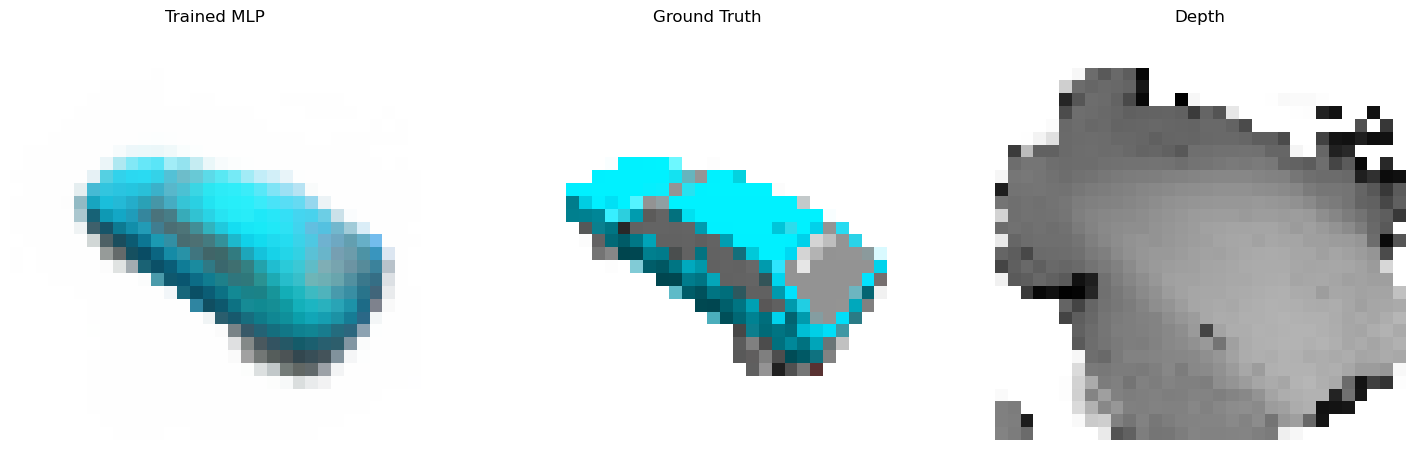

Step 6200: loss = 0.00984
car number tensor([1980], device='cuda:0')
same view dir as src


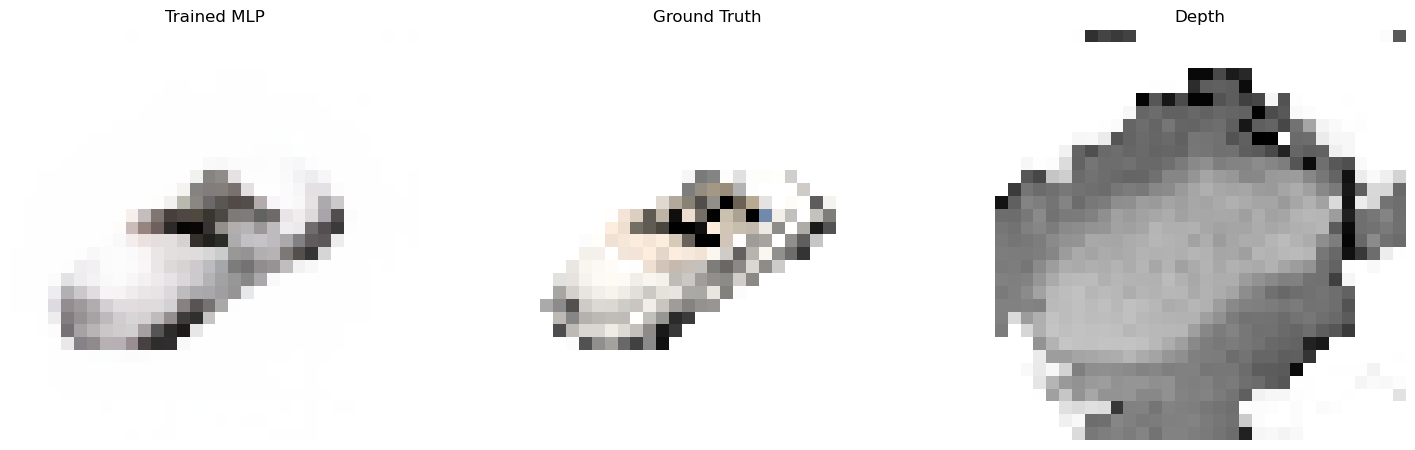

Step 6300: loss = 0.01265
car number tensor([463], device='cuda:0')


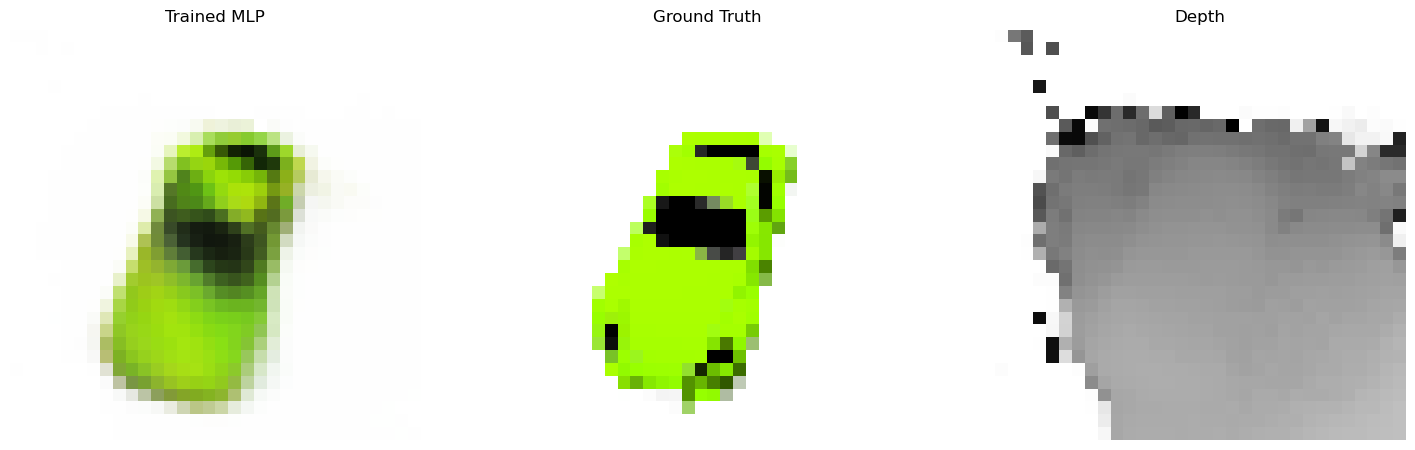

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 6400: loss = 0.01658
car number tensor([450], device='cuda:0')


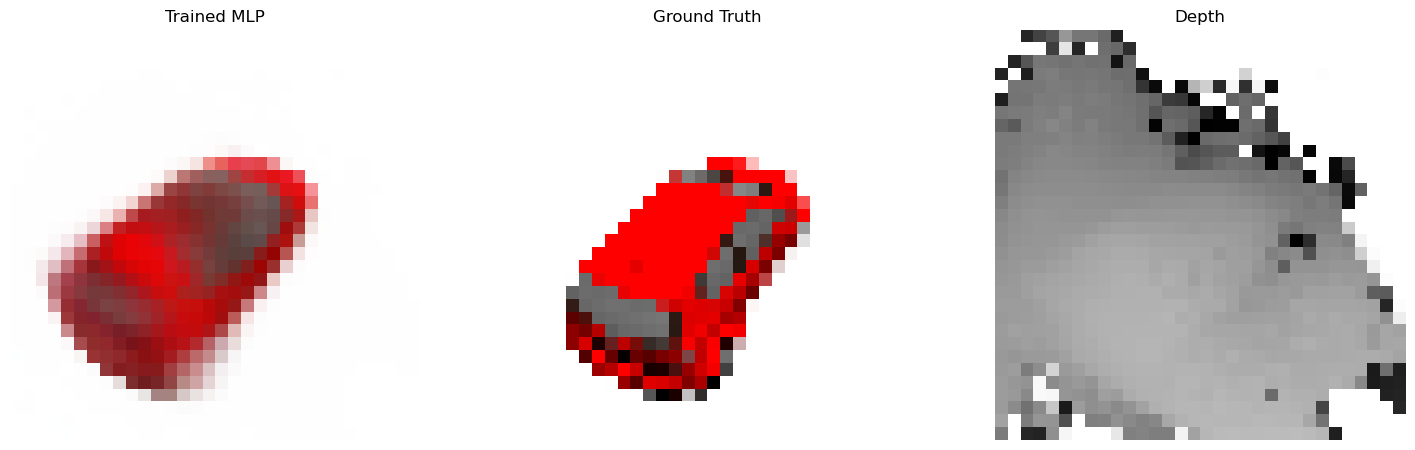

Step 6500: loss = 0.00914
car number tensor([261], device='cuda:0')


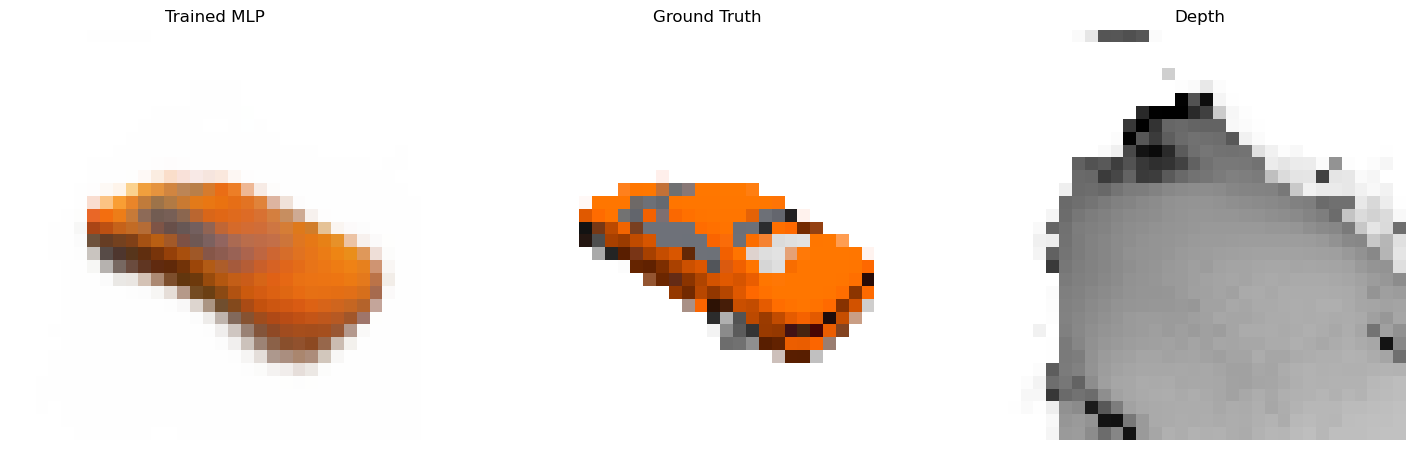

Step 6600: loss = 0.01136
car number tensor([313], device='cuda:0')
same view dir as src


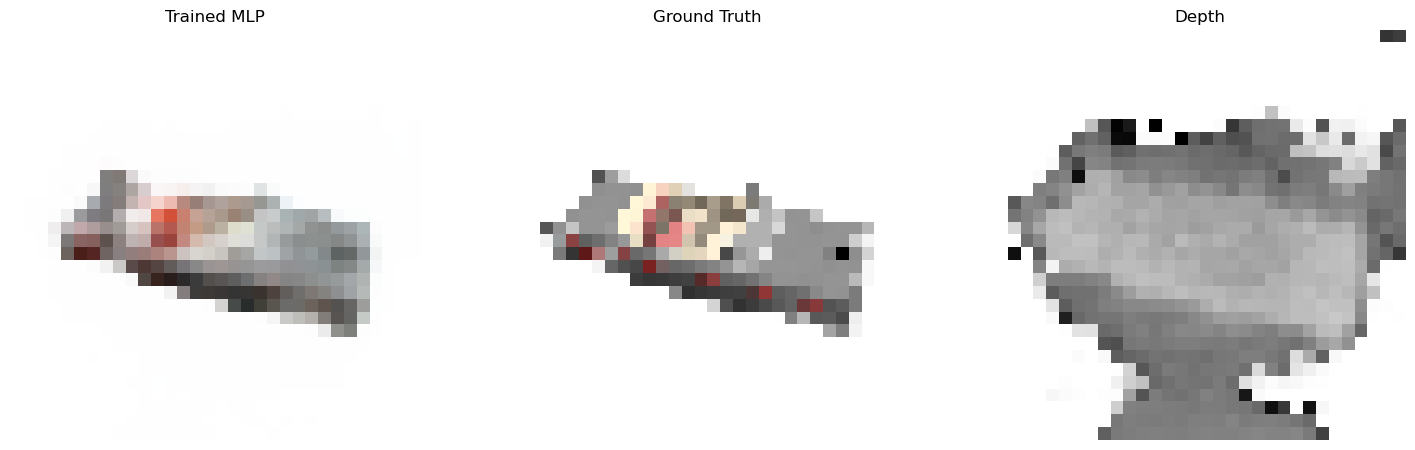

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 6700: loss = 0.00981
car number tensor([1770], device='cuda:0')


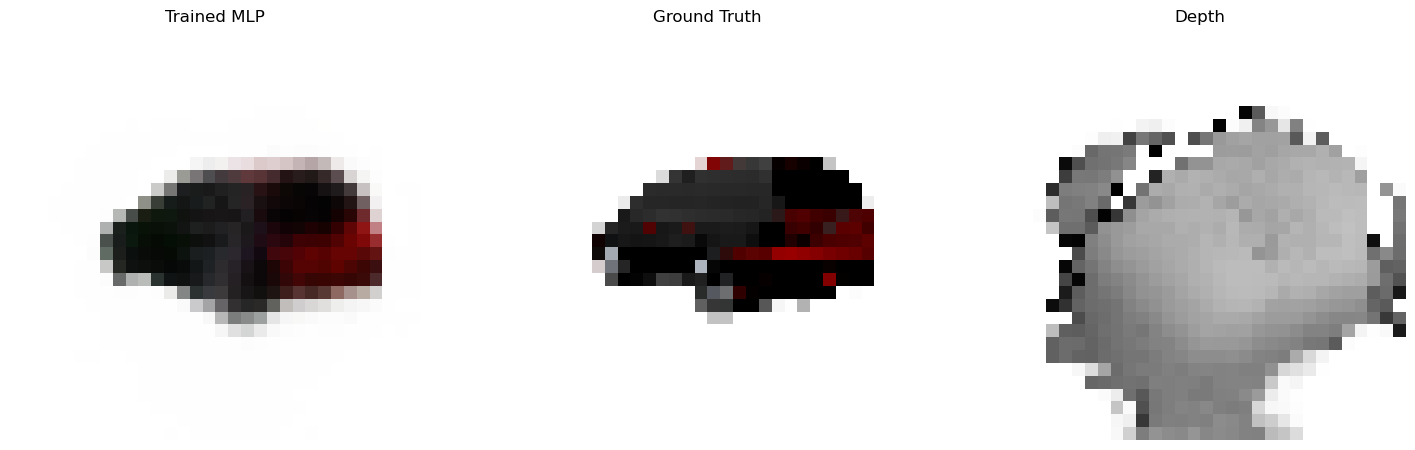

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 6800: loss = 0.01223
car number tensor([1174], device='cuda:0')


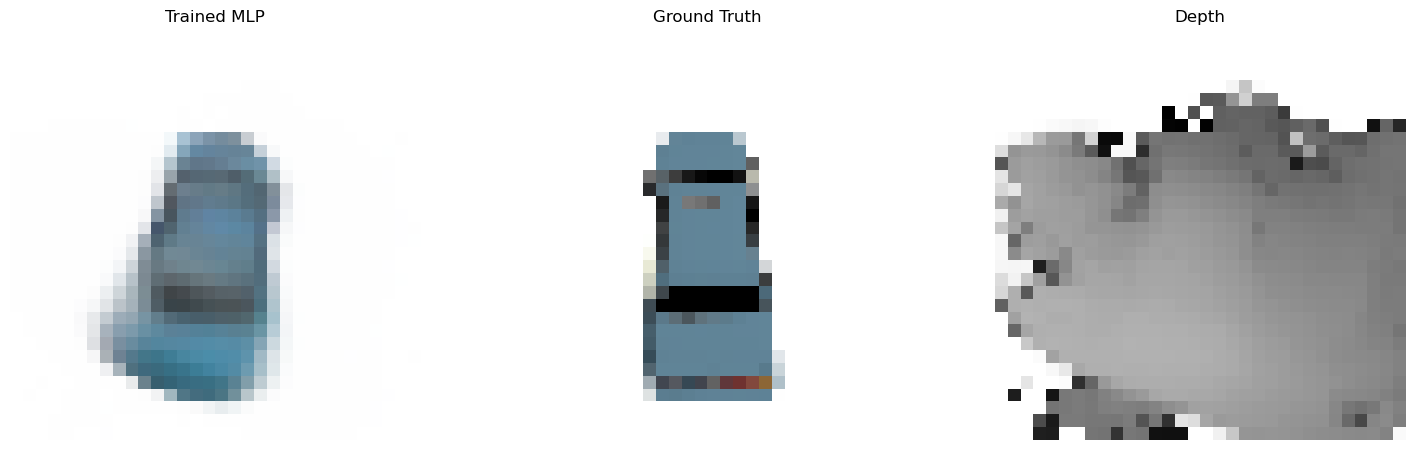

Step 6900: loss = 0.01519
car number tensor([600], device='cuda:0')


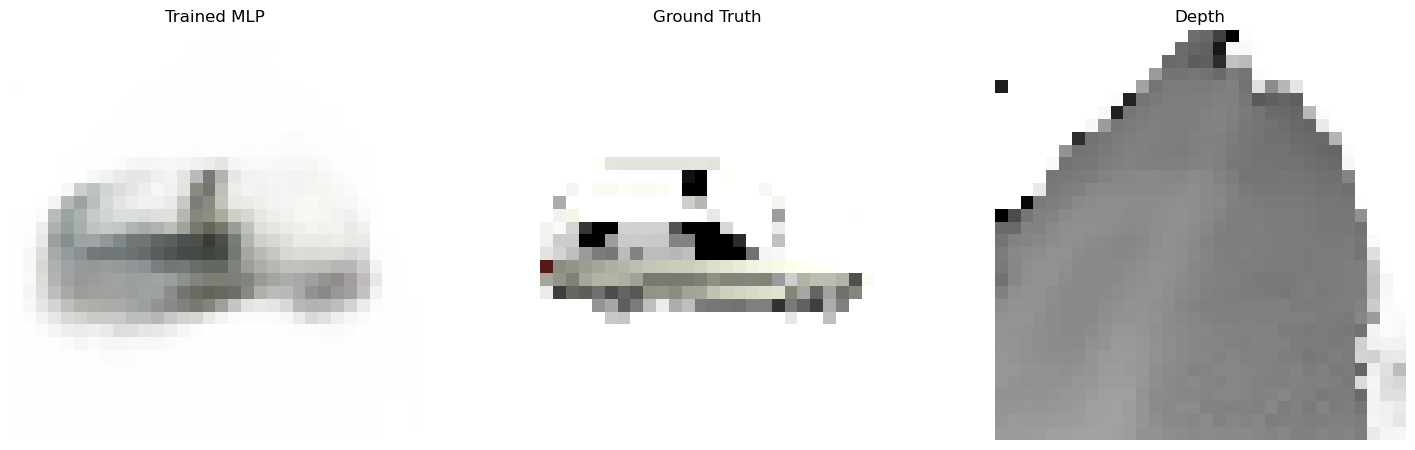

Step 7000: loss = 0.01046
car number tensor([919], device='cuda:0')
same view dir as src


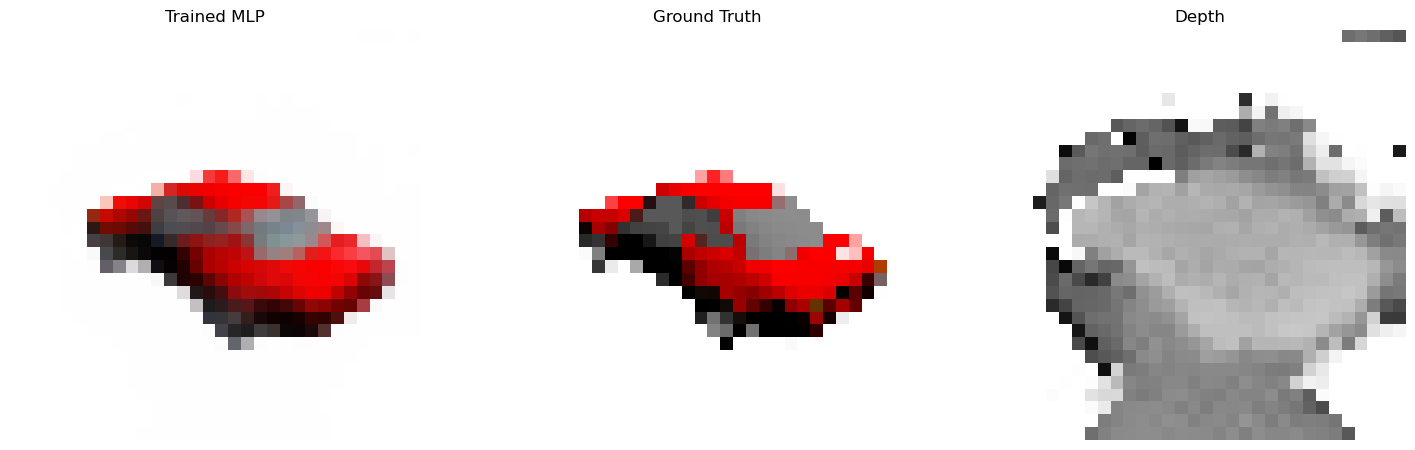

Step 7100: loss = 0.01134
car number tensor([1007], device='cuda:0')


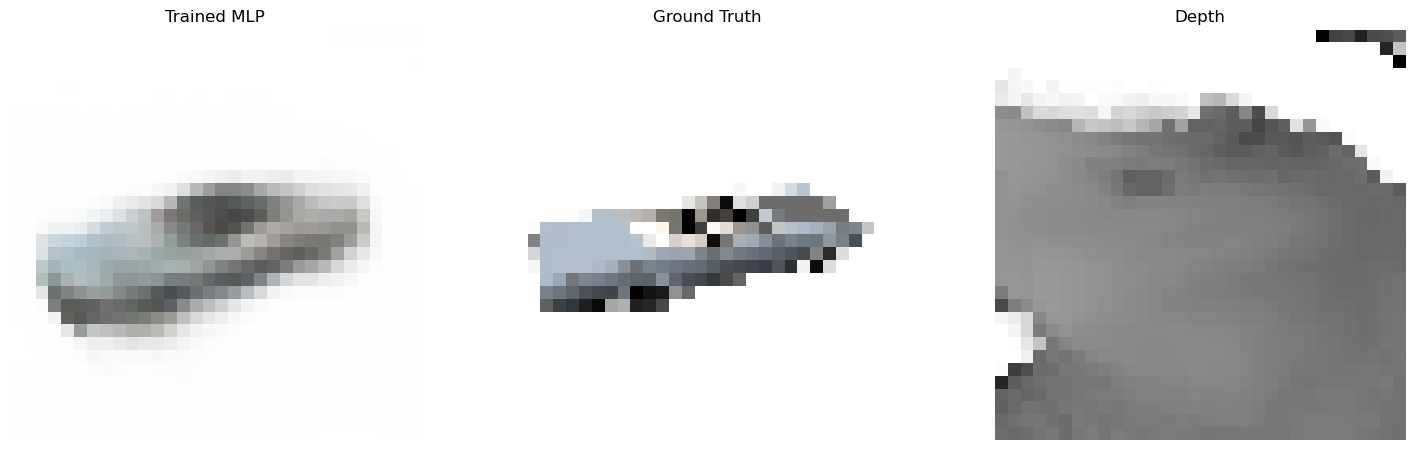

Step 7200: loss = 0.01511
car number tensor([1619], device='cuda:0')


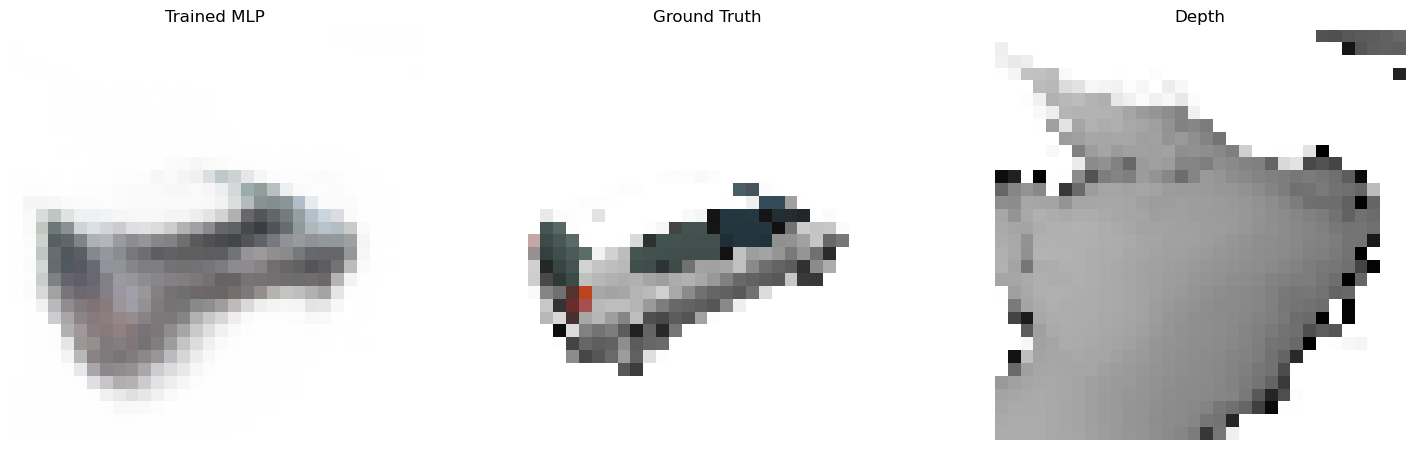

Step 7300: loss = 0.01824
car number tensor([1200], device='cuda:0')


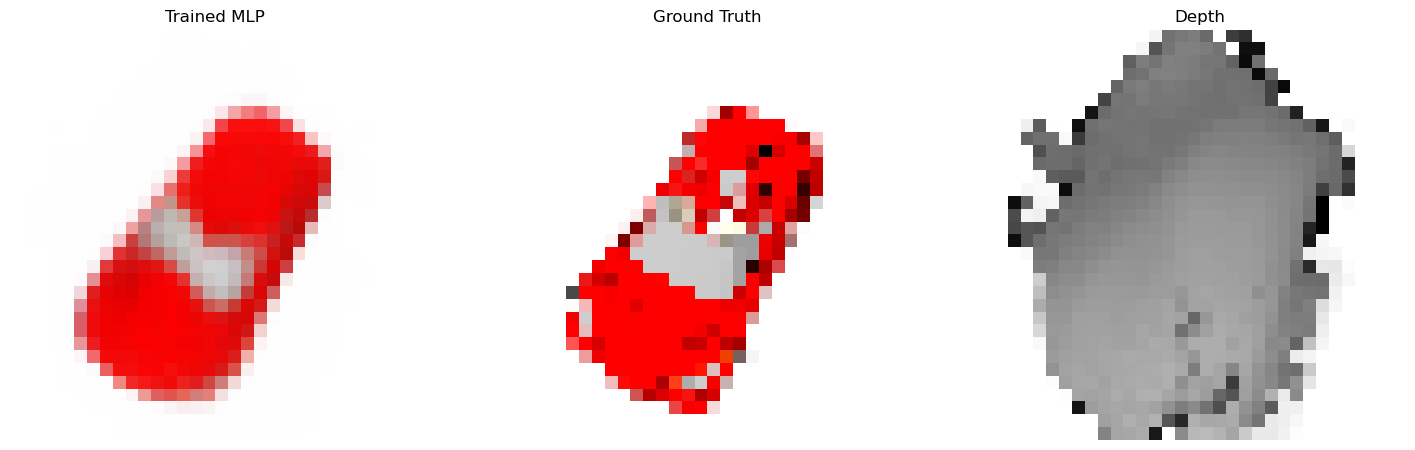

Step 7400: loss = 0.02458
car number tensor([1449], device='cuda:0')


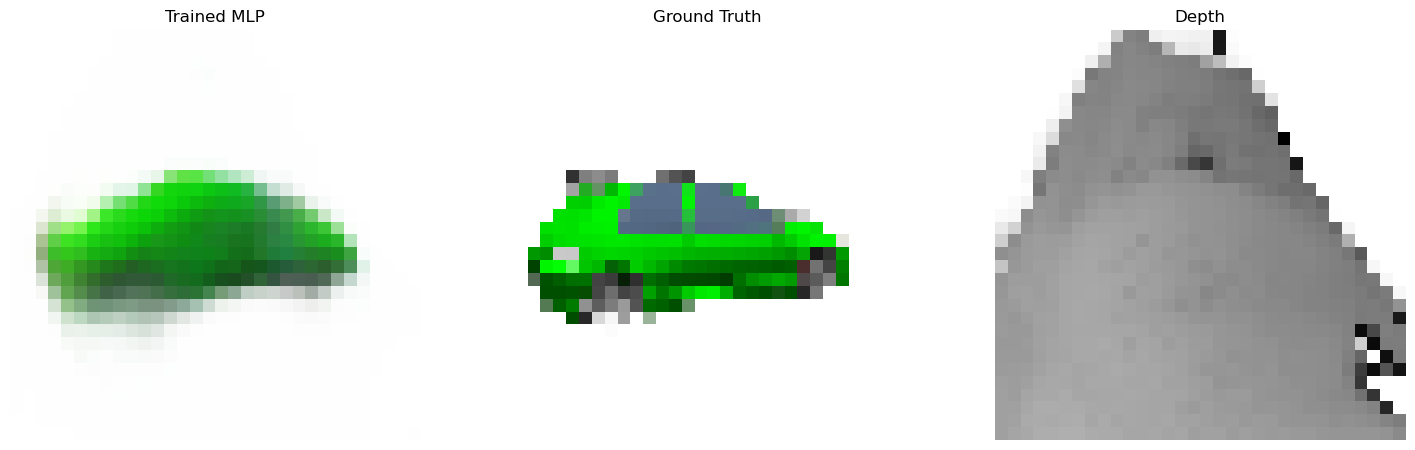

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 7500: loss = 0.01273
car number tensor([1934], device='cuda:0')


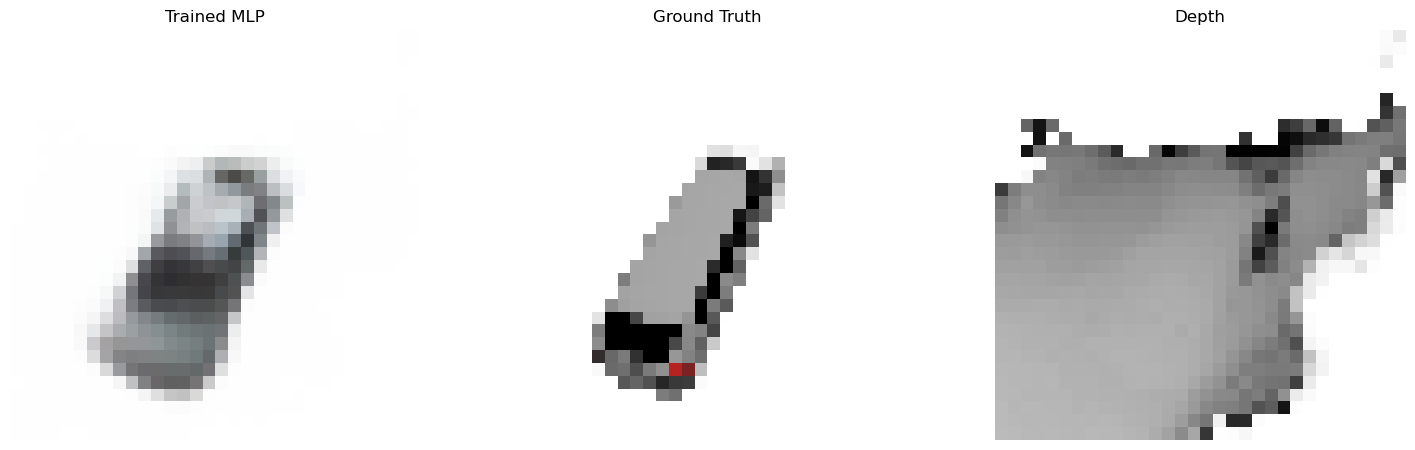

Step 7600: loss = 0.00803
car number tensor([572], device='cuda:0')


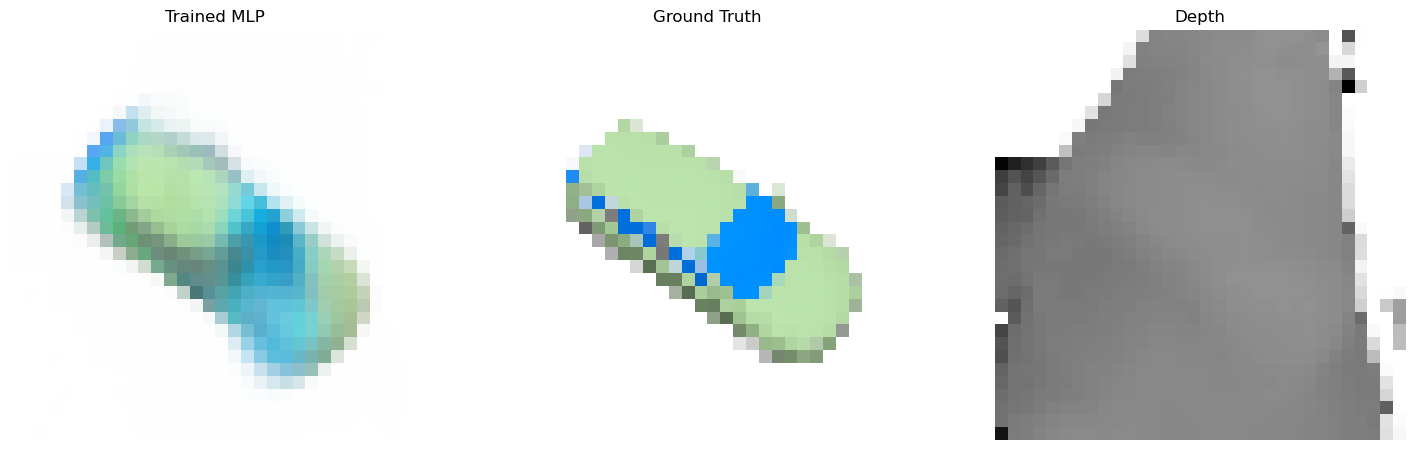

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 7700: loss = 0.00923
car number tensor([667], device='cuda:0')


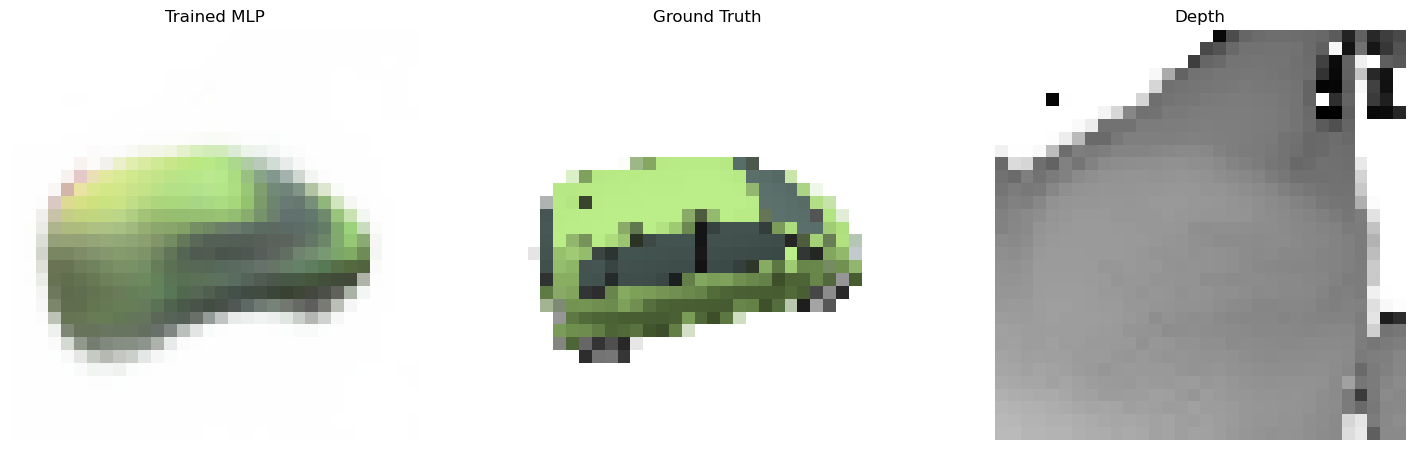

Step 7800: loss = 0.01540
car number tensor([658], device='cuda:0')
same view dir as src


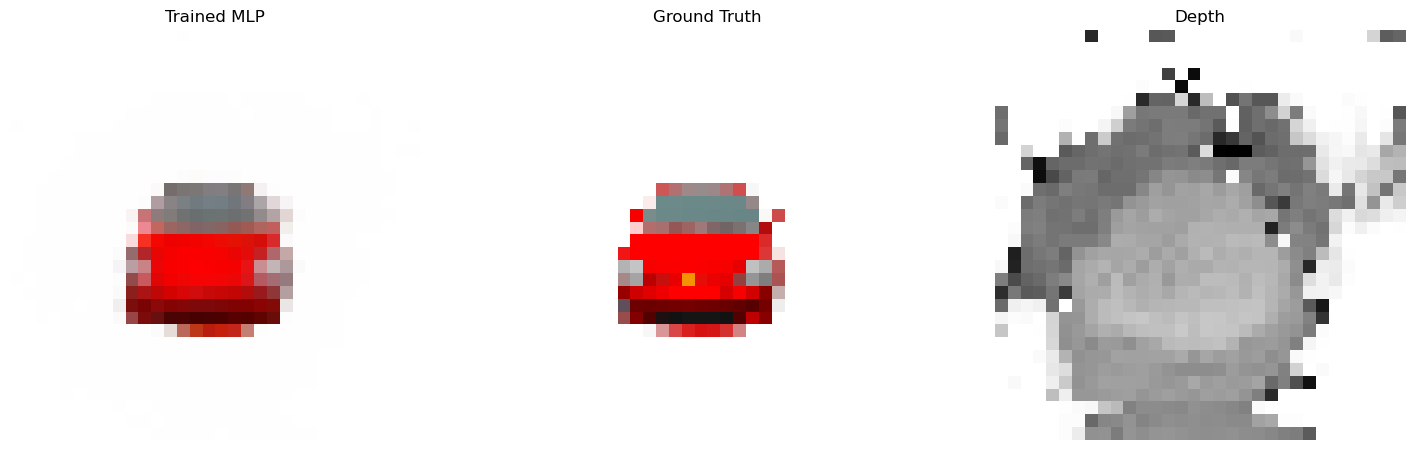

Step 7900: loss = 0.01339
car number tensor([1909], device='cuda:0')


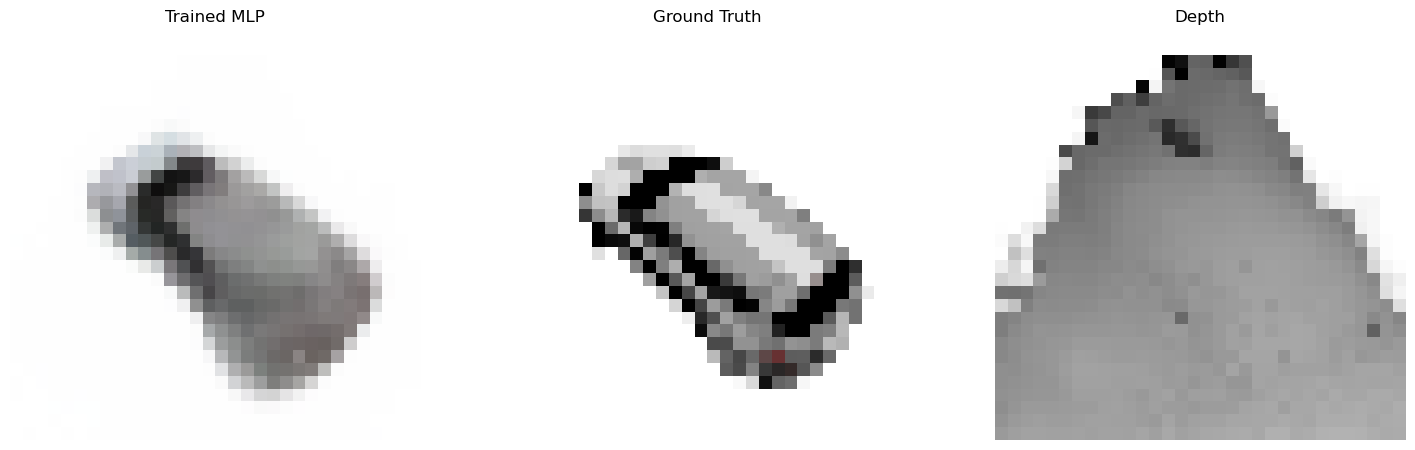

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 8000: loss = 0.00546
car number tensor([449], device='cuda:0')


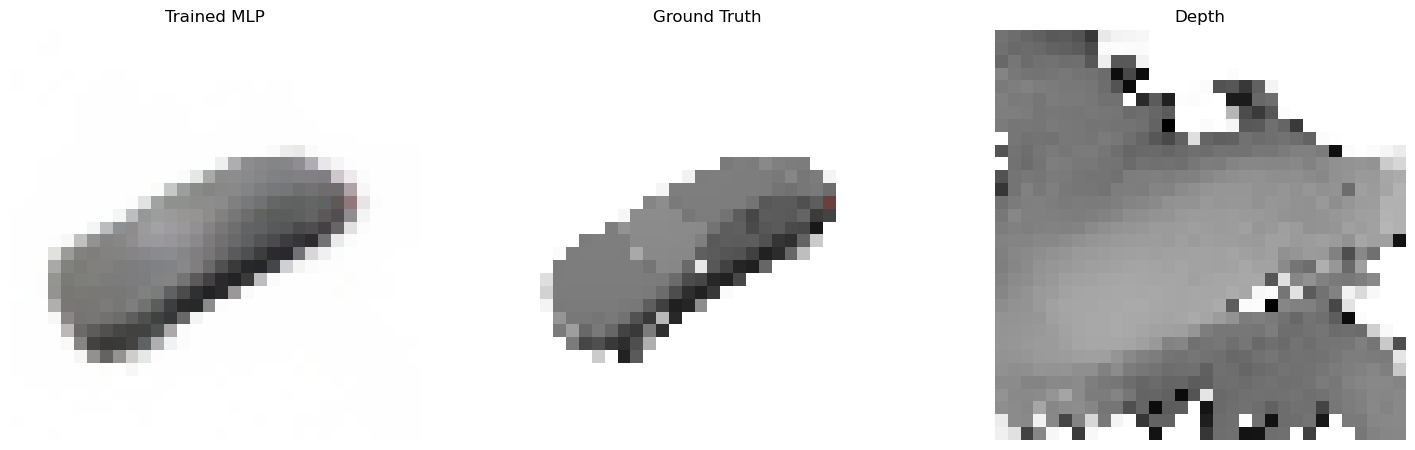

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 8100: loss = 0.01387
car number tensor([857], device='cuda:0')


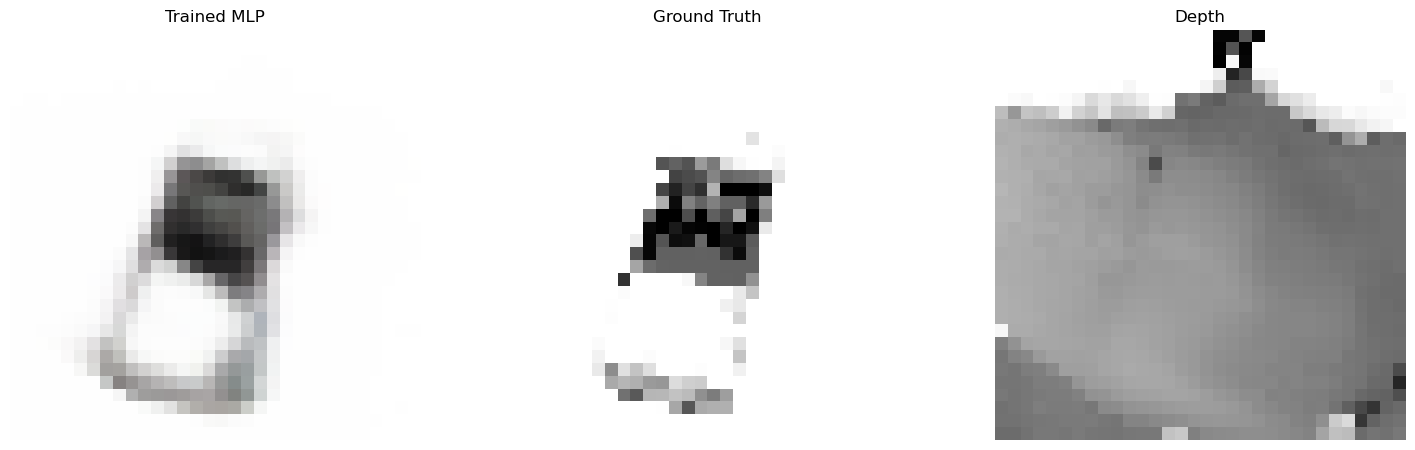

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 8200: loss = 0.00973
car number tensor([1208], device='cuda:0')


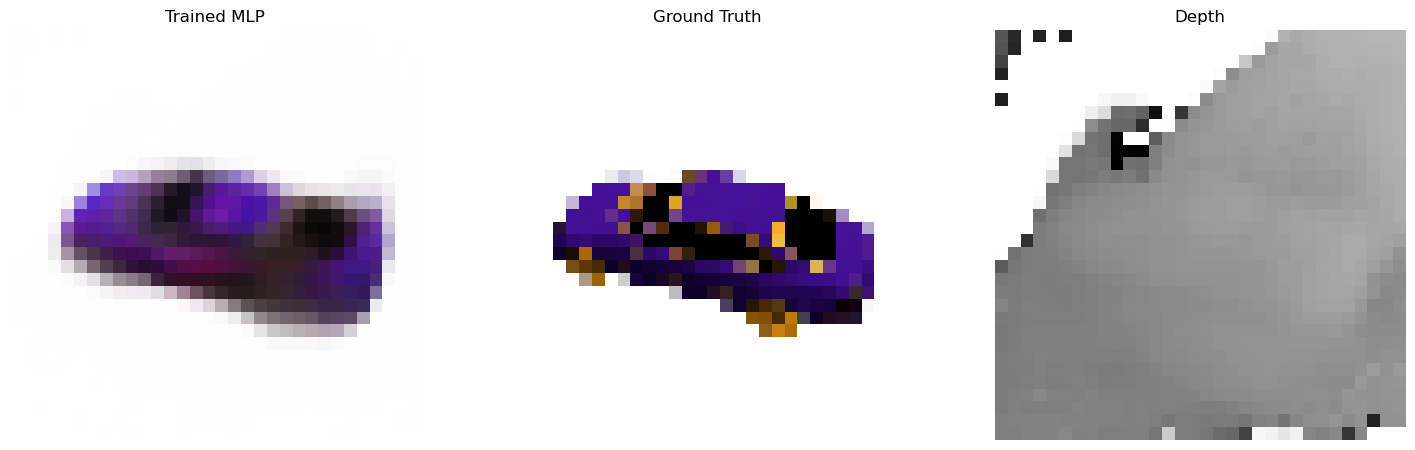

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 8300: loss = 0.01101
car number tensor([1923], device='cuda:0')


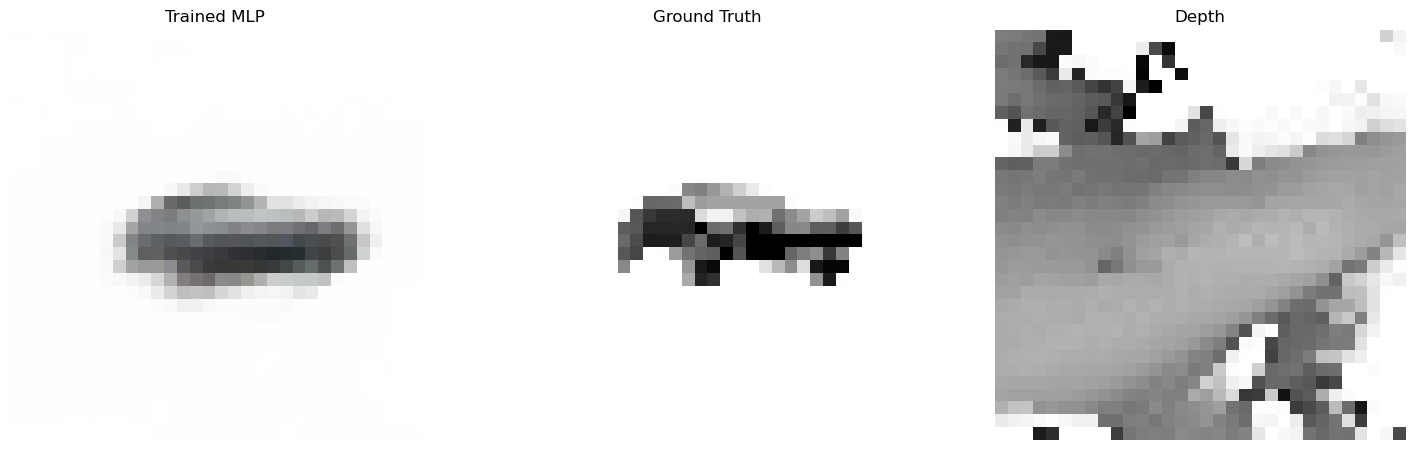

Step 8400: loss = 0.01709
car number tensor([1552], device='cuda:0')


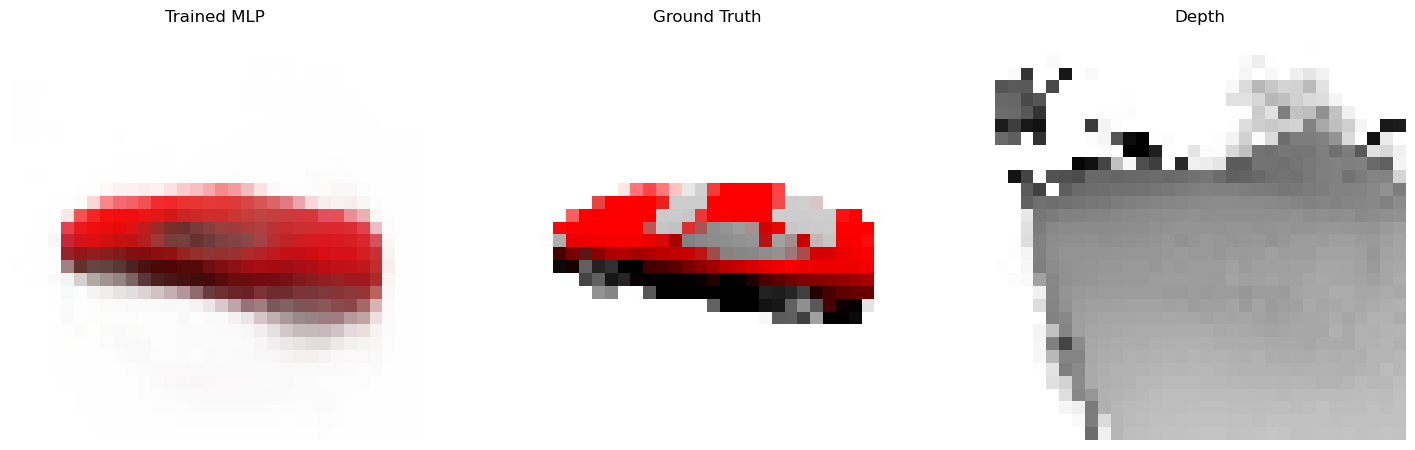

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 8500: loss = 0.02515
car number tensor([1221], device='cuda:0')


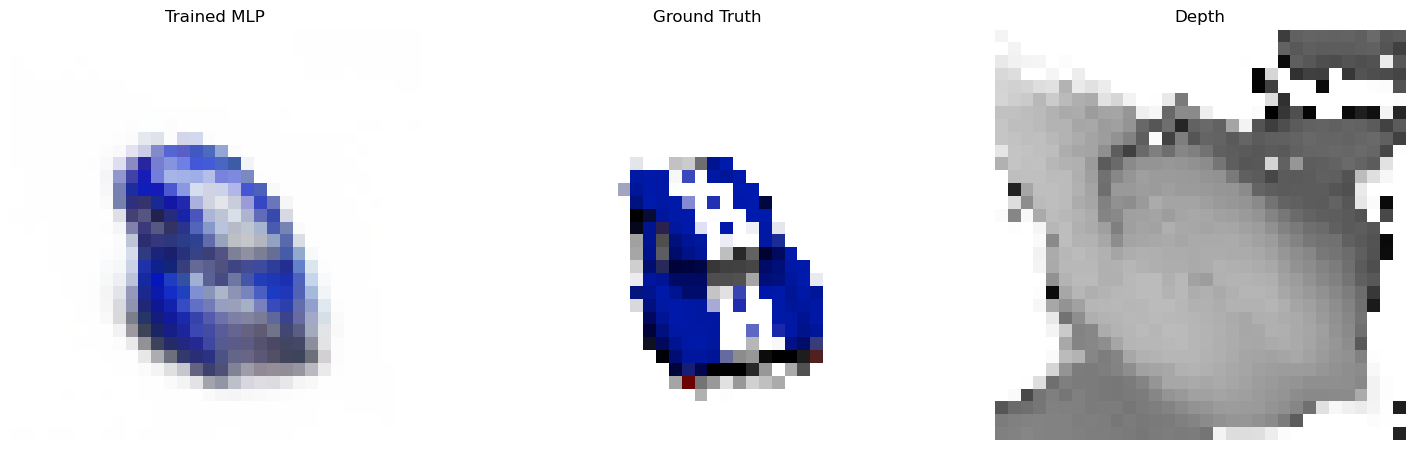

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 8600: loss = 0.00669
car number tensor([1321], device='cuda:0')
same view dir as src


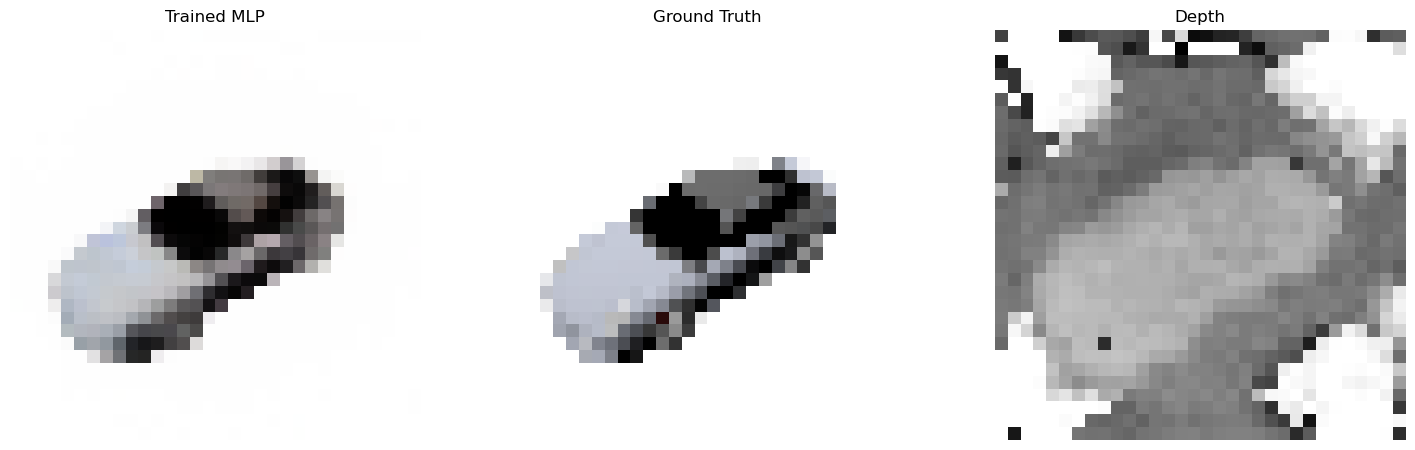

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 8700: loss = 0.00511
car number tensor([1588], device='cuda:0')


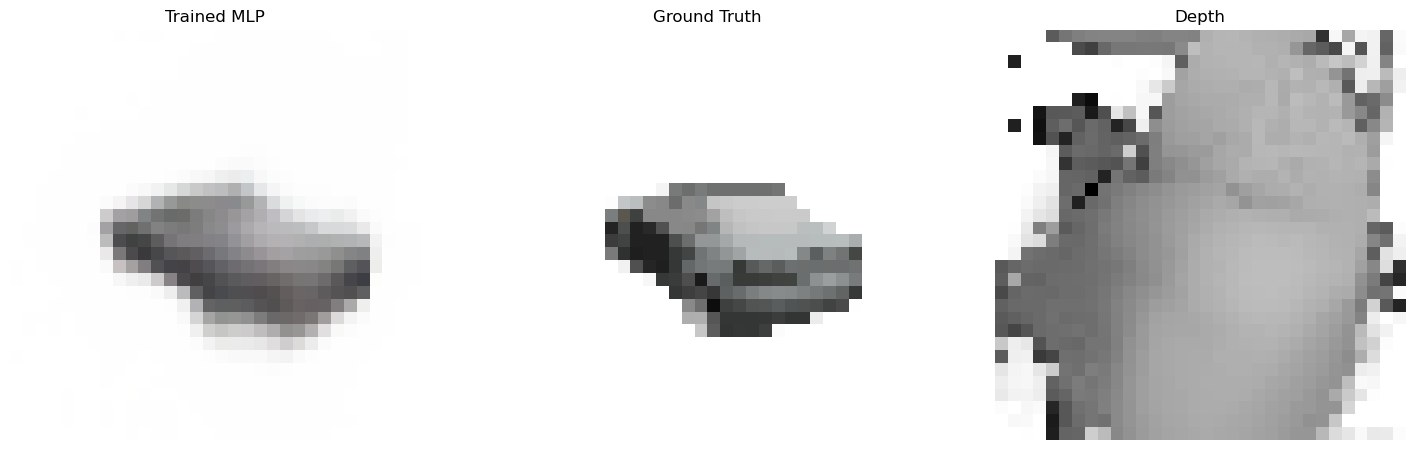

Step 8800: loss = 0.01031
car number tensor([1827], device='cuda:0')
same view dir as src


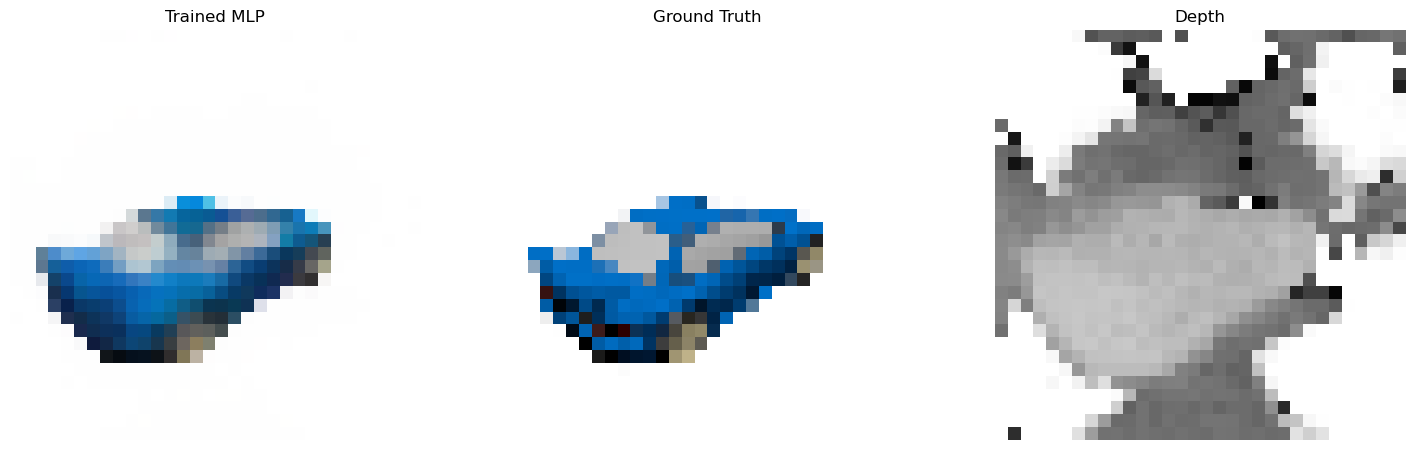

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 8900: loss = 0.01329
car number tensor([1312], device='cuda:0')


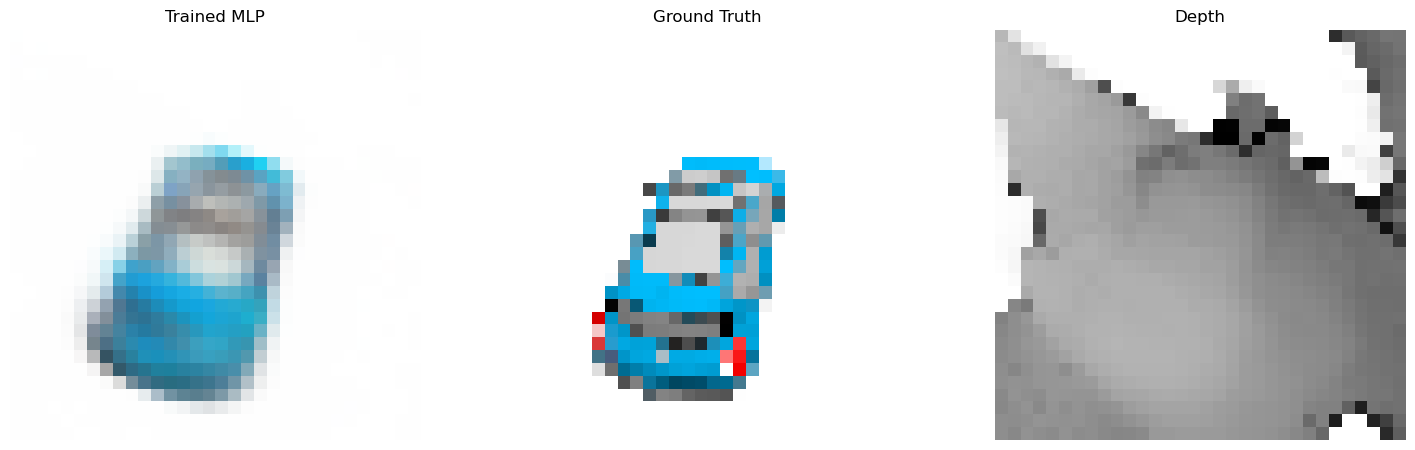

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 9000: loss = 0.00777
car number tensor([809], device='cuda:0')
same view dir as src


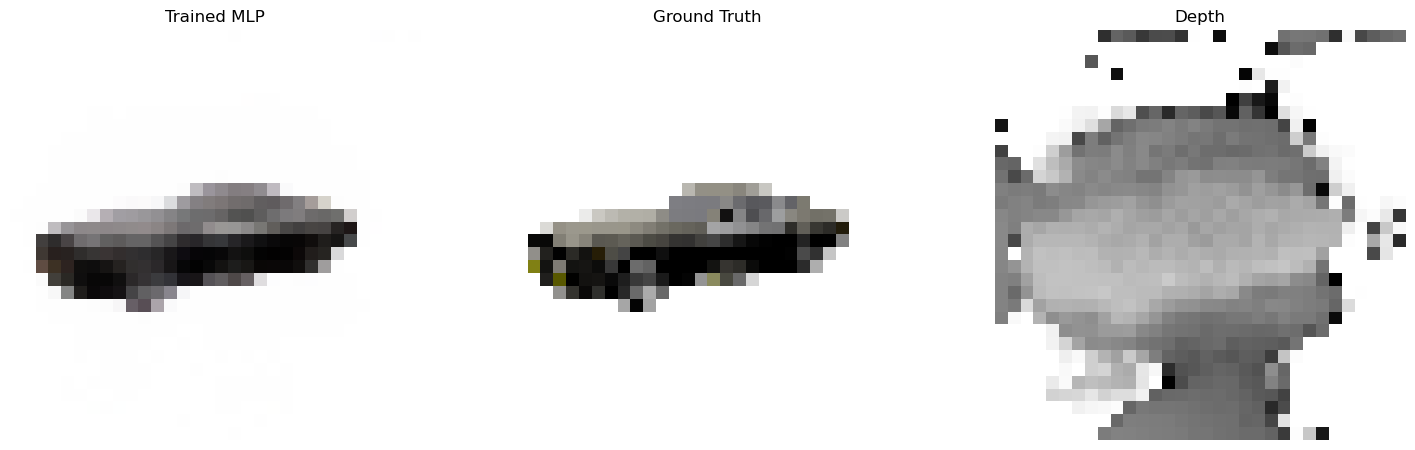

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 9100: loss = 0.00764
car number tensor([1528], device='cuda:0')


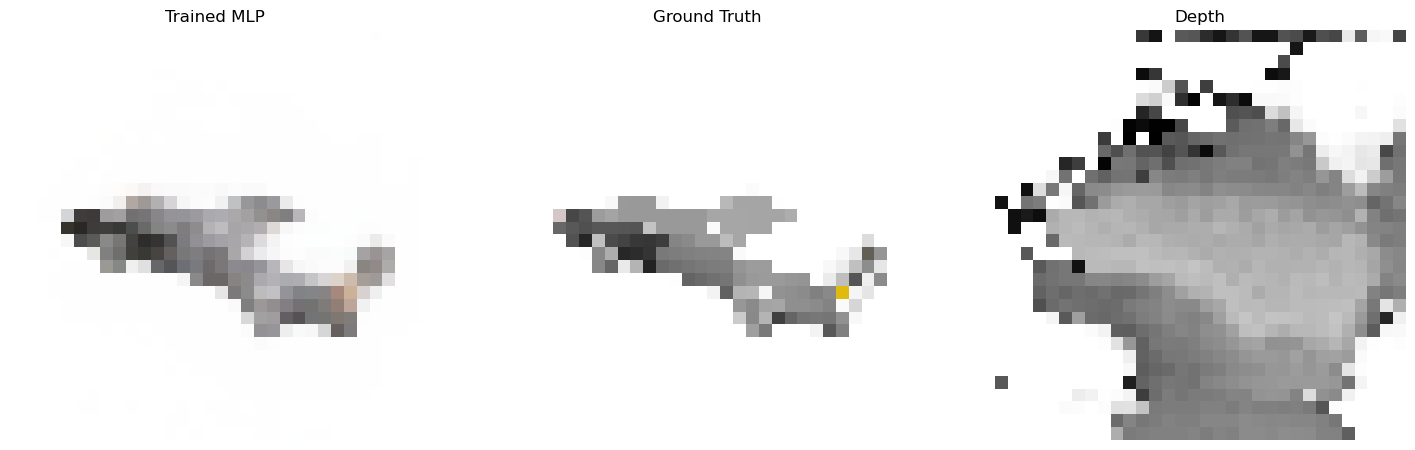

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 9200: loss = 0.01067
car number tensor([1831], device='cuda:0')


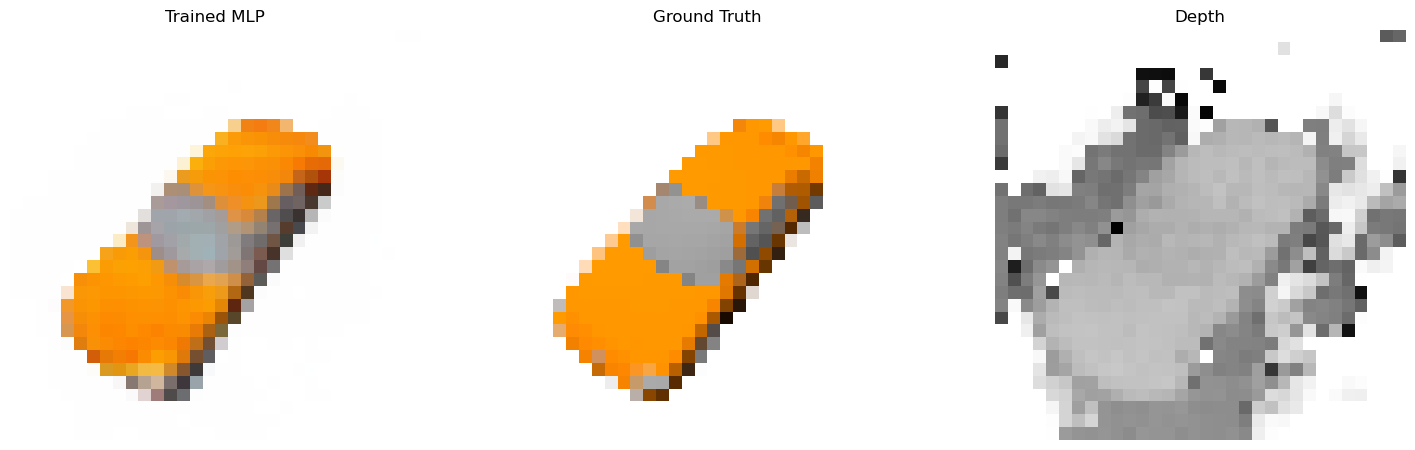

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 9300: loss = 0.00525
car number tensor([145], device='cuda:0')


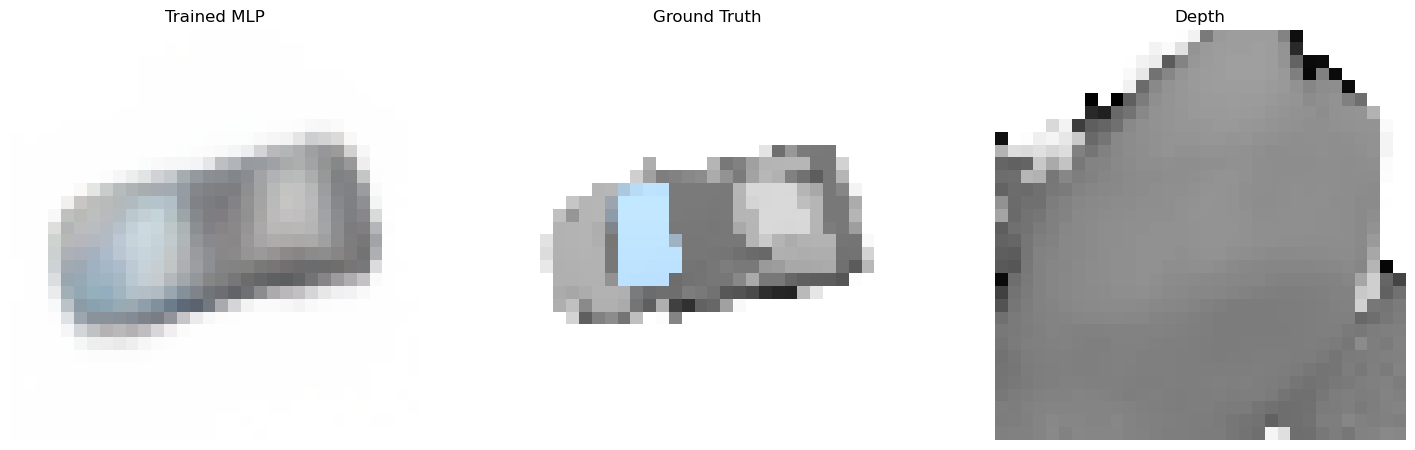

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 9400: loss = 0.00707
car number tensor([515], device='cuda:0')


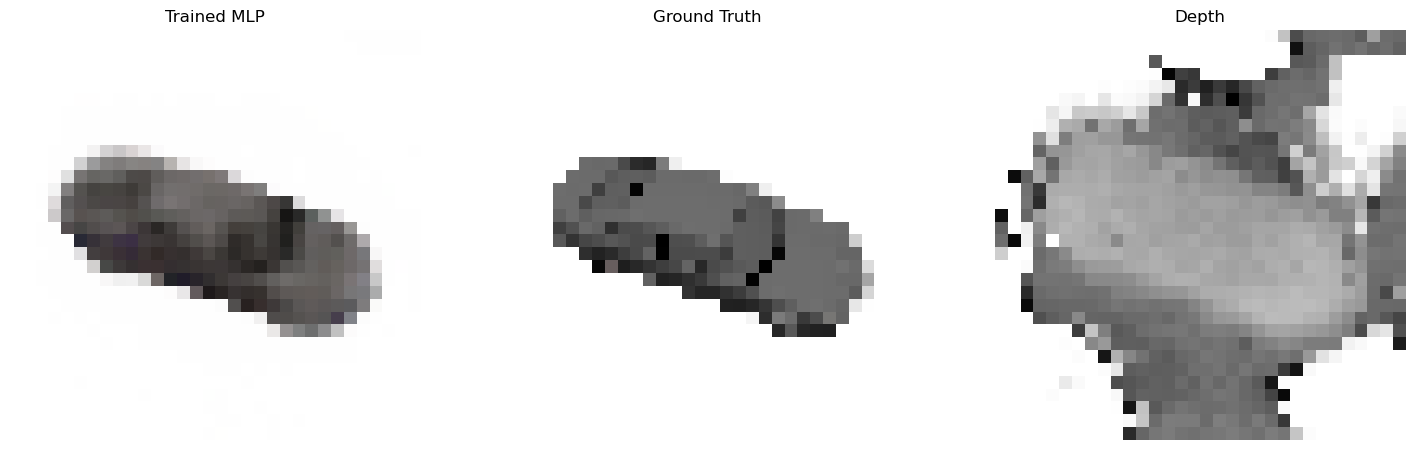

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 9500: loss = 0.01089
car number tensor([924], device='cuda:0')


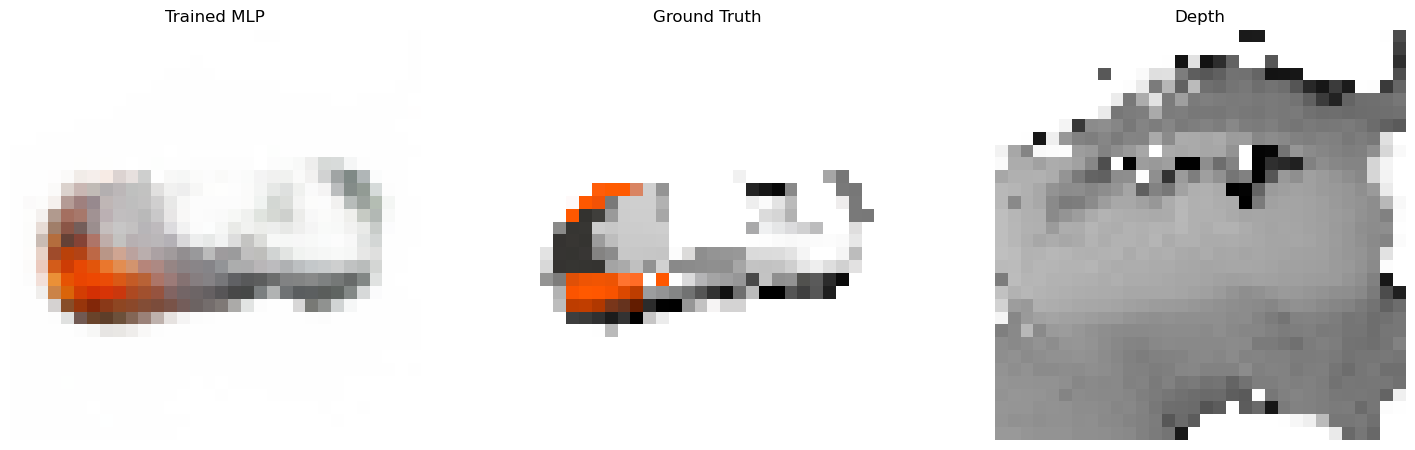

Step 9600: loss = 0.00803
car number tensor([1636], device='cuda:0')


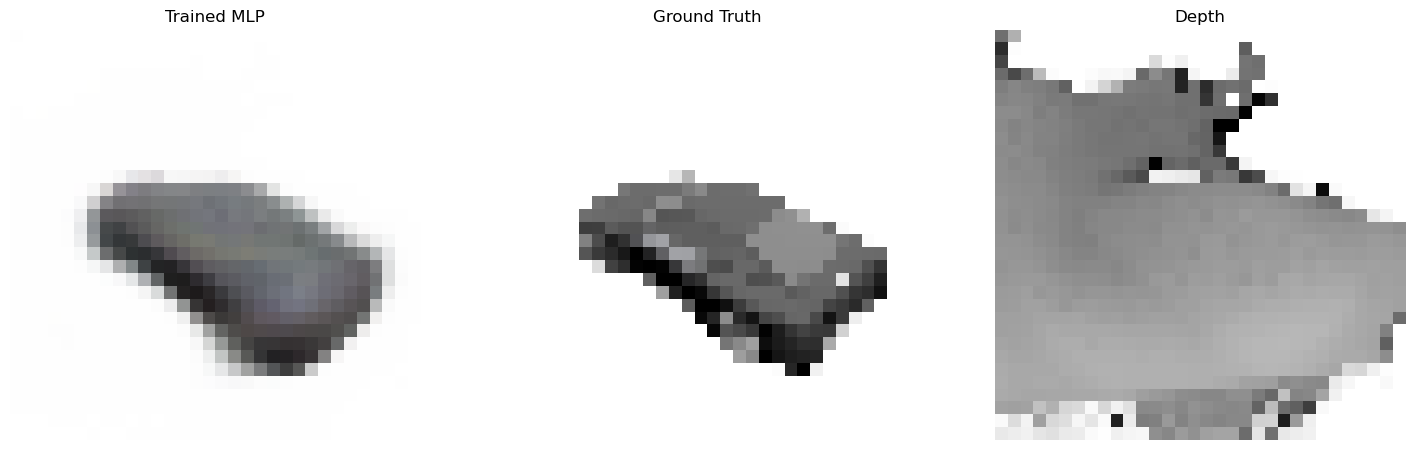

In [ ]:
# Create a custom conf
from pyhocon import ConfigFactory
conf = ConfigFactory.parse_file(f"adaptive-volume-rendering/conf/default_mv.conf")

# Create a pixelnerf net
net = make_new_model(conf["model"]).to(device=device)
net.stop_encoder_grad = True

# Combine with volumerenderer
renderer = AdaptiveVolumeRenderer.from_conf(conf["adaptive_renderer"]).to(device=device)

rf_and_renderer = RadFieldAndRenderer(net, renderer).to(device=device)


max_num_instances = 2150
samples_per_instance = 8

# Load pretrianed weights
model_path = f"{root_dir}checkpoints/experiment/newraymarcher_{max_num_instances}cars_{samples_per_instance}samples_400ksteps"
rf_and_renderer.load_weights(model_path)

# own_state = rf_and_renderer.state_dict()
# load_state = torch.load(model_path, map_location=device)
# for name, param in load_state.items():
#     if name not in own_state:
#         continue
#     if isinstance(param, nn.Parameter):
#         # backwards compatibility for serialized parameters
#         param = param.data
#     own_state[name].copy_(param)
    

######## TODO
# Test dataset
sl = 32

train_dataset = SceneClassDataset(root_dir=f"{root_dir}data/cars_train",
                                             max_num_instances=max_num_instances,
                                             max_observations_per_instance=250,
                                             img_sidelength=sl,
                                             specific_observation_idcs=None,
                                             samples_per_instance=samples_per_instance)


train_dataloader = DataLoader(train_dataset,
                                      batch_size=1,
                                      shuffle=True,
                                      drop_last=True,
                                      collate_fn=train_dataset.collate_fn
                                      )

# Configurations
optim = torch.optim.Adam(lr=1e-4, params=rf_and_renderer.parameters())

try:
    _ = fit(net,
        rf_and_renderer, 
        train_dataloader, 
        loss_fn=mse_loss, 
        resolution=(sl, sl, 3), 
        plotting_function=plot_output_ground_truth, 
        optimizer=optim, 
        total_steps=20000,
        steps_til_summary=100
        )
    model_path = f"{root_dir}checkpoints/experiment/avr_{max_num_instances}cars_{samples_per_instance}samples_20ksteps"
    rf_and_renderer.save_weights(model_path)
except Exception:
    print(traceback.format_exc())


## Render a video

In [ ]:
# Volume Renderer

max_num_instances = 2150
samples_per_instance = 8

# Import model
from pyhocon import ConfigFactory
conf = ConfigFactory.parse_file(f"{root_dir}adaptive-volume-rendering/conf/default_mv.conf")

net = make_new_model(conf["model"]).to(device=device)
net.stop_encoder_grad = True

# renderer = Raymarcher.from_conf(conf["raymarcher"]).to(device=device)
# renderer = VolumeRenderer.from_conf(conf["normal_renderer"]).to(device=device)
renderer = AdaptiveVolumeRenderer.from_conf(conf["adaptive_renderer"]).to(device=device)
rf_and_renderer = RadFieldAndRenderer(net, renderer).to(device=device)

# Load pretrianed weights
# model_path = f"{root_dir}checkpoints/experiment/newraymarcher_{max_num_instances}cars_{samples_per_instance}samples_400ksteps"
# model_path = f"{root_dir}checkpoints/experiment/vr_{max_num_instances}cars_{samples_per_instance}samples_40000steps"
model_path = f"{root_dir}checkpoints/experiment/avr_{max_num_instances}cars_{samples_per_instance}samples_20ksteps"

# rf_and_renderer.load_weights(model_path)
own_state = rf_and_renderer.state_dict()
load_state = torch.load(model_path, map_location=device)
for name, param in load_state.items():
    if name not in own_state:
        continue
    if isinstance(param, nn.Parameter):
        # backwards compatibility for serialized parameters
        param = param.data
    own_state[name].copy_(param)

# Load test image
sl = 32
video_dataset = SceneClassDataset(root_dir=f"{root_dir}data/cars_val",
                                             max_num_instances=1,
                                             max_observations_per_instance=250,
                                             img_sidelength=sl,
                                             specific_observation_idcs=[64],
                                             samples_per_instance=1)


video_dataloader = DataLoader(video_dataset,
                                      batch_size=1,
                                      shuffle=True,
                                      drop_last=True,
                                      collate_fn=video_dataset.collate_fn
                                      )

video_mi = next(iter(video_dataloader))
plt.imshow(video_mi['images'][0].reshape(sl,sl,3))
plt.savefig('videos/img.png')

import time

start = time.time()
frames = generate_video(video_mi, 360, 1.5, net, rf_and_renderer)
end = time.time()
print(f'it takes {end - start} seconds to render a video')

# Make a video
type = 'avr'
f = f'videos/video_{type}.gif'
imageio.mimwrite(f, frames, fps=60)
f = f'videos/video_{type}.mp4'
imageio.mimwrite(f, frames, fps=60, quality=7)

from IPython.display import HTML
from base64 import b64encode
mp4 = open(f,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls autoplay loop>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

## Calculate metrics

In [ ]:
# Raymarcher

max_num_instances = 2150
samples_per_instance = 8

# Import model
from pyhocon import ConfigFactory
conf = ConfigFactory.parse_file(f"{root_dir}adaptive-volume-rendering/conf/default_mv.conf")

net = make_new_model(conf["model"]).to(device=device)
net.stop_encoder_grad = True

# renderer = VolumeRenderer.from_conf(conf["normal_renderer"]).to(device=device)
# renderer = Raymarcher.from_conf(conf["raymarcher"]).to(device=device)
renderer = AdaptiveVolumeRenderer.from_conf(conf["adaptive_renderer"]).to(device=device)
rf_and_renderer = RadFieldAndRenderer(net, renderer).to(device=device)

# Load pretrianed weights
# model_path = f"{root_dir}checkpoints/experiment/vr_{max_num_instances}cars_{samples_per_instance}samples_40000steps"
# model_path = f"{root_dir}checkpoints/experiment/raymarcher_{max_num_instances}cars_{samples_per_instance}samples_400ksteps"
model_path = f"{root_dir}checkpoints/experiment/avr_{max_num_instances}cars_{samples_per_instance}samples_20ksteps"
rf_and_renderer.load_weights(model_path)

# metrics
sl = 32
val_dir = f"{root_dir}data/cars_val"
n_val = 352
psnr, ssim = get_psnr(net, rf_and_renderer, val_dir, n_val, sl, [64])
print(psnr)
print(ssim)